In [1]:
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict

import pandas as pd

from main import parse_config, instantiate_agents, instantiate_auction
from AuctionAllocation import *
from Bidder import *
from copy import copy, deepcopy
from tqdm.notebook import tqdm
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
import shap
import os
import numpy as np
import pickle

import sys
sys.path.append("/Users/keithwu/Documents/GitHub/auction-gym/src/c_utree_boost")


from c_utree_boost import Agent_boost_Galen_action_numpy as Agent

from c_utree_boost import Problem
import statistics
from m5py import M5Prime, export_text_m5

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
estimator = "DR"
competition = "L"
agent_num = 3

 # Normal Data

In [8]:
# Parse configuration file
rng, config, agent_configs, agents2items, agents2item_values,\
num_runs, max_slots, embedding_size, embedding_var,\
obs_embedding_size = parse_config('../config/FP_DR_TS.json')

In [9]:
# Instantiate Agent and Auction objects
agents = instantiate_agents(rng, agent_configs, agents2item_values, agents2items)
# bid = value * estimated_CTR * gamma
# Instantiate Auction object
auction, num_iter, rounds_per_iter, output_dir =\
    instantiate_auction(rng,
                        config,
                        agents2items,
                        agents2item_values,
                        agents,
                        max_slots,
                        embedding_size,
                        embedding_var,
                        obs_embedding_size)

  0%|          | 0/25 [00:00<?, ?it/s]

number of iteration: 0

agent: 0




DR 1:  24%|██▎       | 3856/16384 [00:01<00:03, 3654.31it/s]


Stopping at Epoch 3856



DR 1: 100%|██████████| 32768/32768 [00:08<00:00, 3954.28it/s]


AUC predicting P(win):				 0.875353731668444
Estimated Utility	 Mean Error:			 0.3646367001445172
Estimated Utility	 Mean Absolute Error:	 0.38371272750548874



Initialising Policy: 100%|██████████| 16384/16384 [00:14<00:00, 1104.04it/s]


Predicted mu Gammas:  tensor(0.9915, grad_fn=<MinBackward1>) tensor(1.0049, grad_fn=<MaxBackward1>) tensor(1.0000, grad_fn=<MeanBackward0>)
Predicted sigma Gammas:  tensor(0.0371, grad_fn=<MinBackward1>) tensor(0.0768, grad_fn=<MaxBackward1>) tensor(0.0502, grad_fn=<MeanBackward0>)



DR 1:  35%|███▌      | 11527/32768 [00:15<00:29, 728.23it/s]


Stopping at Epoch 11527
DR 1 Number of samples:  torch.Size([6673, 2])
DR 1 Predicted Gammas:  0.6233332 0.9593321 0.75716406
agent: 1




DR 2:  36%|███▌      | 5867/16384 [00:01<00:03, 3389.42it/s]


Stopping at Epoch 5867



DR 2: 100%|██████████| 32768/32768 [00:08<00:00, 3923.54it/s]


AUC predicting P(win):				 0.795436358315289
Estimated Utility	 Mean Error:			 0.4396628939508735
Estimated Utility	 Mean Absolute Error:	 0.45855133594936914



Initialising Policy: 100%|██████████| 16384/16384 [00:13<00:00, 1198.21it/s]


Predicted mu Gammas:  tensor(0.9802, grad_fn=<MinBackward1>) tensor(1.0078, grad_fn=<MaxBackward1>) tensor(0.9996, grad_fn=<MeanBackward0>)
Predicted sigma Gammas:  tensor(0.0425, grad_fn=<MinBackward1>) tensor(0.0869, grad_fn=<MaxBackward1>) tensor(0.0537, grad_fn=<MeanBackward0>)



DR 2:   0%|          | 73/32768 [00:00<00:45, 722.45it/s]

Epoch 00120: reducing learning rate of group 0 to 1.4000e-03.



DR 2:   1%|          | 220/32768 [00:00<00:45, 722.72it/s]

Epoch 00221: reducing learning rate of group 0 to 2.8000e-04.



DR 2:   1%|          | 294/32768 [00:00<00:44, 726.98it/s]

Epoch 00322: reducing learning rate of group 0 to 5.6000e-05.



DR 2:   1%|▏         | 439/32768 [00:00<00:47, 683.67it/s]

Epoch 00423: reducing learning rate of group 0 to 1.1200e-05.



DR 2:   2%|▏         | 533/32768 [00:00<00:46, 700.01it/s]


Epoch 00524: reducing learning rate of group 0 to 2.2400e-06.
Stopping at Epoch 533
DR 2 Number of samples:  torch.Size([6689, 2])
DR 2 Predicted Gammas:  1.0 1.0 1.0
agent: 2




DR 3:  34%|███▍      | 5552/16384 [00:01<00:03, 2851.89it/s]


Stopping at Epoch 5552



DR 3: 100%|██████████| 32768/32768 [00:08<00:00, 4019.76it/s]


AUC predicting P(win):				 0.7476961254226697
Estimated Utility	 Mean Error:			 0.6514531771059944
Estimated Utility	 Mean Absolute Error:	 0.6976112289234615



Initialising Policy: 100%|██████████| 16384/16384 [00:13<00:00, 1221.59it/s]


Predicted mu Gammas:  tensor(0.9756, grad_fn=<MinBackward1>) tensor(1.0147, grad_fn=<MaxBackward1>) tensor(0.9992, grad_fn=<MeanBackward0>)
Predicted sigma Gammas:  tensor(0.0383, grad_fn=<MinBackward1>) tensor(0.0855, grad_fn=<MaxBackward1>) tensor(0.0504, grad_fn=<MeanBackward0>)



DR 3:   0%|          | 79/32768 [00:00<00:41, 789.57it/s]

Epoch 00119: reducing learning rate of group 0 to 1.4000e-03.



DR 3:   1%|          | 239/32768 [00:00<00:41, 790.43it/s]

Epoch 00220: reducing learning rate of group 0 to 2.8000e-04.



DR 3:   1%|          | 319/32768 [00:00<00:41, 786.69it/s]

Epoch 00321: reducing learning rate of group 0 to 5.6000e-05.



DR 3:   1%|          | 398/32768 [00:00<00:41, 785.72it/s]

Epoch 00422: reducing learning rate of group 0 to 1.1200e-05.



DR 3:   2%|▏         | 555/32768 [00:00<00:41, 773.61it/s]

Epoch 00523: reducing learning rate of group 0 to 2.2400e-06.



DR 3:   2%|▏         | 633/32768 [00:00<00:41, 774.57it/s]

Epoch 00624: reducing learning rate of group 0 to 4.4800e-07.



DR 3:   2%|▏         | 714/32768 [00:00<00:41, 776.67it/s]

Stopping at Epoch 714
DR 3 Number of samples:  torch.Size([6638, 2])
DR 3 Predicted Gammas:  1.0 1.0 1.0
number of iteration: 1



agent: 0




DR 1:  12%|█▏        | 1951/16384 [00:00<00:03, 3975.26it/s]


Stopping at Epoch 1951
AUC predicting P(win):				 0.76116155191441
Estimated Utility	 Mean Error:			 0.011761888231596875
Estimated Utility	 Mean Absolute Error:	 0.15361400317495894



DR 1:  26%|██▌       | 8464/32768 [00:02<00:06, 3828.51it/s]

Epoch 07800: reducing learning rate of group 0 to 6.0000e-04.
Epoch 08184: reducing learning rate of group 0 to 1.2000e-04.
Epoch 08441: reducing learning rate of group 0 to 2.4000e-05.



DR 1:  28%|██▊       | 9312/32768 [00:02<00:05, 3960.67it/s]


Epoch 08698: reducing learning rate of group 0 to 4.8000e-06.
Epoch 08955: reducing learning rate of group 0 to 9.6000e-07.
Epoch 09212: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 9312
AUC predicting P(win):				 0.7614651386459899
Estimated Utility	 Mean Error:			 0.046089877689442595
Estimated Utility	 Mean Absolute Error:	 0.16369907920432766



DR 1:  21%|██▏       | 7030/32768 [00:09<00:35, 723.04it/s]


Stopping at Epoch 7030
DR 1 Number of samples:  torch.Size([6671, 2])
DR 1 Predicted Gammas:  0.592391 0.879331 0.7350571
agent: 1




DR 2:  24%|██▍       | 4009/16384 [00:01<00:04, 2979.73it/s]


Stopping at Epoch 4009
AUC predicting P(win):				 0.8601271200707162
Estimated Utility	 Mean Error:			 0.2674638645970344
Estimated Utility	 Mean Absolute Error:	 0.36637904789247844



DR 2: 100%|██████████| 32768/32768 [00:08<00:00, 3971.30it/s]


AUC predicting P(win):				 0.8719539869779347
Estimated Utility	 Mean Error:			 0.2674638645353178
Estimated Utility	 Mean Absolute Error:	 0.3663790478307618



DR 2:   0%|          | 78/32768 [00:00<00:42, 774.29it/s]

Epoch 00102: reducing learning rate of group 0 to 1.4000e-03.



DR 2:   1%|          | 234/32768 [00:00<00:42, 769.10it/s]

Epoch 00203: reducing learning rate of group 0 to 2.8000e-04.



DR 2:   1%|          | 311/32768 [00:00<00:42, 765.41it/s]

Epoch 00304: reducing learning rate of group 0 to 5.6000e-05.



DR 2:   1%|          | 388/32768 [00:00<00:42, 759.95it/s]

Epoch 00405: reducing learning rate of group 0 to 1.1200e-05.



DR 2:   2%|▏         | 544/32768 [00:00<00:41, 770.60it/s]

Epoch 00506: reducing learning rate of group 0 to 2.2400e-06.



DR 2:   2%|▏         | 622/32768 [00:00<00:42, 764.31it/s]

Epoch 00607: reducing learning rate of group 0 to 4.4800e-07.



DR 2:   2%|▏         | 699/32768 [00:00<00:42, 762.11it/s]

Epoch 00708: reducing learning rate of group 0 to 8.9600e-08.



DR 2:   3%|▎         | 854/32768 [00:01<00:41, 767.36it/s]

Epoch 00809: reducing learning rate of group 0 to 1.7920e-08.


DR 2:   3%|▎         | 876/32768 [00:01<00:41, 764.44it/s]


Stopping at Epoch 876
DR 2 Number of samples:  torch.Size([6721, 2])
DR 2 Predicted Gammas:  1.0 1.0 1.0
agent: 2




DR 3:  17%|█▋        | 2817/16384 [00:00<00:04, 3158.21it/s]


Stopping at Epoch 2817
AUC predicting P(win):				 0.8921391900633308
Estimated Utility	 Mean Error:			 0.11541972771797591
Estimated Utility	 Mean Absolute Error:	 0.3076710054079942



DR 3:  66%|██████▌   | 21482/32768 [00:05<00:02, 3965.79it/s]

Epoch 20970: reducing learning rate of group 0 to 6.0000e-04.
Epoch 21246: reducing learning rate of group 0 to 1.2000e-04.
Epoch 21503: reducing learning rate of group 0 to 2.4000e-05.
Epoch 21760: reducing learning rate of group 0 to 4.8000e-06.



DR 3:  69%|██████▊   | 22452/32768 [00:05<00:02, 3949.99it/s]


Epoch 22017: reducing learning rate of group 0 to 9.6000e-07.
Epoch 22274: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 22452
AUC predicting P(win):				 0.8920122922764503
Estimated Utility	 Mean Error:			 0.11541972769447119
Estimated Utility	 Mean Absolute Error:	 0.3076710053844895



DR 3:   1%|          | 223/32768 [00:00<00:43, 745.42it/s]

Epoch 00103: reducing learning rate of group 0 to 1.4000e-03.
Epoch 00204: reducing learning rate of group 0 to 2.8000e-04.



DR 3:   1%|▏         | 455/32768 [00:00<00:42, 752.96it/s]

Epoch 00305: reducing learning rate of group 0 to 5.6000e-05.
Epoch 00406: reducing learning rate of group 0 to 1.1200e-05.


DR 3:   2%|▏         | 514/32768 [00:00<00:43, 745.08it/s]


Epoch 00507: reducing learning rate of group 0 to 2.2400e-06.
Stopping at Epoch 514
DR 3 Number of samples:  torch.Size([6608, 2])
DR 3 Predicted Gammas:  1.0 1.0 1.0
number of iteration: 2

agent: 0




DR 1:   6%|▋         | 1025/16384 [00:00<00:03, 4312.83it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.8392327639664017
Estimated Utility	 Mean Error:			 -0.007079937173945285
Estimated Utility	 Mean Absolute Error:	 0.13984623080316513



DR 1:  25%|██▍       | 8178/32768 [00:02<00:06, 4058.36it/s]

Epoch 07527: reducing learning rate of group 0 to 6.0000e-04.
Epoch 07919: reducing learning rate of group 0 to 1.2000e-04.
Epoch 08176: reducing learning rate of group 0 to 2.4000e-05.



DR 1:  27%|██▋       | 8963/32768 [00:02<00:05, 4060.45it/s]


Epoch 08433: reducing learning rate of group 0 to 4.8000e-06.
Epoch 08690: reducing learning rate of group 0 to 9.6000e-07.
Epoch 08947: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 8963
AUC predicting P(win):				 0.834957364882585
Estimated Utility	 Mean Error:			 0.005744690248336306
Estimated Utility	 Mean Absolute Error:	 0.14213708539856512



DR 1:  21%|██        | 6762/32768 [00:09<00:37, 700.94it/s]


Stopping at Epoch 6762
DR 1 Number of samples:  torch.Size([6657, 2])
DR 1 Predicted Gammas:  0.6266858 0.99025667 0.8047116
agent: 1




DR 2:   6%|▋         | 1025/16384 [00:00<00:05, 2949.73it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.7223998245985424
Estimated Utility	 Mean Error:			 0.035135805737083574
Estimated Utility	 Mean Absolute Error:	 0.3401636076605018



DR 2:  20%|█▉        | 6489/32768 [00:01<00:06, 4058.81it/s]

Epoch 05978: reducing learning rate of group 0 to 6.0000e-04.
Epoch 06414: reducing learning rate of group 0 to 1.2000e-04.
Epoch 06671: reducing learning rate of group 0 to 2.4000e-05.



DR 2:  24%|██▎       | 7715/32768 [00:01<00:06, 4044.65it/s]

Epoch 06928: reducing learning rate of group 0 to 4.8000e-06.
Epoch 07185: reducing learning rate of group 0 to 9.6000e-07.
Epoch 07442: reducing learning rate of group 0 to 1.9200e-07.
Epoch 07699: reducing learning rate of group 0 to 1.0000e-07.


DR 2:  24%|██▍       | 7783/32768 [00:01<00:06, 4032.46it/s]


Stopping at Epoch 7783
AUC predicting P(win):				 0.7263361760466125
Estimated Utility	 Mean Error:			 0.035135805737083574
Estimated Utility	 Mean Absolute Error:	 0.3401636076605018



DR 2:   0%|          | 77/32768 [00:00<00:42, 768.88it/s]

Epoch 00127: reducing learning rate of group 0 to 1.4000e-03.



DR 2:   1%|          | 237/32768 [00:00<00:41, 786.69it/s]

Epoch 00228: reducing learning rate of group 0 to 2.8000e-04.



DR 2:   1%|          | 316/32768 [00:00<00:42, 757.76it/s]

Epoch 00329: reducing learning rate of group 0 to 5.6000e-05.



DR 2:   1%|▏         | 469/32768 [00:00<00:44, 732.56it/s]

Epoch 00430: reducing learning rate of group 0 to 1.1200e-05.


DR 2:   2%|▏         | 538/32768 [00:00<00:42, 751.72it/s]


Epoch 00531: reducing learning rate of group 0 to 2.2400e-06.
Stopping at Epoch 538
DR 2 Number of samples:  torch.Size([6607, 2])
DR 2 Predicted Gammas:  1.0 1.0 1.0
agent: 2




DR 3:   6%|▋         | 1025/16384 [00:00<00:05, 2984.14it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.7879790762313962
Estimated Utility	 Mean Error:			 0.005232493323808837
Estimated Utility	 Mean Absolute Error:	 0.31385083614254117



DR 3:   6%|▌         | 1940/32768 [00:00<00:07, 3876.50it/s]

Epoch 01440: reducing learning rate of group 0 to 6.0000e-04.
Epoch 01697: reducing learning rate of group 0 to 1.2000e-04.
Epoch 01954: reducing learning rate of group 0 to 2.4000e-05.
Epoch 02211: reducing learning rate of group 0 to 4.8000e-06.



DR 3:   8%|▊         | 2685/32768 [00:00<00:07, 3867.49it/s]


Epoch 02468: reducing learning rate of group 0 to 9.6000e-07.
Stopping at Epoch 2685
AUC predicting P(win):				 0.7866510619684621
Estimated Utility	 Mean Error:			 0.005232493323808837
Estimated Utility	 Mean Absolute Error:	 0.31385083614254117



DR 3:  29%|██▉       | 9645/32768 [00:12<00:30, 752.91it/s]


Stopping at Epoch 9645
DR 3 Number of samples:  torch.Size([6736, 2])
DR 3 Predicted Gammas:  0.9636226 1.0 0.9995805
number of iteration: 3

agent: 0




DR 1:   6%|▋         | 1025/16384 [00:00<00:03, 4405.21it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.818148038153317
Estimated Utility	 Mean Error:			 0.009089395935720591
Estimated Utility	 Mean Absolute Error:	 0.14675650471745305



DR 1:  10%|▉         | 3201/32768 [00:00<00:07, 3996.28it/s]

Epoch 02609: reducing learning rate of group 0 to 6.0000e-04.
Epoch 03104: reducing learning rate of group 0 to 1.2000e-04.
Epoch 03361: reducing learning rate of group 0 to 2.4000e-05.



DR 1:  13%|█▎        | 4168/32768 [00:01<00:07, 3970.01it/s]


Epoch 03618: reducing learning rate of group 0 to 4.8000e-06.
Epoch 03875: reducing learning rate of group 0 to 9.6000e-07.
Epoch 04132: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 4168
AUC predicting P(win):				 0.823527635467135
Estimated Utility	 Mean Error:			 0.004971476890223
Estimated Utility	 Mean Absolute Error:	 0.14429319677571903



DR 1:   1%|          | 352/32768 [00:00<00:46, 703.53it/s]

Epoch 00212: reducing learning rate of group 0 to 1.4000e-03.
Epoch 00313: reducing learning rate of group 0 to 2.8000e-04.



DR 1:   2%|▏         | 494/32768 [00:00<00:46, 698.76it/s]

Epoch 00414: reducing learning rate of group 0 to 5.6000e-05.
Epoch 00515: reducing learning rate of group 0 to 1.1200e-05.



DR 1:   2%|▏         | 623/32768 [00:00<00:46, 695.48it/s]


Stopping at Epoch 623
DR 1 Number of samples:  torch.Size([6749, 2])
DR 1 Predicted Gammas:  0.5778502 0.96456546 0.7670992
agent: 1




DR 2:   6%|▋         | 1025/16384 [00:00<00:05, 3058.19it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.7221340966915294
Estimated Utility	 Mean Error:			 0.011189581605713084
Estimated Utility	 Mean Absolute Error:	 0.3155046839686029



DR 2:   5%|▍         | 1597/32768 [00:00<00:07, 3973.67it/s]

Epoch 01109: reducing learning rate of group 0 to 6.0000e-04.
Epoch 01366: reducing learning rate of group 0 to 1.2000e-04.
Epoch 01623: reducing learning rate of group 0 to 2.4000e-05.
Epoch 01880: reducing learning rate of group 0 to 4.8000e-06.



DR 2:   8%|▊         | 2631/32768 [00:00<00:07, 3970.31it/s]


Epoch 02137: reducing learning rate of group 0 to 9.6000e-07.
Epoch 02394: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 2631
AUC predicting P(win):				 0.7205150702765732
Estimated Utility	 Mean Error:			 0.011189581605713084
Estimated Utility	 Mean Absolute Error:	 0.3155046839686029



DR 2:  48%|████▊     | 15843/32768 [00:20<00:22, 757.62it/s]


Stopping at Epoch 15843
DR 2 Number of samples:  torch.Size([6602, 2])
DR 2 Predicted Gammas:  0.0 1.0 0.93936276
agent: 2




DR 3:   6%|▋         | 1025/16384 [00:00<00:05, 2900.68it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.7865112864177762
Estimated Utility	 Mean Error:			 -0.01617774548650511
Estimated Utility	 Mean Absolute Error:	 0.3268899425239309



DR 3:   5%|▍         | 1604/32768 [00:00<00:07, 3996.66it/s]

Epoch 01175: reducing learning rate of group 0 to 6.0000e-04.
Epoch 01432: reducing learning rate of group 0 to 1.2000e-04.
Epoch 01689: reducing learning rate of group 0 to 2.4000e-05.
Epoch 01946: reducing learning rate of group 0 to 4.8000e-06.



DR 3:   8%|▊         | 2501/32768 [00:00<00:07, 3981.63it/s]


Epoch 02203: reducing learning rate of group 0 to 9.6000e-07.
Epoch 02460: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 2501
AUC predicting P(win):				 0.796053962482918
Estimated Utility	 Mean Error:			 -0.016163543892011724
Estimated Utility	 Mean Absolute Error:	 0.3268886866460291



DR 3:   1%|          | 229/32768 [00:00<00:42, 758.35it/s]

Epoch 00105: reducing learning rate of group 0 to 1.4000e-03.
Epoch 00206: reducing learning rate of group 0 to 2.8000e-04.



DR 3:   1%|▏         | 457/32768 [00:00<00:42, 756.45it/s]

Epoch 00307: reducing learning rate of group 0 to 5.6000e-05.
Epoch 00408: reducing learning rate of group 0 to 1.1200e-05.


DR 3:   2%|▏         | 516/32768 [00:00<00:42, 750.46it/s]


Epoch 00509: reducing learning rate of group 0 to 2.2400e-06.
Stopping at Epoch 516
DR 3 Number of samples:  torch.Size([6649, 2])
DR 3 Predicted Gammas:  1.0 1.0 1.0
number of iteration: 4

agent: 0




DR 1:   6%|▋         | 1025/16384 [00:00<00:03, 4398.07it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.806888391494877
Estimated Utility	 Mean Error:			 0.00034784635698553154
Estimated Utility	 Mean Absolute Error:	 0.13125733303387085



DR 1:   1%|          | 395/32768 [00:00<00:08, 3942.90it/s]

Epoch 00532: reducing learning rate of group 0 to 6.0000e-04.



DR 1:   4%|▎         | 1186/32768 [00:00<00:08, 3944.83it/s]

Epoch 00789: reducing learning rate of group 0 to 1.2000e-04.
Epoch 01046: reducing learning rate of group 0 to 2.4000e-05.
Epoch 01303: reducing learning rate of group 0 to 4.8000e-06.


DR 1:   5%|▍         | 1555/32768 [00:00<00:07, 3948.27it/s]

Stopping at Epoch 1555
AUC predicting P(win):				 0.803048880234303
Estimated Utility	 Mean Error:			 -0.00018134929381193827
Estimated Utility	 Mean Absolute Error:	 0.13139834579296433




DR 1:  14%|█▍        | 4590/32768 [00:07<00:44, 634.59it/s]

Epoch 04478: reducing learning rate of group 0 to 1.4000e-03.
Epoch 04579: reducing learning rate of group 0 to 2.8000e-04.



DR 1:  15%|█▍        | 4786/32768 [00:07<00:43, 645.29it/s]

Epoch 04680: reducing learning rate of group 0 to 5.6000e-05.
Epoch 04781: reducing learning rate of group 0 to 1.1200e-05.



DR 1:  15%|█▍        | 4886/32768 [00:07<00:43, 646.74it/s]


Epoch 04882: reducing learning rate of group 0 to 2.2400e-06.
Stopping at Epoch 4886
DR 1 Number of samples:  torch.Size([6722, 2])
DR 1 Predicted Gammas:  0.5155878 0.85052454 0.6754028
agent: 1




DR 2:   6%|▋         | 1025/16384 [00:00<00:05, 2944.35it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.7389025497635858
Estimated Utility	 Mean Error:			 -0.00982667442897824
Estimated Utility	 Mean Absolute Error:	 0.2992012182130345



DR 2:  20%|█▉        | 6449/32768 [00:01<00:06, 3880.02it/s]

Epoch 05973: reducing learning rate of group 0 to 6.0000e-04.
Epoch 06284: reducing learning rate of group 0 to 1.2000e-04.
Epoch 06541: reducing learning rate of group 0 to 2.4000e-05.



DR 2:  23%|██▎       | 7550/32768 [00:02<00:06, 3760.09it/s]

Epoch 06798: reducing learning rate of group 0 to 4.8000e-06.
Epoch 07055: reducing learning rate of group 0 to 9.6000e-07.
Epoch 07312: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 7550
AUC predicting P(win):				 0.7377678408683547
Estimated Utility	 Mean Error:			 -0.008435971198749715
Estimated Utility	 Mean Absolute Error:	 0.3003603289731166




DR 2:   4%|▍         | 1306/32768 [00:01<00:43, 731.63it/s]

Epoch 01170: reducing learning rate of group 0 to 1.4000e-03.



DR 2:   9%|▊         | 2800/32768 [00:03<00:42, 706.63it/s]


Stopping at Epoch 2800
DR 2 Number of samples:  torch.Size([6665, 2])
DR 2 Predicted Gammas:  0.75200224 1.0 0.96304816
agent: 2




DR 3:   6%|▋         | 1025/16384 [00:00<00:05, 2615.47it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.7797554522292134
Estimated Utility	 Mean Error:			 0.01664303672741329
Estimated Utility	 Mean Absolute Error:	 0.3610419363502998



DR 3:   4%|▎         | 1157/32768 [00:00<00:08, 3835.86it/s]

Epoch 00763: reducing learning rate of group 0 to 6.0000e-04.
Epoch 01020: reducing learning rate of group 0 to 1.2000e-04.
Epoch 01277: reducing learning rate of group 0 to 2.4000e-05.



DR 3:   6%|▌         | 2028/32768 [00:00<00:08, 3807.23it/s]


Epoch 01534: reducing learning rate of group 0 to 4.8000e-06.
Epoch 01791: reducing learning rate of group 0 to 9.6000e-07.
Stopping at Epoch 2028
AUC predicting P(win):				 0.7797843438063893
Estimated Utility	 Mean Error:			 0.01664303672741329
Estimated Utility	 Mean Absolute Error:	 0.3610419363502998



DR 3:   1%|          | 214/32768 [00:00<00:47, 679.19it/s]

Epoch 00105: reducing learning rate of group 0 to 1.4000e-03.
Epoch 00206: reducing learning rate of group 0 to 2.8000e-04.



DR 3:   1%|▏         | 427/32768 [00:00<00:46, 697.70it/s]

Epoch 00307: reducing learning rate of group 0 to 5.6000e-05.
Epoch 00408: reducing learning rate of group 0 to 1.1200e-05.



DR 3:   2%|▏         | 516/32768 [00:00<00:46, 691.64it/s]


Epoch 00509: reducing learning rate of group 0 to 2.2400e-06.
Stopping at Epoch 516
DR 3 Number of samples:  torch.Size([6613, 2])
DR 3 Predicted Gammas:  1.0 1.0 1.0
number of iteration: 5

agent: 0




DR 1:   6%|▋         | 1025/16384 [00:00<00:03, 4440.75it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.7785394231735049
Estimated Utility	 Mean Error:			 -0.0009382881812906683
Estimated Utility	 Mean Absolute Error:	 0.11534304964366089



DR 1:   8%|▊         | 2758/32768 [00:00<00:07, 3941.72it/s]

Epoch 02146: reducing learning rate of group 0 to 6.0000e-04.
Epoch 02585: reducing learning rate of group 0 to 1.2000e-04.
Epoch 02842: reducing learning rate of group 0 to 2.4000e-05.



DR 1:  11%|█         | 3546/32768 [00:00<00:07, 3919.93it/s]

Epoch 03099: reducing learning rate of group 0 to 4.8000e-06.
Epoch 03356: reducing learning rate of group 0 to 9.6000e-07.
Epoch 03613: reducing learning rate of group 0 to 1.9200e-07.
Epoch 03870: reducing learning rate of group 0 to 1.0000e-07.



DR 1:  13%|█▎        | 4374/32768 [00:01<00:07, 3919.16it/s]


Stopping at Epoch 4374
AUC predicting P(win):				 0.7793894300083
Estimated Utility	 Mean Error:			 0.001974655387197628
Estimated Utility	 Mean Absolute Error:	 0.11729935207789159



DR 1:  23%|██▎       | 7456/32768 [00:11<00:39, 638.98it/s]


Stopping at Epoch 7456
DR 1 Number of samples:  torch.Size([6664, 2])
DR 1 Predicted Gammas:  0.5516306 1.0 0.79628986
agent: 1




DR 2:   6%|▋         | 1025/16384 [00:00<00:06, 2364.68it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.739707428967129
Estimated Utility	 Mean Error:			 -0.005216841465673446
Estimated Utility	 Mean Absolute Error:	 0.33828170355197057



DR 2:  14%|█▎        | 4445/32768 [00:01<00:08, 3389.22it/s]

Epoch 03871: reducing learning rate of group 0 to 6.0000e-04.
Epoch 04139: reducing learning rate of group 0 to 1.2000e-04.
Epoch 04396: reducing learning rate of group 0 to 2.4000e-05.



DR 2:  16%|█▌        | 5168/32768 [00:01<00:07, 3507.10it/s]

Epoch 04653: reducing learning rate of group 0 to 4.8000e-06.
Epoch 04910: reducing learning rate of group 0 to 9.6000e-07.
Epoch 05167: reducing learning rate of group 0 to 1.9200e-07.


DR 2:  17%|█▋        | 5425/32768 [00:01<00:07, 3572.03it/s]


Epoch 05424: reducing learning rate of group 0 to 1.0000e-07.
Stopping at Epoch 5425
AUC predicting P(win):				 0.7393783586880469
Estimated Utility	 Mean Error:			 -0.005292568163433267
Estimated Utility	 Mean Absolute Error:	 0.338200322681679



DR 2:   3%|▎         | 979/32768 [00:01<00:45, 697.33it/s]


Stopping at Epoch 979
DR 2 Number of samples:  torch.Size([6676, 2])
DR 2 Predicted Gammas:  0.8902745 1.0 0.9732757
agent: 2




DR 3:   6%|▋         | 1025/16384 [00:00<00:05, 2649.13it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.7800625741878429
Estimated Utility	 Mean Error:			 -0.0027770528121800063
Estimated Utility	 Mean Absolute Error:	 0.35024324630328063



DR 3:   5%|▍         | 1519/32768 [00:00<00:08, 3814.97it/s]

Epoch 00845: reducing learning rate of group 0 to 6.0000e-04.
Epoch 01261: reducing learning rate of group 0 to 1.2000e-04.
Epoch 01518: reducing learning rate of group 0 to 2.4000e-05.



DR 3:   7%|▋         | 2327/32768 [00:00<00:07, 3811.16it/s]


Epoch 01775: reducing learning rate of group 0 to 4.8000e-06.
Epoch 02032: reducing learning rate of group 0 to 9.6000e-07.
Epoch 02289: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 2327
AUC predicting P(win):				 0.7811011514457593
Estimated Utility	 Mean Error:			 -0.0027770528121800063
Estimated Utility	 Mean Absolute Error:	 0.35024324630328063



DR 3:  14%|█▍        | 4577/32768 [00:06<00:38, 728.86it/s]


Stopping at Epoch 4577
DR 3 Number of samples:  torch.Size([6660, 2])
DR 3 Predicted Gammas:  0.65877783 1.0 0.92719513
number of iteration: 6

agent: 0




DR 1:   6%|▋         | 1025/16384 [00:00<00:03, 4507.88it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.7733794902669074
Estimated Utility	 Mean Error:			 -0.0017815961360205057
Estimated Utility	 Mean Absolute Error:	 0.12459603553309376



DR 1:  11%|█         | 3537/32768 [00:00<00:07, 3852.72it/s]

Epoch 02911: reducing learning rate of group 0 to 6.0000e-04.
Epoch 03168: reducing learning rate of group 0 to 1.2000e-04.
Epoch 03588: reducing learning rate of group 0 to 2.4000e-05.



DR 1:  14%|█▍        | 4556/32768 [00:01<00:07, 3863.50it/s]


Epoch 03845: reducing learning rate of group 0 to 4.8000e-06.
Epoch 04102: reducing learning rate of group 0 to 9.6000e-07.
Epoch 04359: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 4556
AUC predicting P(win):				 0.7897878637708344
Estimated Utility	 Mean Error:			 -0.003412672784098348
Estimated Utility	 Mean Absolute Error:	 0.12246632365521629



DR 1:   6%|▌         | 1991/32768 [00:02<00:44, 687.23it/s]

Epoch 01910: reducing learning rate of group 0 to 1.4000e-03.



DR 1:  13%|█▎        | 4342/32768 [00:06<00:41, 681.73it/s]


Stopping at Epoch 4342
DR 1 Number of samples:  torch.Size([6671, 2])
DR 1 Predicted Gammas:  0.5197112 0.9218329 0.73283476
agent: 1




DR 2:   6%|▋         | 1025/16384 [00:00<00:05, 2651.93it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.7901606746551442
Estimated Utility	 Mean Error:			 0.009809351503781214
Estimated Utility	 Mean Absolute Error:	 0.3483330417662618



DR 2:  11%|█         | 3452/32768 [00:00<00:07, 3805.36it/s]

Epoch 03004: reducing learning rate of group 0 to 6.0000e-04.
Epoch 03261: reducing learning rate of group 0 to 1.2000e-04.
Epoch 03518: reducing learning rate of group 0 to 2.4000e-05.
Epoch 03775: reducing learning rate of group 0 to 4.8000e-06.



DR 2:  15%|█▍        | 4752/32768 [00:01<00:07, 3812.05it/s]

Epoch 04032: reducing learning rate of group 0 to 9.6000e-07.
Epoch 04289: reducing learning rate of group 0 to 1.9200e-07.
Epoch 04546: reducing learning rate of group 0 to 1.0000e-07.
Stopping at Epoch 4752
AUC predicting P(win):				 0.7924406647741085
Estimated Utility	 Mean Error:			 0.009540785155027535
Estimated Utility	 Mean Absolute Error:	 0.34808100790796254




DR 2:   2%|▏         | 722/32768 [00:00<00:44, 725.46it/s]


Stopping at Epoch 722
DR 2 Number of samples:  torch.Size([6728, 2])
DR 2 Predicted Gammas:  0.8611192 1.0 0.94537586
agent: 2




DR 3:   6%|▋         | 1025/16384 [00:00<00:05, 2877.30it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.7153391821937248
Estimated Utility	 Mean Error:			 -0.015434678210455799
Estimated Utility	 Mean Absolute Error:	 0.33289783743788437



DR 3:   6%|▌         | 1964/32768 [00:00<00:07, 3898.57it/s]

Epoch 01328: reducing learning rate of group 0 to 6.0000e-04.
Epoch 01585: reducing learning rate of group 0 to 1.2000e-04.
Epoch 01842: reducing learning rate of group 0 to 2.4000e-05.
Epoch 02099: reducing learning rate of group 0 to 4.8000e-06.



DR 3:   8%|▊         | 2676/32768 [00:00<00:07, 3904.29it/s]


Epoch 02356: reducing learning rate of group 0 to 9.6000e-07.
Epoch 02613: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 2676
AUC predicting P(win):				 0.72178175481265
Estimated Utility	 Mean Error:			 -0.010429726344391401
Estimated Utility	 Mean Absolute Error:	 0.3323822016829223



DR 3:   4%|▍         | 1353/32768 [00:01<00:41, 749.23it/s]


Stopping at Epoch 1353
DR 3 Number of samples:  torch.Size([6601, 2])
DR 3 Predicted Gammas:  0.7037937 1.0 0.936602
number of iteration: 7

agent: 0




DR 1:   6%|▋         | 1025/16384 [00:00<00:03, 4256.52it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.7836190374259477
Estimated Utility	 Mean Error:			 -0.0060517806690034434
Estimated Utility	 Mean Absolute Error:	 0.1274746236998491



DR 1:   1%|          | 393/32768 [00:00<00:08, 3924.82it/s]

Epoch 00737: reducing learning rate of group 0 to 6.0000e-04.



DR 1:   4%|▎         | 1180/32768 [00:00<00:08, 3927.52it/s]

Epoch 00994: reducing learning rate of group 0 to 1.2000e-04.
Epoch 01251: reducing learning rate of group 0 to 2.4000e-05.
Epoch 01508: reducing learning rate of group 0 to 4.8000e-06.



DR 1:   5%|▍         | 1578/32768 [00:00<00:07, 3944.50it/s]

Epoch 01765: reducing learning rate of group 0 to 9.6000e-07.


DR 1:   6%|▌         | 1874/32768 [00:00<00:07, 3929.00it/s]


Stopping at Epoch 1874
AUC predicting P(win):				 0.7804997365366848
Estimated Utility	 Mean Error:			 -0.006491208291777285
Estimated Utility	 Mean Absolute Error:	 0.1278681517375044



DR 1:   9%|▊         | 2818/32768 [00:04<00:43, 686.07it/s]


Stopping at Epoch 2818
DR 1 Number of samples:  torch.Size([6653, 2])
DR 1 Predicted Gammas:  0.46986756 0.93667835 0.7340885
agent: 1




DR 2:   6%|▋         | 1025/16384 [00:00<00:05, 2900.70it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.7740244240618737
Estimated Utility	 Mean Error:			 0.003070705051068987
Estimated Utility	 Mean Absolute Error:	 0.31287561151750864



DR 2:   6%|▌         | 1886/32768 [00:00<00:08, 3764.64it/s]

Epoch 01305: reducing learning rate of group 0 to 6.0000e-04.
Epoch 01563: reducing learning rate of group 0 to 1.2000e-04.
Epoch 01820: reducing learning rate of group 0 to 2.4000e-05.



DR 2:   8%|▊         | 2734/32768 [00:00<00:08, 3749.50it/s]


Epoch 02077: reducing learning rate of group 0 to 4.8000e-06.
Epoch 02334: reducing learning rate of group 0 to 9.6000e-07.
Epoch 02591: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 2734
AUC predicting P(win):				 0.7746014597849911
Estimated Utility	 Mean Error:			 0.0034667147278777755
Estimated Utility	 Mean Absolute Error:	 0.3131950789432907



DR 2:   5%|▌         | 1640/32768 [00:02<00:44, 705.03it/s]


Stopping at Epoch 1640
DR 2 Number of samples:  torch.Size([6643, 2])
DR 2 Predicted Gammas:  0.7307049 0.8961251 0.8291575
agent: 2




DR 3:   6%|▋         | 1025/16384 [00:00<00:05, 2650.30it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.7215357825680765
Estimated Utility	 Mean Error:			 0.013278297994656662
Estimated Utility	 Mean Absolute Error:	 0.36529136144142105



DR 3:   1%|          | 400/32768 [00:00<00:08, 3990.58it/s]

Epoch 00535: reducing learning rate of group 0 to 6.0000e-04.



DR 3:   4%|▎         | 1199/32768 [00:00<00:07, 3968.17it/s]

Epoch 00792: reducing learning rate of group 0 to 1.2000e-04.
Epoch 01049: reducing learning rate of group 0 to 2.4000e-05.
Epoch 01306: reducing learning rate of group 0 to 4.8000e-06.
Epoch 01563: reducing learning rate of group 0 to 9.6000e-07.



DR 3:   5%|▌         | 1785/32768 [00:00<00:07, 3942.97it/s]


Stopping at Epoch 1785
AUC predicting P(win):				 0.72103437475682
Estimated Utility	 Mean Error:			 0.014361727590822996
Estimated Utility	 Mean Absolute Error:	 0.3655105585294749



DR 3:   5%|▌         | 1725/32768 [00:02<00:43, 721.92it/s]


Stopping at Epoch 1725
DR 3 Number of samples:  torch.Size([6704, 2])
DR 3 Predicted Gammas:  0.54280835 1.0 0.91518277
number of iteration: 8

agent: 0




DR 1:   6%|▋         | 1025/16384 [00:00<00:03, 4100.97it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.7523690275131659
Estimated Utility	 Mean Error:			 -0.012961248926506365
Estimated Utility	 Mean Absolute Error:	 0.1583045415469709



DR 1:   8%|▊         | 2742/32768 [00:00<00:07, 3914.82it/s]

Epoch 01997: reducing learning rate of group 0 to 6.0000e-04.
Epoch 02254: reducing learning rate of group 0 to 1.2000e-04.
Epoch 02511: reducing learning rate of group 0 to 2.4000e-05.
Epoch 02768: reducing learning rate of group 0 to 4.8000e-06.



DR 1:  10%|▉         | 3245/32768 [00:00<00:07, 3894.52it/s]


Epoch 03025: reducing learning rate of group 0 to 9.6000e-07.
Stopping at Epoch 3245
AUC predicting P(win):				 0.7569279206450892
Estimated Utility	 Mean Error:			 -0.0019599061343262792
Estimated Utility	 Mean Absolute Error:	 0.16188073280339432



DR 1:   1%|          | 211/32768 [00:00<00:46, 701.46it/s]

Epoch 00103: reducing learning rate of group 0 to 1.4000e-03.
Epoch 00204: reducing learning rate of group 0 to 2.8000e-04.



DR 1:   1%|▏         | 427/32768 [00:00<00:45, 704.79it/s]

Epoch 00305: reducing learning rate of group 0 to 5.6000e-05.
Epoch 00406: reducing learning rate of group 0 to 1.1200e-05.



DR 1:   2%|▏         | 514/32768 [00:00<00:46, 700.26it/s]


Epoch 00507: reducing learning rate of group 0 to 2.2400e-06.
Stopping at Epoch 514
DR 1 Number of samples:  torch.Size([6635, 2])
DR 1 Predicted Gammas:  0.5367914 0.9969616 0.7961519
agent: 1




DR 2:   6%|▋         | 1025/16384 [00:00<00:04, 3099.94it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.7471958359651019
Estimated Utility	 Mean Error:			 -0.023753424932420598
Estimated Utility	 Mean Absolute Error:	 0.28646263599002275



DR 2:  11%|█▏        | 3719/32768 [00:01<00:07, 3718.98it/s]

Epoch 03294: reducing learning rate of group 0 to 6.0000e-04.
Epoch 03551: reducing learning rate of group 0 to 1.2000e-04.
Epoch 03808: reducing learning rate of group 0 to 2.4000e-05.



DR 2:  14%|█▍        | 4735/32768 [00:01<00:07, 3703.98it/s]


Epoch 04065: reducing learning rate of group 0 to 4.8000e-06.
Epoch 04322: reducing learning rate of group 0 to 9.6000e-07.
Epoch 04579: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 4735
AUC predicting P(win):				 0.7530037044212103
Estimated Utility	 Mean Error:			 -0.005180936499624749
Estimated Utility	 Mean Absolute Error:	 0.29132432050180357



DR 2:   2%|▏         | 709/32768 [00:01<00:48, 665.39it/s]


Stopping at Epoch 709
DR 2 Number of samples:  torch.Size([6701, 2])
DR 2 Predicted Gammas:  0.7019995 0.8602541 0.80060315
agent: 2




DR 3:   6%|▋         | 1025/16384 [00:00<00:05, 2633.71it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.7842505057344715
Estimated Utility	 Mean Error:			 -0.002221738653713162
Estimated Utility	 Mean Absolute Error:	 0.36946613972554027



DR 3:  29%|██▉       | 9434/32768 [00:02<00:05, 3928.46it/s]

Epoch 08646: reducing learning rate of group 0 to 6.0000e-04.
Epoch 08952: reducing learning rate of group 0 to 1.2000e-04.
Epoch 09209: reducing learning rate of group 0 to 2.4000e-05.



DR 3:  31%|███       | 10218/32768 [00:02<00:05, 3902.74it/s]

Epoch 09466: reducing learning rate of group 0 to 4.8000e-06.
Epoch 09723: reducing learning rate of group 0 to 9.6000e-07.
Epoch 09980: reducing learning rate of group 0 to 1.9200e-07.
Epoch 10237: reducing learning rate of group 0 to 1.0000e-07.


DR 3:  32%|███▏      | 10338/32768 [00:02<00:05, 3904.77it/s]


Stopping at Epoch 10338
AUC predicting P(win):				 0.7931206432534236
Estimated Utility	 Mean Error:			 0.00559995762958053
Estimated Utility	 Mean Absolute Error:	 0.3669702832432686



DR 3:   3%|▎         | 893/32768 [00:01<00:43, 724.94it/s]


Stopping at Epoch 893
DR 3 Number of samples:  torch.Size([6664, 2])
DR 3 Predicted Gammas:  0.47589156 1.0 0.86642885
number of iteration: 9

agent: 0




DR 1:   6%|▋         | 1025/16384 [00:00<00:04, 3697.34it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.7805885025008765
Estimated Utility	 Mean Error:			 -0.004763797511028902
Estimated Utility	 Mean Absolute Error:	 0.19453017097219186



DR 1:   7%|▋         | 2362/32768 [00:00<00:07, 3885.95it/s]

Epoch 01810: reducing learning rate of group 0 to 6.0000e-04.
Epoch 02067: reducing learning rate of group 0 to 1.2000e-04.
Epoch 02324: reducing learning rate of group 0 to 2.4000e-05.
Epoch 02581: reducing learning rate of group 0 to 4.8000e-06.



DR 1:   9%|▉         | 3088/32768 [00:00<00:07, 3887.37it/s]


Epoch 02838: reducing learning rate of group 0 to 9.6000e-07.
Stopping at Epoch 3088
AUC predicting P(win):				 0.7883926029308446
Estimated Utility	 Mean Error:			 0.0011956571415735564
Estimated Utility	 Mean Absolute Error:	 0.1949212916774926



DR 1:   1%|          | 284/32768 [00:00<00:46, 699.99it/s]

Epoch 00191: reducing learning rate of group 0 to 1.4000e-03.



DR 1:  16%|█▌        | 5301/32768 [00:07<00:39, 693.38it/s]


Stopping at Epoch 5301
DR 1 Number of samples:  torch.Size([6594, 2])
DR 1 Predicted Gammas:  0.5817842 0.97011447 0.75737405
agent: 1




DR 2:   6%|▋         | 1025/16384 [00:00<00:04, 3205.11it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.7699298045995586
Estimated Utility	 Mean Error:			 0.00572840483954771
Estimated Utility	 Mean Absolute Error:	 0.28885924356167364



DR 2:   5%|▍         | 1548/32768 [00:00<00:08, 3867.31it/s]

Epoch 01038: reducing learning rate of group 0 to 6.0000e-04.
Epoch 01295: reducing learning rate of group 0 to 1.2000e-04.
Epoch 01552: reducing learning rate of group 0 to 2.4000e-05.
Epoch 01809: reducing learning rate of group 0 to 4.8000e-06.



DR 2:   8%|▊         | 2516/32768 [00:00<00:07, 3843.67it/s]


Epoch 02066: reducing learning rate of group 0 to 9.6000e-07.
Epoch 02323: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 2516
AUC predicting P(win):				 0.7704108788481845
Estimated Utility	 Mean Error:			 0.011294649567259172
Estimated Utility	 Mean Absolute Error:	 0.29097143104470163



DR 2:  10%|█         | 3419/32768 [00:04<00:41, 712.74it/s]


Stopping at Epoch 3419
DR 2 Number of samples:  torch.Size([6732, 2])
DR 2 Predicted Gammas:  0.7228386 0.9006866 0.8335795
agent: 2




DR 3:   6%|▋         | 1025/16384 [00:00<00:05, 2935.32it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.7275228998853591
Estimated Utility	 Mean Error:			 -0.007781424155600672
Estimated Utility	 Mean Absolute Error:	 0.3359043295794247



DR 3:   5%|▍         | 1571/32768 [00:00<00:07, 3917.51it/s]

Epoch 00868: reducing learning rate of group 0 to 6.0000e-04.
Epoch 01276: reducing learning rate of group 0 to 1.2000e-04.
Epoch 01533: reducing learning rate of group 0 to 2.4000e-05.



DR 3:   7%|▋         | 2290/32768 [00:00<00:07, 3881.03it/s]


Epoch 01790: reducing learning rate of group 0 to 4.8000e-06.
Epoch 02047: reducing learning rate of group 0 to 9.6000e-07.
Stopping at Epoch 2290
AUC predicting P(win):				 0.7355899478082482
Estimated Utility	 Mean Error:			 -1.7939758262277022e-05
Estimated Utility	 Mean Absolute Error:	 0.3356203241886261



DR 3:  20%|██        | 6557/32768 [00:09<00:36, 718.32it/s]


Stopping at Epoch 6557
DR 3 Number of samples:  torch.Size([6674, 2])
DR 3 Predicted Gammas:  0.4417033 1.0 0.85038817
number of iteration: 10

agent: 0




DR 1:   6%|▋         | 1025/16384 [00:00<00:04, 3808.29it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.8200275666036391
Estimated Utility	 Mean Error:			 -0.006222265776580729
Estimated Utility	 Mean Absolute Error:	 0.18590185560334196



DR 1:   5%|▍         | 1598/32768 [00:00<00:07, 3997.11it/s]

Epoch 00863: reducing learning rate of group 0 to 6.0000e-04.
Epoch 01122: reducing learning rate of group 0 to 1.2000e-04.
Epoch 01379: reducing learning rate of group 0 to 2.4000e-05.
Epoch 01636: reducing learning rate of group 0 to 4.8000e-06.



DR 1:   7%|▋         | 2365/32768 [00:00<00:07, 3961.53it/s]


Epoch 01893: reducing learning rate of group 0 to 9.6000e-07.
Epoch 02150: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 2365
AUC predicting P(win):				 0.8197177339547913
Estimated Utility	 Mean Error:			 -0.0024122929628423214
Estimated Utility	 Mean Absolute Error:	 0.1871744819727543



DR 1:  14%|█▎        | 4436/32768 [00:06<00:40, 699.36it/s]


Stopping at Epoch 4436
DR 1 Number of samples:  torch.Size([6651, 2])
DR 1 Predicted Gammas:  0.5608243 1.0 0.82706755
agent: 1




DR 2:   6%|▋         | 1025/16384 [00:00<00:04, 3152.45it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.7688142600050156
Estimated Utility	 Mean Error:			 0.008401154266176939
Estimated Utility	 Mean Absolute Error:	 0.2974245534726689



DR 2:   7%|▋         | 2285/32768 [00:00<00:08, 3803.87it/s]

Epoch 01723: reducing learning rate of group 0 to 6.0000e-04.
Epoch 01980: reducing learning rate of group 0 to 1.2000e-04.
Epoch 02237: reducing learning rate of group 0 to 2.4000e-05.



DR 2:   9%|▉         | 2968/32768 [00:00<00:07, 3771.19it/s]


Epoch 02494: reducing learning rate of group 0 to 4.8000e-06.
Epoch 02751: reducing learning rate of group 0 to 9.6000e-07.
Stopping at Epoch 2968
AUC predicting P(win):				 0.7697442783702851
Estimated Utility	 Mean Error:			 0.005144481028365276
Estimated Utility	 Mean Absolute Error:	 0.2959235634263601



DR 2:   7%|▋         | 2306/32768 [00:03<00:42, 723.65it/s]


Stopping at Epoch 2306
DR 2 Number of samples:  torch.Size([6604, 2])
DR 2 Predicted Gammas:  0.7330353 0.9270423 0.8478899
agent: 2




DR 3:   6%|▋         | 1025/16384 [00:00<00:05, 2896.37it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.6816714492991429
Estimated Utility	 Mean Error:			 -0.006757581717922086
Estimated Utility	 Mean Absolute Error:	 0.3334504300800581



DR 3:   5%|▍         | 1567/32768 [00:00<00:08, 3888.63it/s]

Epoch 00909: reducing learning rate of group 0 to 6.0000e-04.
Epoch 01166: reducing learning rate of group 0 to 1.2000e-04.
Epoch 01423: reducing learning rate of group 0 to 2.4000e-05.
Epoch 01680: reducing learning rate of group 0 to 4.8000e-06.


DR 3:   6%|▌         | 1914/32768 [00:00<00:07, 3881.50it/s]


Stopping at Epoch 1914
AUC predicting P(win):				 0.6799578136561861
Estimated Utility	 Mean Error:			 -0.004907419858684398
Estimated Utility	 Mean Absolute Error:	 0.33406471959486156



DR 3:   3%|▎         | 1015/32768 [00:01<00:44, 715.23it/s]

Epoch 00937: reducing learning rate of group 0 to 1.4000e-03.



DR 3:   5%|▌         | 1719/32768 [00:02<00:43, 721.24it/s]


Stopping at Epoch 1719
DR 3 Number of samples:  torch.Size([6745, 2])
DR 3 Predicted Gammas:  0.4115916 1.0 0.8486854
number of iteration: 11

agent: 0




DR 1:   6%|▋         | 1025/16384 [00:00<00:04, 3517.86it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.8000961180289484
Estimated Utility	 Mean Error:			 0.01017242246659457
Estimated Utility	 Mean Absolute Error:	 0.20393833772248



DR 1:   5%|▍         | 1568/32768 [00:00<00:08, 3889.02it/s]

Epoch 00791: reducing learning rate of group 0 to 6.0000e-04.
Epoch 01048: reducing learning rate of group 0 to 1.2000e-04.
Epoch 01305: reducing learning rate of group 0 to 2.4000e-05.
Epoch 01562: reducing learning rate of group 0 to 4.8000e-06.



DR 1:   6%|▌         | 2017/32768 [00:00<00:07, 3877.06it/s]


Epoch 01819: reducing learning rate of group 0 to 9.6000e-07.
Stopping at Epoch 2017
AUC predicting P(win):				 0.8093797987745546
Estimated Utility	 Mean Error:			 0.005590606704129762
Estimated Utility	 Mean Absolute Error:	 0.20192440079292562



DR 1:   4%|▍         | 1420/32768 [00:02<00:44, 703.58it/s]

Epoch 01344: reducing learning rate of group 0 to 1.4000e-03.
Epoch 01445: reducing learning rate of group 0 to 2.8000e-04.



DR 1:   5%|▍         | 1633/32768 [00:02<00:44, 698.57it/s]

Epoch 01546: reducing learning rate of group 0 to 5.6000e-05.
Epoch 01647: reducing learning rate of group 0 to 1.1200e-05.



DR 1:   5%|▌         | 1755/32768 [00:02<00:44, 700.20it/s]


Epoch 01748: reducing learning rate of group 0 to 2.2400e-06.
Stopping at Epoch 1755
DR 1 Number of samples:  torch.Size([6652, 2])
DR 1 Predicted Gammas:  0.4525444 1.0 0.83568674
agent: 1




DR 2:   6%|▋         | 1025/16384 [00:00<00:04, 3188.08it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.795045055662803
Estimated Utility	 Mean Error:			 -0.0071375389502763
Estimated Utility	 Mean Absolute Error:	 0.28166703149046424



DR 2:   6%|▌         | 1926/32768 [00:00<00:08, 3797.56it/s]

Epoch 01417: reducing learning rate of group 0 to 6.0000e-04.
Epoch 01674: reducing learning rate of group 0 to 1.2000e-04.
Epoch 01931: reducing learning rate of group 0 to 2.4000e-05.



DR 2:   8%|▊         | 2693/32768 [00:00<00:07, 3784.39it/s]


Epoch 02188: reducing learning rate of group 0 to 4.8000e-06.
Epoch 02445: reducing learning rate of group 0 to 9.6000e-07.
Stopping at Epoch 2693
AUC predicting P(win):				 0.7953103008807618
Estimated Utility	 Mean Error:			 -0.009102749990359807
Estimated Utility	 Mean Absolute Error:	 0.28031017284831344



DR 2:  15%|█▌        | 4917/32768 [00:06<00:38, 720.16it/s]


Stopping at Epoch 4917
DR 2 Number of samples:  torch.Size([6708, 2])
DR 2 Predicted Gammas:  0.63831395 0.9188457 0.83650553
agent: 2




DR 3:   6%|▋         | 1025/16384 [00:00<00:05, 2928.93it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.6539727562105143
Estimated Utility	 Mean Error:			 0.00247159419939397
Estimated Utility	 Mean Absolute Error:	 0.340858146049368



DR 3:   1%|          | 390/32768 [00:00<00:08, 3898.13it/s]

Epoch 00471: reducing learning rate of group 0 to 6.0000e-04.
Epoch 00728: reducing learning rate of group 0 to 1.2000e-04.



DR 3:   4%|▎         | 1178/32768 [00:00<00:08, 3929.29it/s]

Epoch 00985: reducing learning rate of group 0 to 2.4000e-05.
Epoch 01242: reducing learning rate of group 0 to 4.8000e-06.


DR 3:   5%|▍         | 1483/32768 [00:00<00:07, 3923.35it/s]


Stopping at Epoch 1483
AUC predicting P(win):				 0.6652357542728053
Estimated Utility	 Mean Error:			 0.002546787994655635
Estimated Utility	 Mean Absolute Error:	 0.34050034308460114



DR 3:   6%|▌         | 1889/32768 [00:02<00:42, 734.18it/s]


Stopping at Epoch 1889
DR 3 Number of samples:  torch.Size([6640, 2])
DR 3 Predicted Gammas:  0.39827833 1.0 0.836254
number of iteration: 12

agent: 0




DR 1:   6%|▋         | 1025/16384 [00:00<00:04, 3665.75it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.7600633562385203
Estimated Utility	 Mean Error:			 0.0048682389742386095
Estimated Utility	 Mean Absolute Error:	 0.19833280008664345



DR 1:   1%|          | 393/32768 [00:00<00:08, 3919.06it/s]

Epoch 00391: reducing learning rate of group 0 to 6.0000e-04.
Epoch 00648: reducing learning rate of group 0 to 1.2000e-04.



DR 1:   2%|▏         | 785/32768 [00:00<00:08, 3909.94it/s]

Epoch 00905: reducing learning rate of group 0 to 2.4000e-05.
Epoch 01162: reducing learning rate of group 0 to 4.8000e-06.



DR 1:   5%|▍         | 1574/32768 [00:00<00:08, 3880.05it/s]

Epoch 01419: reducing learning rate of group 0 to 9.6000e-07.
Epoch 01676: reducing learning rate of group 0 to 1.9200e-07.


DR 1:   6%|▌         | 1916/32768 [00:00<00:07, 3884.06it/s]


Stopping at Epoch 1916
AUC predicting P(win):				 0.7665192137944432
Estimated Utility	 Mean Error:			 0.0032941435746114533
Estimated Utility	 Mean Absolute Error:	 0.19767857965945013



DR 1:  10%|▉         | 3261/32768 [00:04<00:42, 687.46it/s]


Stopping at Epoch 3261
DR 1 Number of samples:  torch.Size([6684, 2])
DR 1 Predicted Gammas:  0.49866492 1.0 0.84747434
agent: 1




DR 2:   6%|▋         | 1025/16384 [00:00<00:05, 3047.19it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.8131979723842596
Estimated Utility	 Mean Error:			 -0.0005126601819860541
Estimated Utility	 Mean Absolute Error:	 0.3078478678114599



DR 2:  13%|█▎        | 4269/32768 [00:01<00:07, 3864.19it/s]

Epoch 03603: reducing learning rate of group 0 to 6.0000e-04.
Epoch 03948: reducing learning rate of group 0 to 1.2000e-04.
Epoch 04205: reducing learning rate of group 0 to 2.4000e-05.



DR 2:  15%|█▌        | 4994/32768 [00:01<00:07, 3832.54it/s]


Epoch 04462: reducing learning rate of group 0 to 4.8000e-06.
Epoch 04719: reducing learning rate of group 0 to 9.6000e-07.
Epoch 04976: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 4994
AUC predicting P(win):				 0.8138202018733958
Estimated Utility	 Mean Error:			 0.003904266603187659
Estimated Utility	 Mean Absolute Error:	 0.30871447110942946



DR 2:   4%|▍         | 1424/32768 [00:01<00:44, 712.22it/s]


Stopping at Epoch 1424
DR 2 Number of samples:  torch.Size([6657, 2])
DR 2 Predicted Gammas:  0.67294645 0.96374136 0.8553424
agent: 2




DR 3:   6%|▋         | 1025/16384 [00:00<00:05, 3042.74it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.6585593476229645
Estimated Utility	 Mean Error:			 -0.004581780877097653
Estimated Utility	 Mean Absolute Error:	 0.33901519482856346



DR 3:   1%|          | 391/32768 [00:00<00:08, 3902.71it/s]

Epoch 00588: reducing learning rate of group 0 to 6.0000e-04.



DR 3:   4%|▎         | 1179/32768 [00:00<00:08, 3926.66it/s]

Epoch 00845: reducing learning rate of group 0 to 1.2000e-04.
Epoch 01102: reducing learning rate of group 0 to 2.4000e-05.
Epoch 01359: reducing learning rate of group 0 to 4.8000e-06.



DR 3:   5%|▍         | 1572/32768 [00:00<00:08, 3881.79it/s]

Epoch 01616: reducing learning rate of group 0 to 9.6000e-07.


DR 3:   6%|▌         | 1834/32768 [00:00<00:07, 3867.86it/s]


Stopping at Epoch 1834
AUC predicting P(win):				 0.6708142346098029
Estimated Utility	 Mean Error:			 0.001559691788628991
Estimated Utility	 Mean Absolute Error:	 0.33911402488828274



DR 3:  39%|███▉      | 12723/32768 [00:17<00:27, 717.78it/s]


Stopping at Epoch 12723
DR 3 Number of samples:  torch.Size([6659, 2])
DR 3 Predicted Gammas:  0.3277903 1.0 0.79515916
number of iteration: 13

agent: 0




DR 1:   6%|▋         | 1025/16384 [00:00<00:04, 3467.51it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.8019138081260968
Estimated Utility	 Mean Error:			 -0.015394806270332169
Estimated Utility	 Mean Absolute Error:	 0.21502369476582578



DR 1:  11%|█         | 3478/32768 [00:00<00:07, 3865.76it/s]

Epoch 02773: reducing learning rate of group 0 to 6.0000e-04.
Epoch 03132: reducing learning rate of group 0 to 1.2000e-04.
Epoch 03389: reducing learning rate of group 0 to 2.4000e-05.



DR 1:  13%|█▎        | 4156/32768 [00:01<00:07, 3846.21it/s]


Epoch 03646: reducing learning rate of group 0 to 4.8000e-06.
Epoch 03903: reducing learning rate of group 0 to 9.6000e-07.
Stopping at Epoch 4156
AUC predicting P(win):				 0.8147664776797097
Estimated Utility	 Mean Error:			 -0.008929724203023487
Estimated Utility	 Mean Absolute Error:	 0.21482605165452445



DR 1:   6%|▌         | 2043/32768 [00:02<00:43, 699.58it/s]


Stopping at Epoch 2043
DR 1 Number of samples:  torch.Size([6683, 2])
DR 1 Predicted Gammas:  0.42932504 1.0 0.8191317
agent: 1




DR 2:   6%|▋         | 1025/16384 [00:00<00:05, 3022.92it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.8250582211766423
Estimated Utility	 Mean Error:			 -0.005255401885236131
Estimated Utility	 Mean Absolute Error:	 0.30788797769635423



DR 2:  15%|█▌        | 4955/32768 [00:01<00:07, 3773.41it/s]

Epoch 04230: reducing learning rate of group 0 to 6.0000e-04.
Epoch 04589: reducing learning rate of group 0 to 1.2000e-04.
Epoch 04846: reducing learning rate of group 0 to 2.4000e-05.



DR 2:  17%|█▋        | 5709/32768 [00:01<00:07, 3746.50it/s]

Epoch 05103: reducing learning rate of group 0 to 4.8000e-06.
Epoch 05360: reducing learning rate of group 0 to 9.6000e-07.
Epoch 05617: reducing learning rate of group 0 to 1.9200e-07.


DR 2:  18%|█▊        | 5921/32768 [00:01<00:07, 3777.24it/s]


Epoch 05874: reducing learning rate of group 0 to 1.0000e-07.
Stopping at Epoch 5921
AUC predicting P(win):				 0.8253795546558704
Estimated Utility	 Mean Error:			 -0.006763354692152495
Estimated Utility	 Mean Absolute Error:	 0.3067284373342051



DR 2:  23%|██▎       | 7383/32768 [00:10<00:34, 728.70it/s]


Stopping at Epoch 7383
DR 2 Number of samples:  torch.Size([6665, 2])
DR 2 Predicted Gammas:  0.5868573 0.8916148 0.83558863
agent: 2




DR 3:   6%|▋         | 1025/16384 [00:00<00:04, 3088.55it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.6322215142216948
Estimated Utility	 Mean Error:			 -0.004368558013944213
Estimated Utility	 Mean Absolute Error:	 0.3262918009475977



DR 3:   1%|          | 389/32768 [00:00<00:08, 3880.73it/s]

Epoch 00733: reducing learning rate of group 0 to 6.0000e-04.



DR 3:   4%|▎         | 1174/32768 [00:00<00:08, 3912.32it/s]

Epoch 00990: reducing learning rate of group 0 to 1.2000e-04.
Epoch 01247: reducing learning rate of group 0 to 2.4000e-05.
Epoch 01504: reducing learning rate of group 0 to 4.8000e-06.



DR 3:   5%|▍         | 1566/32768 [00:00<00:08, 3899.70it/s]

Epoch 01761: reducing learning rate of group 0 to 9.6000e-07.



DR 3:   6%|▌         | 1984/32768 [00:00<00:07, 3874.13it/s]


Stopping at Epoch 1984
AUC predicting P(win):				 0.6192513851589719
Estimated Utility	 Mean Error:			 0.003947305660017619
Estimated Utility	 Mean Absolute Error:	 0.3283813623563298



DR 3:   3%|▎         | 927/32768 [00:01<00:44, 723.41it/s]


Stopping at Epoch 927
DR 3 Number of samples:  torch.Size([6652, 2])
DR 3 Predicted Gammas:  0.35787535 1.0 0.81136036
number of iteration: 14

agent: 0




DR 1:   6%|▋         | 1025/16384 [00:00<00:04, 3543.28it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.7414617798554597
Estimated Utility	 Mean Error:			 0.016234001182037962
Estimated Utility	 Mean Absolute Error:	 0.2057311084512654



DR 1:  12%|█▏        | 3909/32768 [00:01<00:07, 3897.44it/s]

Epoch 03215: reducing learning rate of group 0 to 6.0000e-04.
Epoch 03625: reducing learning rate of group 0 to 1.2000e-04.
Epoch 03882: reducing learning rate of group 0 to 2.4000e-05.



DR 1:  15%|█▍        | 4869/32768 [00:01<00:07, 3875.32it/s]

Epoch 04139: reducing learning rate of group 0 to 4.8000e-06.
Epoch 04396: reducing learning rate of group 0 to 9.6000e-07.
Epoch 04653: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 4869
AUC predicting P(win):				 0.731763476781996
Estimated Utility	 Mean Error:			 0.011888426920148777
Estimated Utility	 Mean Absolute Error:	 0.20525666357379807




DR 1:   7%|▋         | 2455/32768 [00:03<00:42, 716.98it/s]


Stopping at Epoch 2455
DR 1 Number of samples:  torch.Size([6623, 2])
DR 1 Predicted Gammas:  0.47844633 1.0 0.86004573
agent: 1




DR 2:   6%|▋         | 1025/16384 [00:00<00:05, 3058.72it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.8565224582799318
Estimated Utility	 Mean Error:			 0.01011244710848411
Estimated Utility	 Mean Absolute Error:	 0.3096478917547538



DR 2:   8%|▊         | 2718/32768 [00:00<00:07, 3829.38it/s]

Epoch 02108: reducing learning rate of group 0 to 6.0000e-04.
Epoch 02365: reducing learning rate of group 0 to 1.2000e-04.
Epoch 02622: reducing learning rate of group 0 to 2.4000e-05.



DR 2:  10%|█         | 3401/32768 [00:00<00:07, 3832.93it/s]


Epoch 02879: reducing learning rate of group 0 to 4.8000e-06.
Epoch 03136: reducing learning rate of group 0 to 9.6000e-07.
Epoch 03393: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 3401
AUC predicting P(win):				 0.8570000871786914
Estimated Utility	 Mean Error:			 0.013171731916804874
Estimated Utility	 Mean Absolute Error:	 0.3115123711003745



DR 2:  15%|█▍        | 4830/32768 [00:06<00:38, 726.08it/s]


Stopping at Epoch 4830
DR 2 Number of samples:  torch.Size([6709, 2])
DR 2 Predicted Gammas:  0.404315 0.9214526 0.73936784
agent: 2




DR 3:   6%|▋         | 1025/16384 [00:00<00:05, 2974.44it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.692102712380827
Estimated Utility	 Mean Error:			 0.0021057428414034455
Estimated Utility	 Mean Absolute Error:	 0.3311473722927662



DR 3:   1%|          | 385/32768 [00:00<00:08, 3848.77it/s]

Epoch 00493: reducing learning rate of group 0 to 6.0000e-04.



DR 3:   4%|▎         | 1151/32768 [00:00<00:08, 3800.08it/s]

Epoch 00750: reducing learning rate of group 0 to 1.2000e-04.
Epoch 01007: reducing learning rate of group 0 to 2.4000e-05.
Epoch 01264: reducing learning rate of group 0 to 4.8000e-06.



DR 3:   5%|▍         | 1547/32768 [00:00<00:08, 3793.33it/s]


Epoch 01521: reducing learning rate of group 0 to 9.6000e-07.
Stopping at Epoch 1547
AUC predicting P(win):				 0.6919011721157521
Estimated Utility	 Mean Error:			 0.002968650788129278
Estimated Utility	 Mean Absolute Error:	 0.3308313564946241



DR 3:  34%|███▍      | 11303/32768 [00:16<00:31, 689.28it/s]


Stopping at Epoch 11303
DR 3 Number of samples:  torch.Size([6668, 2])
DR 3 Predicted Gammas:  0.31793872 0.9951961 0.7914963
number of iteration: 15

agent: 0




DR 1:   6%|▋         | 1025/16384 [00:00<00:04, 3080.79it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.8290275591103817
Estimated Utility	 Mean Error:			 -0.019128218518299215
Estimated Utility	 Mean Absolute Error:	 0.24456981029896713



DR 1:  52%|█████▏    | 17201/32768 [00:04<00:04, 3825.04it/s]

Epoch 16712: reducing learning rate of group 0 to 6.0000e-04.
Epoch 16994: reducing learning rate of group 0 to 1.2000e-04.
Epoch 17251: reducing learning rate of group 0 to 2.4000e-05.



DR 1:  55%|█████▌    | 18071/32768 [00:04<00:03, 3804.50it/s]


Epoch 17508: reducing learning rate of group 0 to 4.8000e-06.
Epoch 17765: reducing learning rate of group 0 to 9.6000e-07.
Epoch 18022: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 18071
AUC predicting P(win):				 0.8435326900776245
Estimated Utility	 Mean Error:			 -0.006250632042011648
Estimated Utility	 Mean Absolute Error:	 0.24299967140643644



DR 1:  20%|█▉        | 6502/32768 [00:09<00:36, 714.01it/s]


Stopping at Epoch 6502
DR 1 Number of samples:  torch.Size([6646, 2])
DR 1 Predicted Gammas:  0.5323107 1.0 0.8802594
agent: 1




DR 2:   6%|▋         | 1025/16384 [00:00<00:04, 3556.43it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.7198496242395938
Estimated Utility	 Mean Error:			 -0.010329984619516215
Estimated Utility	 Mean Absolute Error:	 0.24627736635924272



DR 2:   7%|▋         | 2357/32768 [00:00<00:07, 3914.17it/s]

Epoch 01781: reducing learning rate of group 0 to 6.0000e-04.
Epoch 02038: reducing learning rate of group 0 to 1.2000e-04.
Epoch 02295: reducing learning rate of group 0 to 2.4000e-05.
Epoch 02552: reducing learning rate of group 0 to 4.8000e-06.



DR 2:   9%|▉         | 3049/32768 [00:00<00:07, 3893.77it/s]


Epoch 02809: reducing learning rate of group 0 to 9.6000e-07.
Stopping at Epoch 3049
AUC predicting P(win):				 0.7262619495040286
Estimated Utility	 Mean Error:			 -0.009008797163343914
Estimated Utility	 Mean Absolute Error:	 0.2500642254170523



DR 2:   2%|▏         | 743/32768 [00:01<00:44, 713.63it/s]


Stopping at Epoch 743
DR 2 Number of samples:  torch.Size([6690, 2])
DR 2 Predicted Gammas:  0.34115198 0.87670624 0.7196207
agent: 2




DR 3:   6%|▋         | 1025/16384 [00:00<00:05, 2941.60it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.7227470620143364
Estimated Utility	 Mean Error:			 -0.005612054497388604
Estimated Utility	 Mean Absolute Error:	 0.33514316706730024



DR 3:  37%|███▋      | 12148/32768 [00:03<00:05, 3898.81it/s]

Epoch 11597: reducing learning rate of group 0 to 6.0000e-04.
Epoch 11855: reducing learning rate of group 0 to 1.2000e-04.
Epoch 12112: reducing learning rate of group 0 to 2.4000e-05.
Epoch 12369: reducing learning rate of group 0 to 4.8000e-06.



DR 3:  40%|███▉      | 12996/32768 [00:03<00:05, 3892.61it/s]


Epoch 12626: reducing learning rate of group 0 to 9.6000e-07.
Epoch 12883: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 12996
AUC predicting P(win):				 0.7351332965175015
Estimated Utility	 Mean Error:			 -0.0010958996229212847
Estimated Utility	 Mean Absolute Error:	 0.33740467000958335



DR 3:   6%|▋         | 2124/32768 [00:03<00:46, 654.21it/s]


Stopping at Epoch 2124
DR 3 Number of samples:  torch.Size([6664, 2])
DR 3 Predicted Gammas:  0.33989474 1.0 0.81825
number of iteration: 16

agent: 0




DR 1:   6%|▋         | 1025/16384 [00:00<00:04, 3136.15it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.8473144359634011
Estimated Utility	 Mean Error:			 0.009421664112845148
Estimated Utility	 Mean Absolute Error:	 0.2508770402119284



DR 1:  19%|█▊        | 6135/32768 [00:01<00:06, 3845.55it/s]

Epoch 05524: reducing learning rate of group 0 to 6.0000e-04.
Epoch 05855: reducing learning rate of group 0 to 1.2000e-04.
Epoch 06112: reducing learning rate of group 0 to 2.4000e-05.



DR 1:  21%|██▏       | 7040/32768 [00:01<00:06, 3818.01it/s]


Epoch 06369: reducing learning rate of group 0 to 4.8000e-06.
Epoch 06626: reducing learning rate of group 0 to 9.6000e-07.
Epoch 06883: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 7040
AUC predicting P(win):				 0.8521807226876472
Estimated Utility	 Mean Error:			 0.009446665678936091
Estimated Utility	 Mean Absolute Error:	 0.2504521076431612



DR 1:   1%|          | 352/32768 [00:00<00:46, 695.80it/s]

Epoch 00234: reducing learning rate of group 0 to 1.4000e-03.
Epoch 00335: reducing learning rate of group 0 to 2.8000e-04.



DR 1:   2%|▏         | 562/32768 [00:00<00:47, 677.71it/s]

Epoch 00436: reducing learning rate of group 0 to 5.6000e-05.
Epoch 00537: reducing learning rate of group 0 to 1.1200e-05.



DR 1:   2%|▏         | 645/32768 [00:00<00:46, 687.08it/s]


Epoch 00638: reducing learning rate of group 0 to 2.2400e-06.
Stopping at Epoch 645
DR 1 Number of samples:  torch.Size([6676, 2])
DR 1 Predicted Gammas:  0.42544273 1.0 0.83497006
agent: 1




DR 2:   6%|▋         | 1025/16384 [00:00<00:04, 3609.61it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.7151307253078742
Estimated Utility	 Mean Error:			 0.008378767514554282
Estimated Utility	 Mean Absolute Error:	 0.23677263177572125



DR 2:   9%|▊         | 2788/32768 [00:00<00:07, 3858.74it/s]

Epoch 02217: reducing learning rate of group 0 to 6.0000e-04.
Epoch 02711: reducing learning rate of group 0 to 1.2000e-04.
Epoch 02968: reducing learning rate of group 0 to 2.4000e-05.



DR 2:  12%|█▏        | 3940/32768 [00:01<00:07, 3914.46it/s]


Epoch 03225: reducing learning rate of group 0 to 4.8000e-06.
Epoch 03482: reducing learning rate of group 0 to 9.6000e-07.
Epoch 03739: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 3940
AUC predicting P(win):				 0.716302045103383
Estimated Utility	 Mean Error:			 0.008982625780079544
Estimated Utility	 Mean Absolute Error:	 0.23736219777594275



DR 2:   1%|          | 218/32768 [00:00<00:44, 723.74it/s]

Epoch 00103: reducing learning rate of group 0 to 1.4000e-03.



DR 2:  12%|█▏        | 3779/32768 [00:05<00:40, 707.15it/s]


Stopping at Epoch 3779
DR 2 Number of samples:  torch.Size([6676, 2])
DR 2 Predicted Gammas:  0.36229247 0.96641904 0.7910766
agent: 2




DR 3:   6%|▋         | 1025/16384 [00:00<00:05, 2953.99it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.7065022989601857
Estimated Utility	 Mean Error:			 0.010620150772986751
Estimated Utility	 Mean Absolute Error:	 0.3371415295159433



DR 3:   7%|▋         | 2358/32768 [00:00<00:07, 3903.33it/s]

Epoch 01665: reducing learning rate of group 0 to 6.0000e-04.
Epoch 01922: reducing learning rate of group 0 to 1.2000e-04.
Epoch 02179: reducing learning rate of group 0 to 2.4000e-05.
Epoch 02436: reducing learning rate of group 0 to 4.8000e-06.



DR 3:  10%|▉         | 3228/32768 [00:00<00:07, 3894.85it/s]


Epoch 02693: reducing learning rate of group 0 to 9.6000e-07.
Epoch 02950: reducing learning rate of group 0 to 1.9200e-07.
Epoch 03207: reducing learning rate of group 0 to 1.0000e-07.
Stopping at Epoch 3228
AUC predicting P(win):				 0.711484703827736
Estimated Utility	 Mean Error:			 0.005412692675075662
Estimated Utility	 Mean Absolute Error:	 0.3357012505147939



DR 3:   7%|▋         | 2454/32768 [00:03<00:45, 671.05it/s]


Stopping at Epoch 2454
DR 3 Number of samples:  torch.Size([6648, 2])
DR 3 Predicted Gammas:  0.34158987 1.0 0.83595276
number of iteration: 17

agent: 0




DR 1:   6%|▋         | 1025/16384 [00:00<00:04, 3456.22it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.8085078805960093
Estimated Utility	 Mean Error:			 0.0009790184612155795
Estimated Utility	 Mean Absolute Error:	 0.2153117832550256



DR 1:  11%|█         | 3546/32768 [00:00<00:07, 3927.41it/s]

Epoch 03130: reducing learning rate of group 0 to 6.0000e-04.
Epoch 03387: reducing learning rate of group 0 to 1.2000e-04.
Epoch 03886: reducing learning rate of group 0 to 2.4000e-05.



DR 1:  14%|█▍        | 4653/32768 [00:01<00:07, 3922.20it/s]


Epoch 04143: reducing learning rate of group 0 to 4.8000e-06.
Epoch 04400: reducing learning rate of group 0 to 9.6000e-07.
Stopping at Epoch 4653
AUC predicting P(win):				 0.8058492439456696
Estimated Utility	 Mean Error:			 -0.0009401544292492087
Estimated Utility	 Mean Absolute Error:	 0.21561033090035173



DR 1:   4%|▍         | 1333/32768 [00:01<00:45, 687.13it/s]

Epoch 01232: reducing learning rate of group 0 to 1.4000e-03.
Epoch 01333: reducing learning rate of group 0 to 2.8000e-04.



DR 1:   5%|▍         | 1539/32768 [00:02<00:46, 676.28it/s]

Epoch 01434: reducing learning rate of group 0 to 5.6000e-05.
Epoch 01535: reducing learning rate of group 0 to 1.1200e-05.



DR 1:   5%|▍         | 1638/32768 [00:02<00:45, 686.23it/s]


Epoch 01636: reducing learning rate of group 0 to 2.2400e-06.
Stopping at Epoch 1638
DR 1 Number of samples:  torch.Size([6611, 2])
DR 1 Predicted Gammas:  0.49132323 1.0 0.88097066
agent: 1




DR 2:   6%|▋         | 1025/16384 [00:00<00:04, 3249.75it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.6706063703665511
Estimated Utility	 Mean Error:			 0.011810201303300197
Estimated Utility	 Mean Absolute Error:	 0.2654780660493706



DR 2:  11%|█▏        | 3755/32768 [00:01<00:07, 3793.29it/s]

Epoch 03331: reducing learning rate of group 0 to 6.0000e-04.
Epoch 03681: reducing learning rate of group 0 to 1.2000e-04.
Epoch 03938: reducing learning rate of group 0 to 2.4000e-05.



DR 2:  15%|█▍        | 4832/32768 [00:01<00:07, 3760.40it/s]


Epoch 04195: reducing learning rate of group 0 to 4.8000e-06.
Epoch 04452: reducing learning rate of group 0 to 9.6000e-07.
Epoch 04709: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 4832
AUC predicting P(win):				 0.7103222335271335
Estimated Utility	 Mean Error:			 0.0034364107882981863
Estimated Utility	 Mean Absolute Error:	 0.2594305753451866



DR 2:   7%|▋         | 2447/32768 [00:03<00:42, 712.61it/s]


Stopping at Epoch 2447
DR 2 Number of samples:  torch.Size([6776, 2])
DR 2 Predicted Gammas:  0.47571465 0.9953146 0.8469512
agent: 2




DR 3:   6%|▋         | 1025/16384 [00:00<00:05, 2835.65it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.7642578085390123
Estimated Utility	 Mean Error:			 -0.0063460351967641465
Estimated Utility	 Mean Absolute Error:	 0.36406081391050243



DR 3:  13%|█▎        | 4287/32768 [00:01<00:07, 3879.75it/s]

Epoch 03876: reducing learning rate of group 0 to 6.0000e-04.
Epoch 04134: reducing learning rate of group 0 to 1.2000e-04.
Epoch 04391: reducing learning rate of group 0 to 2.4000e-05.



DR 3:  15%|█▌        | 5059/32768 [00:01<00:07, 3794.22it/s]

Epoch 04648: reducing learning rate of group 0 to 4.8000e-06.
Epoch 04905: reducing learning rate of group 0 to 9.6000e-07.
Epoch 05162: reducing learning rate of group 0 to 1.9200e-07.



DR 3:  17%|█▋        | 5663/32768 [00:01<00:07, 3852.53it/s]


Epoch 05419: reducing learning rate of group 0 to 1.0000e-07.
Stopping at Epoch 5663
AUC predicting P(win):				 0.7674585943103835
Estimated Utility	 Mean Error:			 -0.0014987132268677453
Estimated Utility	 Mean Absolute Error:	 0.3628437478431927



DR 3:  23%|██▎       | 7373/32768 [00:11<00:38, 655.83it/s]


Stopping at Epoch 7373
DR 3 Number of samples:  torch.Size([6613, 2])
DR 3 Predicted Gammas:  0.22384216 1.0 0.8201855
number of iteration: 18

agent: 0




DR 1:   6%|▋         | 1025/16384 [00:00<00:04, 3182.14it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.8594664019823148
Estimated Utility	 Mean Error:			 -0.0012539448747542106
Estimated Utility	 Mean Absolute Error:	 0.23502653312826452



DR 1:  19%|█▉        | 6191/32768 [00:01<00:06, 3868.54it/s]

Epoch 05564: reducing learning rate of group 0 to 6.0000e-04.
Epoch 05833: reducing learning rate of group 0 to 1.2000e-04.
Epoch 06090: reducing learning rate of group 0 to 2.4000e-05.



DR 1:  22%|██▏       | 7081/32768 [00:01<00:06, 3850.14it/s]

Epoch 06347: reducing learning rate of group 0 to 4.8000e-06.
Epoch 06604: reducing learning rate of group 0 to 9.6000e-07.
Epoch 06861: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 7081
AUC predicting P(win):				 0.8619277495514542
Estimated Utility	 Mean Error:			 -0.0020032182896197797
Estimated Utility	 Mean Absolute Error:	 0.2343218853443009




DR 1:   1%|          | 214/32768 [00:00<00:45, 708.21it/s]

Epoch 00104: reducing learning rate of group 0 to 1.4000e-03.
Epoch 00205: reducing learning rate of group 0 to 2.8000e-04.



DR 1:   1%|▏         | 426/32768 [00:00<00:46, 699.59it/s]

Epoch 00306: reducing learning rate of group 0 to 5.6000e-05.
Epoch 00407: reducing learning rate of group 0 to 1.1200e-05.



DR 1:   2%|▏         | 515/32768 [00:00<00:46, 696.42it/s]


Epoch 00508: reducing learning rate of group 0 to 2.2400e-06.
Stopping at Epoch 515
DR 1 Number of samples:  torch.Size([6575, 2])
DR 1 Predicted Gammas:  0.41274565 1.0 0.8037218
agent: 1




DR 2:   6%|▋         | 1025/16384 [00:00<00:04, 3208.80it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.7572033462892398
Estimated Utility	 Mean Error:			 0.0013953555754443077
Estimated Utility	 Mean Absolute Error:	 0.28487096869174583



DR 2:   7%|▋         | 2294/32768 [00:00<00:08, 3760.11it/s]

Epoch 01686: reducing learning rate of group 0 to 6.0000e-04.
Epoch 02027: reducing learning rate of group 0 to 1.2000e-04.
Epoch 02284: reducing learning rate of group 0 to 2.4000e-05.



DR 2:   9%|▉         | 3052/32768 [00:00<00:07, 3769.57it/s]

Epoch 02541: reducing learning rate of group 0 to 4.8000e-06.
Epoch 02798: reducing learning rate of group 0 to 9.6000e-07.
Epoch 03055: reducing learning rate of group 0 to 1.9200e-07.



DR 2:  11%|█         | 3541/32768 [00:00<00:07, 3747.21it/s]


Epoch 03312: reducing learning rate of group 0 to 1.0000e-07.
Stopping at Epoch 3541
AUC predicting P(win):				 0.7651080294486448
Estimated Utility	 Mean Error:			 -0.003693966330199262
Estimated Utility	 Mean Absolute Error:	 0.28193978352484445



DR 2:   6%|▌         | 2010/32768 [00:02<00:44, 697.50it/s]


Stopping at Epoch 2010
DR 2 Number of samples:  torch.Size([6732, 2])
DR 2 Predicted Gammas:  0.34179768 0.98976165 0.8316178
agent: 2




DR 3:   6%|▋         | 1025/16384 [00:00<00:05, 3058.14it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.6543131051085525
Estimated Utility	 Mean Error:			 0.018995890474261385
Estimated Utility	 Mean Absolute Error:	 0.32229529290110526



DR 3:   4%|▎         | 1148/32768 [00:00<00:08, 3806.73it/s]

Epoch 00754: reducing learning rate of group 0 to 6.0000e-04.
Epoch 01011: reducing learning rate of group 0 to 1.2000e-04.
Epoch 01268: reducing learning rate of group 0 to 2.4000e-05.



DR 3:   7%|▋         | 2132/32768 [00:00<00:08, 3800.19it/s]


Epoch 01525: reducing learning rate of group 0 to 4.8000e-06.
Epoch 01782: reducing learning rate of group 0 to 9.6000e-07.
Epoch 02039: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 2132
AUC predicting P(win):				 0.6556037376165653
Estimated Utility	 Mean Error:			 0.0039730060957146405
Estimated Utility	 Mean Absolute Error:	 0.319495320978177



DR 3:   7%|▋         | 2168/32768 [00:03<00:47, 650.79it/s]


Stopping at Epoch 2168
DR 3 Number of samples:  torch.Size([6693, 2])
DR 3 Predicted Gammas:  0.23495638 1.0 0.7909448
number of iteration: 19

agent: 0




DR 1:   6%|▋         | 1025/16384 [00:00<00:04, 3453.34it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.8015182865726531
Estimated Utility	 Mean Error:			 -0.006573600323982712
Estimated Utility	 Mean Absolute Error:	 0.19226035009470457



DR 1:  22%|██▏       | 7178/32768 [00:01<00:06, 3739.08it/s]

Epoch 06692: reducing learning rate of group 0 to 6.0000e-04.
Epoch 06977: reducing learning rate of group 0 to 1.2000e-04.
Epoch 07234: reducing learning rate of group 0 to 2.4000e-05.



DR 1:  25%|██▍       | 8053/32768 [00:02<00:06, 3740.94it/s]


Epoch 07491: reducing learning rate of group 0 to 4.8000e-06.
Epoch 07748: reducing learning rate of group 0 to 9.6000e-07.
Epoch 08005: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 8053
AUC predicting P(win):				 0.7956650477122343
Estimated Utility	 Mean Error:			 -0.0009998981818088797
Estimated Utility	 Mean Absolute Error:	 0.1949440611023417



DR 1:  19%|█▉        | 6374/32768 [00:09<00:37, 697.83it/s]

Epoch 06287: reducing learning rate of group 0 to 1.4000e-03.



DR 1:  20%|██        | 6632/32768 [00:09<00:37, 690.09it/s]


Stopping at Epoch 6632
DR 1 Number of samples:  torch.Size([6607, 2])
DR 1 Predicted Gammas:  0.44065025 1.0 0.82241595
agent: 1




DR 2:   6%|▋         | 1025/16384 [00:00<00:05, 2957.41it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.8031102519309707
Estimated Utility	 Mean Error:			 -0.00725712443963345
Estimated Utility	 Mean Absolute Error:	 0.3220876178131187



DR 2:  29%|██▉       | 9616/32768 [00:02<00:06, 3813.96it/s]

Epoch 08916: reducing learning rate of group 0 to 6.0000e-04.
Epoch 09175: reducing learning rate of group 0 to 1.2000e-04.
Epoch 09432: reducing learning rate of group 0 to 2.4000e-05.



DR 2:  32%|███▏      | 10343/32768 [00:02<00:05, 3820.48it/s]


Epoch 09689: reducing learning rate of group 0 to 4.8000e-06.
Epoch 09946: reducing learning rate of group 0 to 9.6000e-07.
Epoch 10203: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 10343
AUC predicting P(win):				 0.8009139024068777
Estimated Utility	 Mean Error:			 0.005968345045663134
Estimated Utility	 Mean Absolute Error:	 0.32440288650554266



DR 2:   9%|▉         | 3101/32768 [00:04<00:41, 718.27it/s]


Stopping at Epoch 3101
DR 2 Number of samples:  torch.Size([6694, 2])
DR 2 Predicted Gammas:  0.48180267 1.0 0.8581679
agent: 2




DR 3:   6%|▋         | 1025/16384 [00:00<00:05, 3020.02it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.6647364615662076
Estimated Utility	 Mean Error:			 -0.013698905754168256
Estimated Utility	 Mean Absolute Error:	 0.34175381265828947



DR 3:   5%|▍         | 1568/32768 [00:00<00:07, 3923.84it/s]

Epoch 01125: reducing learning rate of group 0 to 6.0000e-04.
Epoch 01382: reducing learning rate of group 0 to 1.2000e-04.
Epoch 01878: reducing learning rate of group 0 to 2.4000e-05.



DR 3:   9%|▊         | 2856/32768 [00:00<00:07, 3896.34it/s]


Epoch 02135: reducing learning rate of group 0 to 4.8000e-06.
Epoch 02392: reducing learning rate of group 0 to 9.6000e-07.
Epoch 02649: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 2856
AUC predicting P(win):				 0.6637791373599468
Estimated Utility	 Mean Error:			 0.004971085379065815
Estimated Utility	 Mean Absolute Error:	 0.34556495255047937



DR 3:   8%|▊         | 2711/32768 [00:04<00:45, 656.41it/s]


Stopping at Epoch 2711
DR 3 Number of samples:  torch.Size([6699, 2])
DR 3 Predicted Gammas:  0.27282447 0.9831347 0.7868242
number of iteration: 20

agent: 0




DR 1:   6%|▋         | 1025/16384 [00:00<00:04, 3503.60it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.7837042628639839
Estimated Utility	 Mean Error:			 0.011745315784308047
Estimated Utility	 Mean Absolute Error:	 0.21565873212896275



DR 1:  11%|█         | 3563/32768 [00:00<00:07, 3930.95it/s]

Epoch 02806: reducing learning rate of group 0 to 6.0000e-04.
Epoch 03217: reducing learning rate of group 0 to 1.2000e-04.
Epoch 03474: reducing learning rate of group 0 to 2.4000e-05.



DR 1:  13%|█▎        | 4392/32768 [00:01<00:07, 3916.87it/s]


Epoch 03731: reducing learning rate of group 0 to 4.8000e-06.
Epoch 03988: reducing learning rate of group 0 to 9.6000e-07.
Epoch 04245: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 4392
AUC predicting P(win):				 0.7806544890397569
Estimated Utility	 Mean Error:			 0.006314817282547362
Estimated Utility	 Mean Absolute Error:	 0.21589952676149762



DR 1:   6%|▌         | 1914/32768 [00:02<00:45, 681.32it/s]


Stopping at Epoch 1914
DR 1 Number of samples:  torch.Size([6606, 2])
DR 1 Predicted Gammas:  0.5030311 1.0 0.8084017
agent: 1




DR 2:   6%|▋         | 1025/16384 [00:00<00:05, 3067.25it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.7679388649175408
Estimated Utility	 Mean Error:			 0.011992283052420342
Estimated Utility	 Mean Absolute Error:	 0.30931266203444235



DR 2:   7%|▋         | 2304/32768 [00:00<00:07, 3846.60it/s]

Epoch 01726: reducing learning rate of group 0 to 6.0000e-04.
Epoch 01983: reducing learning rate of group 0 to 1.2000e-04.
Epoch 02240: reducing learning rate of group 0 to 2.4000e-05.



DR 2:  11%|█         | 3461/32768 [00:00<00:07, 3825.25it/s]

Epoch 02745: reducing learning rate of group 0 to 4.8000e-06.
Epoch 03002: reducing learning rate of group 0 to 9.6000e-07.
Epoch 03259: reducing learning rate of group 0 to 1.9200e-07.


DR 2:  11%|█         | 3582/32768 [00:00<00:07, 3816.50it/s]


Epoch 03516: reducing learning rate of group 0 to 1.0000e-07.
Stopping at Epoch 3582
AUC predicting P(win):				 0.7700609370912613
Estimated Utility	 Mean Error:			 0.006255516016348847
Estimated Utility	 Mean Absolute Error:	 0.30759597788329135



DR 2:   1%|▏         | 441/32768 [00:00<00:44, 725.94it/s]

Epoch 00310: reducing learning rate of group 0 to 1.4000e-03.
Epoch 00411: reducing learning rate of group 0 to 2.8000e-04.



DR 2:   2%|▏         | 587/32768 [00:00<00:44, 723.44it/s]

Epoch 00512: reducing learning rate of group 0 to 5.6000e-05.
Epoch 00613: reducing learning rate of group 0 to 1.1200e-05.



DR 2:   2%|▏         | 698/32768 [00:00<00:44, 722.24it/s]


Stopping at Epoch 698
DR 2 Number of samples:  torch.Size([6714, 2])
DR 2 Predicted Gammas:  0.45641077 0.9729363 0.7905118
agent: 2




DR 3:   6%|▋         | 1025/16384 [00:00<00:05, 3041.22it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.6874126397988315
Estimated Utility	 Mean Error:			 0.019193196394723853
Estimated Utility	 Mean Absolute Error:	 0.32731350467477455



DR 3:   5%|▍         | 1553/32768 [00:00<00:08, 3883.99it/s]

Epoch 00818: reducing learning rate of group 0 to 6.0000e-04.
Epoch 01075: reducing learning rate of group 0 to 1.2000e-04.
Epoch 01332: reducing learning rate of group 0 to 2.4000e-05.
Epoch 01589: reducing learning rate of group 0 to 4.8000e-06.



DR 3:   7%|▋         | 2359/32768 [00:00<00:07, 3838.43it/s]


Epoch 01846: reducing learning rate of group 0 to 9.6000e-07.
Epoch 02103: reducing learning rate of group 0 to 1.9200e-07.
Epoch 02360: reducing learning rate of group 0 to 1.0000e-07.
Stopping at Epoch 2359
AUC predicting P(win):				 0.7095667906441703
Estimated Utility	 Mean Error:			 0.006989762290490706
Estimated Utility	 Mean Absolute Error:	 0.32586200014128147



DR 3:   7%|▋         | 2328/32768 [00:03<00:45, 672.68it/s]


Stopping at Epoch 2328
DR 3 Number of samples:  torch.Size([6680, 2])
DR 3 Predicted Gammas:  0.3141972 1.0 0.8255267
number of iteration: 21

agent: 0




DR 1:   6%|▋         | 1025/16384 [00:00<00:04, 3283.66it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.7952653685135744
Estimated Utility	 Mean Error:			 -0.0040230639210469665
Estimated Utility	 Mean Absolute Error:	 0.20952947097866076



DR 1:   5%|▍         | 1549/32768 [00:00<00:08, 3880.17it/s]

Epoch 00820: reducing learning rate of group 0 to 6.0000e-04.
Epoch 01077: reducing learning rate of group 0 to 1.2000e-04.
Epoch 01334: reducing learning rate of group 0 to 2.4000e-05.
Epoch 01591: reducing learning rate of group 0 to 4.8000e-06.



DR 1:   6%|▋         | 2123/32768 [00:00<00:07, 3867.40it/s]


Epoch 01848: reducing learning rate of group 0 to 9.6000e-07.
Epoch 02105: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 2123
AUC predicting P(win):				 0.798351862714463
Estimated Utility	 Mean Error:			 0.0002318054992206941
Estimated Utility	 Mean Absolute Error:	 0.21022907429443463



DR 1:  17%|█▋        | 5682/32768 [00:08<00:41, 658.82it/s]


Stopping at Epoch 5682
DR 1 Number of samples:  torch.Size([6679, 2])
DR 1 Predicted Gammas:  0.5145865 1.0 0.8412348
agent: 1




DR 2:   6%|▋         | 1025/16384 [00:00<00:04, 3330.16it/s]


Stopping at Epoch 1025
AUC predicting P(win):				 0.7132089170867083
Estimated Utility	 Mean Error:			 -0.0067677662047740126
Estimated Utility	 Mean Absolute Error:	 0.25658519280005576



DR 2:   8%|▊         | 2733/32768 [00:00<00:07, 3882.14it/s]

Epoch 02179: reducing learning rate of group 0 to 6.0000e-04.
Epoch 02436: reducing learning rate of group 0 to 1.2000e-04.
Epoch 02693: reducing learning rate of group 0 to 2.4000e-05.
Epoch 02950: reducing learning rate of group 0 to 4.8000e-06.



DR 2:  11%|█         | 3628/32768 [00:00<00:07, 3851.39it/s]


Epoch 03207: reducing learning rate of group 0 to 9.6000e-07.
Epoch 03464: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 3628
AUC predicting P(win):				 0.7165941506618936
Estimated Utility	 Mean Error:			 -0.0019349816553671855
Estimated Utility	 Mean Absolute Error:	 0.26155259944202763



DR 2:  63%|██████▎   | 20625/32768 [00:28<00:16, 730.86it/s]


Stopping at Epoch 20625
DR 2 Number of samples:  torch.Size([6597, 2])
DR 2 Predicted Gammas:  0.386183 0.98338395 0.7993002
agent: 2




DR 3:   6%|▋         | 1025/16384 [00:00<00:05, 2883.21it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.7361162569137535
Estimated Utility	 Mean Error:			 0.0013458817678390009
Estimated Utility	 Mean Absolute Error:	 0.3434818819717854



DR 3:   1%|          | 387/32768 [00:00<00:08, 3861.35it/s]

Epoch 00497: reducing learning rate of group 0 to 6.0000e-04.



DR 3:   4%|▎         | 1168/32768 [00:00<00:08, 3879.93it/s]

Epoch 00754: reducing learning rate of group 0 to 1.2000e-04.
Epoch 01011: reducing learning rate of group 0 to 2.4000e-05.
Epoch 01268: reducing learning rate of group 0 to 4.8000e-06.
Epoch 01525: reducing learning rate of group 0 to 9.6000e-07.



DR 3:   5%|▌         | 1763/32768 [00:00<00:08, 3862.49it/s]


Stopping at Epoch 1763
AUC predicting P(win):				 0.7374322415824506
Estimated Utility	 Mean Error:			 -0.001102902585308885
Estimated Utility	 Mean Absolute Error:	 0.3429449200791657



DR 3:  18%|█▊        | 5756/32768 [00:08<00:40, 674.51it/s]


Stopping at Epoch 5756
DR 3 Number of samples:  torch.Size([6724, 2])
DR 3 Predicted Gammas:  0.37290817 1.0 0.8434992
number of iteration: 22

agent: 0




DR 1:   6%|▋         | 1025/16384 [00:00<00:04, 3342.26it/s]


Stopping at Epoch 1025
AUC predicting P(win):				 0.8050697358483905
Estimated Utility	 Mean Error:			 0.0005751720872677067
Estimated Utility	 Mean Absolute Error:	 0.2119899677837376



DR 1:   1%|          | 382/32768 [00:00<00:08, 3812.08it/s]

Epoch 00485: reducing learning rate of group 0 to 6.0000e-04.



DR 1:   3%|▎         | 1145/32768 [00:00<00:08, 3781.06it/s]

Epoch 00742: reducing learning rate of group 0 to 1.2000e-04.
Epoch 00999: reducing learning rate of group 0 to 2.4000e-05.
Epoch 01256: reducing learning rate of group 0 to 4.8000e-06.



DR 1:   5%|▌         | 1762/32768 [00:00<00:08, 3740.63it/s]


Epoch 01513: reducing learning rate of group 0 to 9.6000e-07.
Stopping at Epoch 1762
AUC predicting P(win):				 0.8064181848079073
Estimated Utility	 Mean Error:			 -0.002430143511818557
Estimated Utility	 Mean Absolute Error:	 0.21108545640478152



DR 1:  29%|██▉       | 9607/32768 [00:13<00:33, 690.99it/s]


Stopping at Epoch 9607
DR 1 Number of samples:  torch.Size([6660, 2])
DR 1 Predicted Gammas:  0.49267718 1.0 0.797114
agent: 1




DR 2:   6%|▋         | 1025/16384 [00:00<00:04, 3247.07it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.7230615388626968
Estimated Utility	 Mean Error:			 0.0011349419463384895
Estimated Utility	 Mean Absolute Error:	 0.2730362026580462



DR 2:   1%|          | 380/32768 [00:00<00:08, 3797.83it/s]

Epoch 00572: reducing learning rate of group 0 to 6.0000e-04.



DR 2:   3%|▎         | 1135/32768 [00:00<00:08, 3707.82it/s]

Epoch 00829: reducing learning rate of group 0 to 1.2000e-04.
Epoch 01086: reducing learning rate of group 0 to 2.4000e-05.



DR 2:   5%|▍         | 1508/32768 [00:00<00:08, 3713.62it/s]

Epoch 01343: reducing learning rate of group 0 to 4.8000e-06.



DR 2:   6%|▌         | 1880/32768 [00:00<00:08, 3692.74it/s]

Epoch 01600: reducing learning rate of group 0 to 9.6000e-07.
Epoch 01857: reducing learning rate of group 0 to 1.9200e-07.



DR 2:   7%|▋         | 2293/32768 [00:00<00:08, 3699.51it/s]


Epoch 02114: reducing learning rate of group 0 to 1.0000e-07.
Stopping at Epoch 2293
AUC predicting P(win):				 0.7232504268362938
Estimated Utility	 Mean Error:			 -0.0015598321750818352
Estimated Utility	 Mean Absolute Error:	 0.2722691591496892



DR 2:   5%|▌         | 1785/32768 [00:02<00:43, 715.84it/s]


Stopping at Epoch 1785
DR 2 Number of samples:  torch.Size([6666, 2])
DR 2 Predicted Gammas:  0.4679623 1.0 0.81785023
agent: 2




DR 3:   6%|▋         | 1025/16384 [00:00<00:05, 2893.81it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.743485855874727
Estimated Utility	 Mean Error:			 0.010892890679988328
Estimated Utility	 Mean Absolute Error:	 0.3364313985643417



DR 3:   1%|          | 371/32768 [00:00<00:08, 3700.00it/s]

Epoch 00474: reducing learning rate of group 0 to 6.0000e-04.



DR 3:   3%|▎         | 1126/32768 [00:00<00:08, 3753.32it/s]

Epoch 00731: reducing learning rate of group 0 to 1.2000e-04.
Epoch 00988: reducing learning rate of group 0 to 2.4000e-05.
Epoch 01245: reducing learning rate of group 0 to 4.8000e-06.



DR 3:   5%|▌         | 1700/32768 [00:00<00:08, 3725.98it/s]


Epoch 01502: reducing learning rate of group 0 to 9.6000e-07.
Stopping at Epoch 1700
AUC predicting P(win):				 0.7432607529010506
Estimated Utility	 Mean Error:			 0.004958314746581032
Estimated Utility	 Mean Absolute Error:	 0.33612603419736803



DR 3:   8%|▊         | 2767/32768 [00:04<00:44, 671.19it/s]


Stopping at Epoch 2767
DR 3 Number of samples:  torch.Size([6674, 2])
DR 3 Predicted Gammas:  0.35934958 1.0 0.85099596
number of iteration: 23

agent: 0




DR 1:   6%|▋         | 1025/16384 [00:00<00:04, 3458.17it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.812849932707776
Estimated Utility	 Mean Error:			 -0.0032936069417937217
Estimated Utility	 Mean Absolute Error:	 0.19311278117630343



DR 1:   6%|▌         | 1868/32768 [00:00<00:08, 3726.21it/s]

Epoch 01318: reducing learning rate of group 0 to 6.0000e-04.
Epoch 01784: reducing learning rate of group 0 to 1.2000e-04.
Epoch 02041: reducing learning rate of group 0 to 2.4000e-05.



DR 1:   9%|▊         | 2789/32768 [00:00<00:08, 3708.99it/s]


Epoch 02298: reducing learning rate of group 0 to 4.8000e-06.
Epoch 02555: reducing learning rate of group 0 to 9.6000e-07.
Stopping at Epoch 2789
AUC predicting P(win):				 0.8077474397411654
Estimated Utility	 Mean Error:			 -0.0031606320035511776
Estimated Utility	 Mean Absolute Error:	 0.19479197454327435



DR 1:  18%|█▊        | 5908/32768 [00:08<00:38, 706.28it/s]


Stopping at Epoch 5908
DR 1 Number of samples:  torch.Size([6726, 2])
DR 1 Predicted Gammas:  0.51319045 1.0 0.77554005
agent: 1




DR 2:   6%|▋         | 1025/16384 [00:00<00:04, 3226.67it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.7009037235527598
Estimated Utility	 Mean Error:			 0.010111914013075356
Estimated Utility	 Mean Absolute Error:	 0.28415701796610005



DR 2:   1%|          | 386/32768 [00:00<00:08, 3858.27it/s]

Epoch 00543: reducing learning rate of group 0 to 6.0000e-04.



DR 2:   4%|▎         | 1155/32768 [00:00<00:08, 3793.32it/s]

Epoch 00800: reducing learning rate of group 0 to 1.2000e-04.
Epoch 01057: reducing learning rate of group 0 to 2.4000e-05.



DR 2:   5%|▍         | 1535/32768 [00:00<00:08, 3771.66it/s]

Epoch 01314: reducing learning rate of group 0 to 4.8000e-06.



DR 2:   6%|▌         | 1948/32768 [00:00<00:08, 3756.24it/s]


Epoch 01571: reducing learning rate of group 0 to 9.6000e-07.
Epoch 01828: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 1948
AUC predicting P(win):				 0.7007999649689081
Estimated Utility	 Mean Error:			 0.006473407551173021
Estimated Utility	 Mean Absolute Error:	 0.28267513781473275



DR 2:   6%|▋         | 2113/32768 [00:02<00:42, 728.56it/s]


Stopping at Epoch 2113
DR 2 Number of samples:  torch.Size([6615, 2])
DR 2 Predicted Gammas:  0.4926366 0.99477744 0.7754463
agent: 2




DR 3:   6%|▋         | 1025/16384 [00:00<00:05, 2921.20it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.7557382286561867
Estimated Utility	 Mean Error:			 -0.012158034247346792
Estimated Utility	 Mean Absolute Error:	 0.3444743299638925



DR 3:  14%|█▍        | 4729/32768 [00:01<00:07, 3887.91it/s]

Epoch 04073: reducing learning rate of group 0 to 6.0000e-04.
Epoch 04378: reducing learning rate of group 0 to 1.2000e-04.
Epoch 04635: reducing learning rate of group 0 to 2.4000e-05.



DR 3:  17%|█▋        | 5509/32768 [00:01<00:07, 3870.96it/s]

Epoch 04892: reducing learning rate of group 0 to 4.8000e-06.
Epoch 05149: reducing learning rate of group 0 to 9.6000e-07.
Epoch 05406: reducing learning rate of group 0 to 1.9200e-07.
Epoch 05663: reducing learning rate of group 0 to 1.0000e-07.


DR 3:  18%|█▊        | 5847/32768 [00:01<00:06, 3898.51it/s]


Stopping at Epoch 5847
AUC predicting P(win):				 0.7546843735464602
Estimated Utility	 Mean Error:			 -0.015223656367302125
Estimated Utility	 Mean Absolute Error:	 0.34556395213601815



DR 3:  22%|██▏       | 7349/32768 [00:10<00:38, 668.12it/s]


Stopping at Epoch 7349
DR 3 Number of samples:  torch.Size([6659, 2])
DR 3 Predicted Gammas:  0.30659008 1.0 0.84767944
number of iteration: 24

agent: 0




DR 1:   6%|▋         | 1025/16384 [00:00<00:04, 3324.94it/s]


Stopping at Epoch 1025
AUC predicting P(win):				 0.8355262612093001
Estimated Utility	 Mean Error:			 0.00028190464326355194
Estimated Utility	 Mean Absolute Error:	 0.20341416581211255



DR 1:   7%|▋         | 2290/32768 [00:00<00:08, 3775.79it/s]

Epoch 01634: reducing learning rate of group 0 to 6.0000e-04.
Epoch 01903: reducing learning rate of group 0 to 1.2000e-04.
Epoch 02160: reducing learning rate of group 0 to 2.4000e-05.



DR 1:   9%|▉         | 3016/32768 [00:00<00:07, 3788.28it/s]


Epoch 02417: reducing learning rate of group 0 to 4.8000e-06.
Epoch 02674: reducing learning rate of group 0 to 9.6000e-07.
Epoch 02931: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 3016
AUC predicting P(win):				 0.8336702199540245
Estimated Utility	 Mean Error:			 0.004860353519557636
Estimated Utility	 Mean Absolute Error:	 0.20624089016487213



DR 1:   7%|▋         | 2422/32768 [00:03<00:41, 728.40it/s]

Epoch 02278: reducing learning rate of group 0 to 1.4000e-03.
Epoch 02379: reducing learning rate of group 0 to 2.8000e-04.



DR 1:   8%|▊         | 2568/32768 [00:03<00:41, 723.00it/s]

Epoch 02480: reducing learning rate of group 0 to 5.6000e-05.
Epoch 02581: reducing learning rate of group 0 to 1.1200e-05.



DR 1:   8%|▊         | 2689/32768 [00:03<00:41, 726.40it/s]


Epoch 02682: reducing learning rate of group 0 to 2.2400e-06.
Stopping at Epoch 2689
DR 1 Number of samples:  torch.Size([6671, 2])
DR 1 Predicted Gammas:  0.46861675 1.0 0.8516918
agent: 1




DR 2:   6%|▋         | 1025/16384 [00:00<00:04, 3542.56it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.6639854378963967
Estimated Utility	 Mean Error:			 -0.003592819960523264
Estimated Utility	 Mean Absolute Error:	 0.23756379841568015



DR 2:   8%|▊         | 2729/32768 [00:00<00:07, 3844.97it/s]

Epoch 02020: reducing learning rate of group 0 to 6.0000e-04.
Epoch 02277: reducing learning rate of group 0 to 1.2000e-04.
Epoch 02534: reducing learning rate of group 0 to 2.4000e-05.
Epoch 02791: reducing learning rate of group 0 to 4.8000e-06.



DR 2:  10%|█         | 3292/32768 [00:00<00:07, 3851.94it/s]


Epoch 03048: reducing learning rate of group 0 to 9.6000e-07.
Stopping at Epoch 3292
AUC predicting P(win):				 0.676235483175073
Estimated Utility	 Mean Error:			 -0.00012931425904119453
Estimated Utility	 Mean Absolute Error:	 0.24099311512025415



DR 2:  10%|█         | 3352/32768 [00:04<00:40, 728.56it/s]


Stopping at Epoch 3352
DR 2 Number of samples:  torch.Size([6668, 2])
DR 2 Predicted Gammas:  0.63489497 0.95413196 0.79609907
agent: 2




DR 3:   6%|▋         | 1025/16384 [00:00<00:05, 2651.63it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.7242199688695333
Estimated Utility	 Mean Error:			 -0.0033583979570194445
Estimated Utility	 Mean Absolute Error:	 0.36671792489295113



DR 3:  24%|██▍       | 7972/32768 [00:02<00:06, 3984.34it/s]

Epoch 07319: reducing learning rate of group 0 to 6.0000e-04.
Epoch 07657: reducing learning rate of group 0 to 1.2000e-04.
Epoch 07914: reducing learning rate of group 0 to 2.4000e-05.



DR 3:  27%|██▋       | 8806/32768 [00:02<00:06, 3961.28it/s]


Epoch 08171: reducing learning rate of group 0 to 4.8000e-06.
Epoch 08428: reducing learning rate of group 0 to 9.6000e-07.
Epoch 08685: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 8806
AUC predicting P(win):				 0.7247726868972353
Estimated Utility	 Mean Error:			 -0.0002720099297464945
Estimated Utility	 Mean Absolute Error:	 0.36705779944348704



DR 3:  12%|█▏        | 3964/32768 [00:05<00:42, 672.38it/s]

Stopping at Epoch 3964
DR 3 Number of samples:  torch.Size([6661, 2])
DR 3 Predicted Gammas:  0.34162864 0.9245625 0.80763704


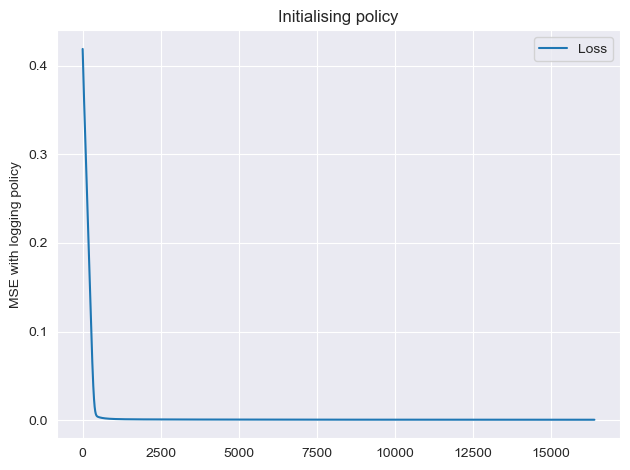

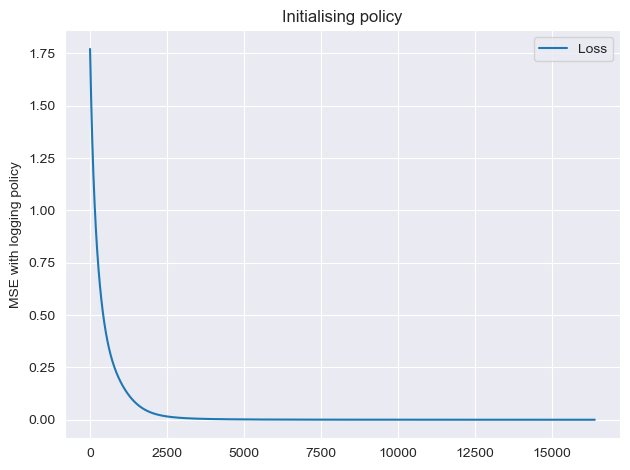

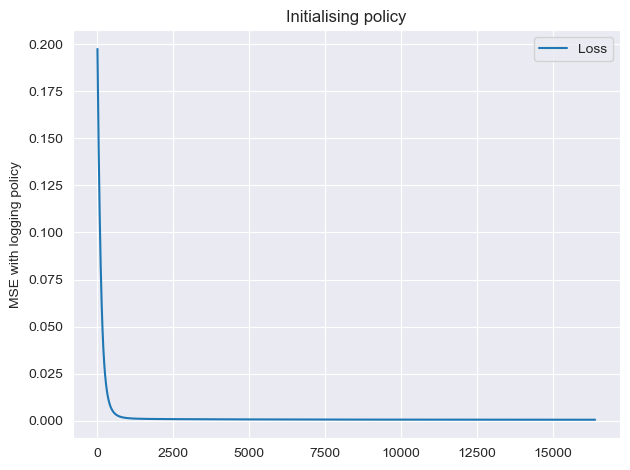

In [10]:
# Placeholders for output
auction_revenue = []
social_welfare = []
social_surplus = []
# Run repeated auctions
# This logic is encoded in the `simulation_run()` method in main.py
for i in tqdm(range(num_iter)):
    print( f'number of iteration: {i}\n')
    # Simulate impression opportunities
    for _ in range(rounds_per_iter):
        auction.simulate_opportunity()

    # Log 'Gross utility' or welfare
    social_welfare.append(sum([agent.gross_utility for agent in auction.agents]))

    # Log 'Net utility' or surplus
    social_surplus.append(sum([agent.net_utility for agent in auction.agents]))

    # Update agents (does nothing in this example, as we have truthful oracles)
    # Clear running metrics
    for agent_id, agent in enumerate(auction.agents):
        print(f'agent: {agent_id}\n' )
        agent.update(iteration=i)
        agent.clear_utility()
        agent.clear_logs()

    # Log revenue
    auction_revenue.append(auction.revenue)
    auction.clear_revenue()

# Rescale metrics per auction round
auction_revenue = np.array(auction_revenue) / rounds_per_iter
social_welfare = np.array(social_welfare) / rounds_per_iter
social_surplus = np.array(social_surplus) / rounds_per_iter

# Save Auction

In [12]:
pickle.dump(auction, open('DR_L_auction.pickle', 'wb'))

# Read Auction

In [11]:
auction = pickle.load(open('DR_L_auction.pickle', 'rb'))

# Data generation

In [7]:
# data generation
# Q2 the bidder updates seems does not use the utilities but the estimated_CTRs instead
# it seems to only use the utilities to calculate the welfare and surplus
# Input: context
# Action: bid/ gamma
# Output: reward
trained_welfare = {}
trained_surplus = {}

offline_data = {'train':{}, 'val': {}, 'test':{}}


num_data = [80000, 10000, 10000]

for i, data_set in enumerate(offline_data.keys()):
    for _ in range(num_data[i]):
        auction.simulate_opportunity()
    print(sum([agent.gross_utility for agent in auction.agents]))
    print(sum([agent.net_utility for agent in auction.agents]))
    print(auction.revenue)
    for agent_id, agent in enumerate(auction.agents):
        contexts = np.array(list(opp.context for opp in agent.logs))
        bids = np.array(list(opp.bid for opp in agent.logs))
        prices = np.array(list(opp.price for opp in agent.logs))
        second_prices = np.array(list(opp.second_price for opp in agent.logs))
        values = np.array(list(opp.value for opp in agent.logs))
        outcomes = np.array(list(opp.outcome for opp in agent.logs))
        won_mask = np.array(list(opp.won for opp in agent.logs))
        estimated_CTRs = np.array(list(opp.estimated_CTR for opp in agent.logs))
        true_CTRs = np.array(list(opp.true_CTR for opp in agent.logs))
        gammas = np.array(list(opp.detach().numpy() for opp in agent.bidder.gammas))
        utilities = np.zeros_like(values)
        utilities[won_mask] = (values[won_mask] * outcomes[won_mask]) - prices[won_mask]
        offline_data[data_set][agent_id] = np.hstack((contexts, estimated_CTRs.reshape(-1, 1),values.reshape(-1, 1), bids.reshape(-1, 1), gammas.reshape(-1,1), true_CTRs.reshape(-1,1), prices.reshape(-1, 1),second_prices.reshape(-1,1), won_mask.reshape(-1, 1),outcomes.reshape(-1, 1),utilities.reshape(-1, 1)))
        agent.clear_utility()
        agent.clear_logs()
        # may consider including estimated_CTRs as input features as well
    auction.clear_revenue()

43957.29157433502
11507.885297117906
32449.406277215377
5469.860340475545
1406.7052785665644
4063.1550619089844
5499.02260218562
1441.2206434793138
4057.8019587063045


# Save Data

In [23]:
data_dir = f"../data_{estimator}_{competition}/"
if not os.path.exists(data_dir):
    os.makedirs(data_dir)
for data_set in offline_data.keys():
    for agent_id in offline_data[data_set].keys():
        np.savetxt(f'{data_dir}{data_set}_{agent_id}.csv', offline_data[data_set][agent_id])

In [24]:
# import split_data
# import importlib
# importlib.reload(split_data)
from split_data import split_data

In [25]:
# split_data
for data_set in offline_data.keys():
    for agent_id in offline_data[data_set].keys():
        split_data(estimator=estimator, competition=competition, data_set=data_set, agent_num=str(agent_id), row_num=1000, data_dir=f'/Users/keithwu/Documents/GitHub/auction-gym/data_{estimator}_{competition}/')

# Read data

In [12]:
offline_data_key = {'context': 0, 'estimated_CTR': 5, 'value': 6, 'bid': 7, 'gamma': 8, 'true_CTR': 9, 'price': 10, 'second_price': 11, 'won_mask': 12, 'outcome': 13, 'utility': 14}

In [13]:
def read_csv_game_record_auction(csv_dir):
    data = np.genfromtxt(csv_dir, delimiter=' ')
    return data

In [14]:
offline_data = {'train': {}, 'val': {},'test': {}}
for agent_id in range(agent_num):
    offline_data['train'][agent_id] = read_csv_game_record_auction(f"../data_{estimator}_{competition}/train_{agent_id}.csv")
    offline_data['val'][agent_id] = read_csv_game_record_auction(f"../data_{estimator}_{competition}/val_{agent_id}.csv")
    offline_data['test'][agent_id] = read_csv_game_record_auction(f"../data_{estimator}_{competition}/test_{agent_id}.csv")

# CUTree

In [21]:
# bid value
min_split_int = 50 # default value in Linear Model U Tree
for agent_id in offline_data['train'].keys():
    best_params_ = None
    best_score_ = -100
    for max_depth in [10, 20, 35]:

        problem = Problem.Problem(estimator_type=estimator, competition=competition, agent_num=agent_id, split_size=1000)
        CUTreeAgent = Agent.CUTreeAgent(problem=problem, max_hist=10000)

        input_train_data = offline_data['train'][agent_id][:, :5]
        label_train_data = offline_data['train'][agent_id][:, 7]

        input_val_data = offline_data['val'][agent_id][:, :5]
        label_val_data = offline_data['val'][agent_id][:, 7]

        train_preds = CUTreeAgent.get_prediction(save_path=f'/Users/keithwu/Documents/GitHub/auction-gym/src/UTree_model_numpy/{estimator}_{competition}/agent_{agent_id}/model_boost_linear_save_1000_max_hist_10000_max_depth_{max_depth}_min_split_instances_{min_split_int}/', game_path= f'/Users/keithwu/Documents/GitHub/auction-gym/data_{estimator}_{competition}/', read_game_number=54, data_set='train')
        val_preds = CUTreeAgent.get_prediction(save_path=f'/Users/keithwu/Documents/GitHub/auction-gym/src/UTree_model_numpy/{estimator}_{competition}/agent_{agent_id}/model_boost_linear_save_1000_max_hist_10000_max_depth_{max_depth}_min_split_instances_{min_split_int}/', game_path= f'/Users/keithwu/Documents/GitHub/auction-gym/data_{estimator}_{competition}/', read_game_number=54, data_set='val')

        score = r2_score(label_val_data, val_preds)
        if score > best_score_:
            best_params_ = {'max_depth': max_depth}
            best_score_ = score
    print("Agent: ", agent_id)
    print("Param for GS", best_params_)
    #print("R2 score for GS", best_score_)

    # print("Train R2 score:", r2_score(label_train_data, train_preds))
    # print("Val R2 score:", r2_score(label_val_data, val_preds))
    # print("Train MSE: ", mean_squared_error(label_train_data, train_preds))
    # print("Val MSE: ", mean_squared_error(label_val_data, val_preds))

<ipykernel.iostream.OutStream object at 0x10605bb50> starting from 54
<ipykernel.iostream.OutStream object at 0x10605bb50> finishing read tree
<ipykernel.iostream.OutStream object at 0x10605bb50> starting from 54
<ipykernel.iostream.OutStream object at 0x10605bb50> finishing read tree
<ipykernel.iostream.OutStream object at 0x10605bb50> starting from 54
<ipykernel.iostream.OutStream object at 0x10605bb50> finishing read tree
<ipykernel.iostream.OutStream object at 0x10605bb50> starting from 54
<ipykernel.iostream.OutStream object at 0x10605bb50> finishing read tree
<ipykernel.iostream.OutStream object at 0x10605bb50> starting from 54
<ipykernel.iostream.OutStream object at 0x10605bb50> finishing read tree
<ipykernel.iostream.OutStream object at 0x10605bb50> starting from 54
<ipykernel.iostream.OutStream object at 0x10605bb50> finishing read tree
Agent:  0
Param for GS {'max_depth': 35}
<ipykernel.iostream.OutStream object at 0x10605bb50> starting from 54
<ipykernel.iostream.OutStream o

In [20]:
train_avg_r2_utree = []
train_avg_mse_utree = []

test_avg_r2_utree = []
test_avg_mse_utree = []

In [10]:
agent_id = 0
max_depth = 35
min_split_int = 50

problem = Problem.Problem(estimator_type=estimator, competition=competition, agent_num=agent_id)
CUTreeAgent = Agent.CUTreeAgent(problem=problem, max_hist=10000)

input_train_data = offline_data['train'][agent_id][:, :5]
label_train_data = offline_data['train'][agent_id][:, 7]

input_test_data = offline_data['test'][agent_id][:, :5]
label_test_data = offline_data['test'][agent_id][:, 7]

train_preds = CUTreeAgent.get_prediction(save_path=f'/Users/keithwu/Documents/GitHub/auction-gym/src/UTree_model_numpy/{estimator}_{competition}/agent_{agent_id}/model_boost_linear_save_1000_max_hist_10000_max_depth_{max_depth}_min_split_instances_{min_split_int}/', game_path= f'/Users/keithwu/Documents/GitHub/auction-gym/data_{estimator}_{competition}/', read_game_number=54, data_set='train')
test_preds = CUTreeAgent.get_prediction(save_path=f'/Users/keithwu/Documents/GitHub/auction-gym/src/UTree_model_numpy/{estimator}_{competition}/agent_{agent_id}/model_boost_linear_save_1000_max_hist_10000_max_depth_{max_depth}_min_split_instances_{min_split_int}/', game_path= f'/Users/keithwu/Documents/GitHub/auction-gym/data_{estimator}_{competition}/', read_game_number=54, data_set='test')

print("Train R2 score:", r2_score(label_train_data, train_preds))
print("Test R2 score:", r2_score(label_test_data, test_preds))
print("Train MSE: ", mean_squared_error(label_train_data, train_preds))
print("Test MSE: ", mean_squared_error(label_test_data, test_preds))
# train_avg_r2_utree.append(r2_score(label_train_data, train_preds))
# train_avg_mse_utree.append(mean_squared_error(label_train_data, train_preds))
# test_avg_r2_utree.append(r2_score(label_test_data, test_preds))
# test_avg_mse_utree.append(mean_squared_error(label_test_data, test_preds))

<ipykernel.iostream.OutStream object at 0x106013b50> starting from 54
<ipykernel.iostream.OutStream object at 0x106013b50> finishing read tree
<ipykernel.iostream.OutStream object at 0x106013b50> starting from 54
<ipykernel.iostream.OutStream object at 0x106013b50> finishing read tree
Train R2 score: 0.9496986281998596
Test R2 score: 0.9201973813737355
Train MSE:  0.0011076046977719258
Test MSE:  0.001736950260382059


In [55]:
print(statistics.mean(train_avg_r2_utree))
print(statistics.mean(train_avg_mse_utree))
print(statistics.mean(test_avg_r2_utree))
print(statistics.mean(test_avg_mse_utree))

0.9439841583443578
0.001280875539328007
0.910816395837413
0.0020260523465318414


In [ ]:
train_avg_r2_utree_lr = []
train_avg_mse_utree_lr = []

test_avg_r2_utree_lr = []
test_avg_mse_utree_lr = []

In [530]:
agent_id = 0

input_train_data = offline_data['train'][agent_id][:, :5]
label_train_data = offline_data['train'][agent_id][:, 7]

input_test_data = offline_data['test'][agent_id][:, :5]
label_test_data = offline_data['test'][agent_id][:, 7]

train_preds = utree_wrapper_predict_flex_lr(input_train_data, agent_id, 20)
test_preds = utree_wrapper_predict_flex_lr(input_test_data, agent_id, 20)


print("Train R2 score:", r2_score(label_train_data, train_preds))
print("Test R2 score:", r2_score(label_test_data, test_preds))
print("Train MSE: ", mean_squared_error(label_train_data, train_preds))
print("Test MSE: ", mean_squared_error(label_test_data, test_preds))

Train R2 score: 0.9358835216785181
Test R2 score: 0.9205738336959552
Train MSE:  0.0014118046894551497
Test MSE:  0.001728756557338763


# M5 Tree

In [8]:
# model = M5Prime(use_smoothing=True, use_pruning=False)
# for agent_id in offline_data['train'].keys():
#     input_train_data = offline_data['train'][agent_id][:, :5]
#     label_train_data = offline_data['train'][agent_id][:, 7]
#     print("Agent", agent_id)
#     best_estimator = model.fit(input_train_data, label_train_data)
#     input_test_data = offline_data['test'][agent_id][:, :5]
#     label_test_data = offline_data['test'][agent_id][:, 7]
#
#     train_preds = best_estimator.predict(input_train_data)
#     test_preds = best_estimator.predict(input_test_data)
#     print("Train R2 score:", r2_score(label_train_data, train_preds))
#     print("Test R2 score:", r2_score(label_test_data, test_preds))
#     print("Train MSE: ", mean_squared_error(label_train_data, train_preds))
#     print("Test MSE: ", mean_squared_error(label_test_data, test_preds))

In [27]:
param_grid = {
    'max_depth': [ 10, 20, 35]
}

In [28]:
def gridSearch_val(model_class, param_grid, input_train_data, label_train_data, input_val_data, label_val_data):
    best_params_ = None
    best_score_ = -100
    for max_depth in param_grid['max_depth']:
        #for min_samples_split in param_grid['min_samples_split']:
        model = model_class(max_depth= max_depth, random_state=0)
        model.fit(input_train_data, label_train_data)
        score = model.score(input_val_data, label_val_data)
        if score > best_score_:
            best_params_ = {'max_depth': max_depth}
            best_score_ = score


    print("Param for GS", best_params_)
    print("R2 score for GS", best_score_)
    best_model = model_class(**best_params_, random_state=0)
    return best_model

In [31]:
model_class = M5Prime
# without smoothing
context_bid_estimators_M5Tree = {}

train_avg_r2 = []
train_avg_mse = []

test_avg_r2 = []
test_avg_mse = []
# context with bid
for agent_id in offline_data['train'].keys():
    print("Agent", agent_id)
    input_train_data = offline_data['train'][agent_id][:, :5]
    label_train_data = offline_data['train'][agent_id][:, 7]
    input_val_data = offline_data['val'][agent_id][:, :5]
    label_val_data = offline_data['val'][agent_id][:, 7]
    input_test_data = offline_data['test'][agent_id][:, :5]
    label_test_data = offline_data['test'][agent_id][:, 7]

    best_estimator = gridSearch_val(model_class, param_grid, input_train_data, label_train_data, input_val_data, label_val_data)
    best_estimator.fit(input_train_data, label_train_data)
    print("Train R2 score:", best_estimator.score(input_train_data, label_train_data))
    train_avg_r2.append(best_estimator.score(input_train_data, label_train_data))
    print("Test R2 score:", best_estimator.score(input_test_data, label_test_data))
    test_avg_r2.append(best_estimator.score(input_test_data, label_test_data))

    train_preds = best_estimator.predict(input_train_data)
    test_preds = best_estimator.predict(input_test_data)
    print("Train MSE: ", mean_squared_error(label_train_data, train_preds))
    train_avg_mse.append(mean_squared_error(label_train_data, train_preds))
    print("Test MSE: ", mean_squared_error(label_test_data, test_preds))
    test_avg_mse.append(mean_squared_error(label_test_data, test_preds))
    context_bid_estimators_M5Tree[agent_id] = best_estimator


Agent 0
Param for GS {'max_depth': 35}
R2 score for GS 0.9416761371393382
Train R2 score: 0.9602006104223025
Test R2 score: 0.9436794439085816
Train MSE:  0.0008763576277772541
Test MSE:  0.0012258495554637757
Agent 1
Param for GS {'max_depth': 35}
R2 score for GS 0.9694331964465448
Train R2 score: 0.9721628558113161
Test R2 score: 0.9563598150072451
Train MSE:  0.0007094900138861054
Test MSE:  0.0011111919997387647
Agent 2
Param for GS {'max_depth': 35}
R2 score for GS 0.9554321721033666
Train R2 score: 0.9604745647531385
Test R2 score: 0.956286344244243
Train MSE:  0.0008672066321043933
Test MSE:  0.0009491437129516131


In [36]:
print(statistics.mean(train_avg_r2))
print(statistics.mean(test_avg_r2))
print(statistics.mean(train_avg_mse))
print(statistics.mean(test_avg_mse))

0.9642793436622524
0.9521085343866899
0.0008176847579225842
0.0010953950893847178


In [96]:
# context with bid
model_class = tree.DecisionTreeRegressor
context_bid_estimators_rTree = {}
train_avg_r2 = []
train_avg_mse = []

test_avg_r2 = []
test_avg_mse = []
for agent_id in offline_data['train'].keys():
    print("Agent", agent_id)
    input_train_data = offline_data['train'][agent_id][:, :5]
    label_train_data = offline_data['train'][agent_id][:, 7]
    input_val_data = offline_data['val'][agent_id][:, :5]
    label_val_data = offline_data['val'][agent_id][:, 7]
    input_test_data = offline_data['test'][agent_id][:, :5]
    label_test_data = offline_data['test'][agent_id][:, 7]

    best_estimator = gridSearch_val(model_class, param_grid, input_train_data, label_train_data, input_val_data, label_val_data)
    best_estimator.fit(input_train_data, label_train_data)
    print("Train R2 score:", best_estimator.score(input_train_data, label_train_data))
    train_avg_r2.append(best_estimator.score(input_train_data, label_train_data))
    print("Test R2 score:", best_estimator.score(input_test_data, label_test_data))
    test_avg_r2.append(best_estimator.score(input_test_data, label_test_data))

    train_preds = best_estimator.predict(input_train_data)
    test_preds = best_estimator.predict(input_test_data)
    print("Train MSE: ", mean_squared_error(label_train_data, train_preds))
    train_avg_mse.append(mean_squared_error(label_train_data, train_preds))
    print("Test MSE: ", mean_squared_error(label_test_data, test_preds))
    test_avg_mse.append(mean_squared_error(label_test_data, test_preds))
    context_bid_estimators_rTree[agent_id] = best_estimator

Agent 0
Param for GS {'max_depth': 20}
R2 score for GS 0.9037470372419304
Train R2 score: 0.9936441289208171
Test R2 score: 0.9017900579123483
Train MSE:  0.0001399522997843181
Test MSE:  0.0021375963272602496
Agent 1
Param for GS {'max_depth': 35}
R2 score for GS 0.9364860851727197
Train R2 score: 0.9999993853389166
Test R2 score: 0.9193852087219143
Train MSE:  1.566597125075255e-08
Test MSE:  0.002052661122854794
Agent 2
Param for GS {'max_depth': 35}
R2 score for GS 0.907313410939745
Train R2 score: 0.9999579377086846
Test R2 score: 0.9094832910645355
Train MSE:  9.228664469457475e-07
Test MSE:  0.0019653667422188186


In [38]:
print(statistics.mean(train_avg_r2))
print(statistics.mean(test_avg_r2))
print(statistics.mean(train_avg_mse))
print(statistics.mean(test_avg_mse))

0.9978671506561394
0.9102195192329328
4.696361073417153e-05
0.002051874730777954


# Check Bid value std

In [15]:
# M5Tree
model_class = M5Prime
context_bid_estimators_M5Tree = {}
best_params = {0: 35, 1: 35, 2: 35}
for agent_id in offline_data['train'].keys():
    best_estimator = model_class(max_depth= best_params[agent_id], random_state=0)
    best_estimator.fit(offline_data['train'][agent_id][:, :5], offline_data['train'][agent_id][:, 7])
    context_bid_estimators_M5Tree[agent_id] = best_estimator

# RTree
model_class = tree.DecisionTreeRegressor
context_bid_estimators_rTree = {}
best_params = {0: 20, 1: 35, 2: 35}
for agent_id in offline_data['train'].keys():
    best_estimator = model_class(max_depth= best_params[agent_id], random_state=0)
    best_estimator.fit(offline_data['train'][agent_id][:, :5], offline_data['train'][agent_id][:, 7])
    context_bid_estimators_rTree[agent_id] = best_estimator

In [526]:
def utree_wrapper_predict_flex_lr(contexts, agent_id, max_depth):
    min_split_int = 50
    read_game_number = 54
    utree_save_path = f'/Users/keithwu/Documents/GitHub/auction-gym/src/UTree_model_numpy/{estimator}_{competition}/agent_{agent_id}/model_boost_linear_save_1000_max_hist_10000_max_depth_{max_depth}_min_split_instances_{min_split_int}_linear_epoch_decay_lr/'
    problem = Problem.Problem(estimator_type=estimator, competition=competition, agent_num=agent_id, split_size=1000)
    CUTreeAgent = Agent.CUTreeAgent(problem=problem, max_hist=10000)
    utree = pickle.load(open(utree_save_path + 'pickle_Game_File_' + str(read_game_number) + '.p', 'rb'))
    return CUTreeAgent.predict(contexts, utree)

In [514]:
def utree_wrapper_predict_flex_changed(contexts, agent_id, max_depth):
    min_split_int = 50
    read_game_number = 60
    utree_save_path = f'/Users/keithwu/Documents/GitHub/auction-gym/src/UTree_model_numpy/{estimator}_{competition}/agent_{agent_id}/model_boost_linear_save_1000_max_hist_10000_max_depth_{max_depth}_min_split_instances_{min_split_int}/'
    problem = Problem.Problem(estimator_type=estimator, competition=competition, agent_num=agent_id, split_size=1000)
    CUTreeAgent = Agent.CUTreeAgent(problem=problem, max_hist=10000)
    utree = pickle.load(open(utree_save_path + 'pickle_Game_File_' + str(read_game_number) + '.p', 'rb'))
    return CUTreeAgent.predict(contexts, utree)

In [17]:
def utree_wrapper_model(agent_id, max_depth):
    min_split_int = 50
    read_game_number = 54
    utree_save_path = f'/Users/keithwu/Documents/GitHub/auction-gym/src/UTree_model_numpy/{estimator}_{competition}/agent_{agent_id}/model_boost_linear_save_1000_max_hist_10000_max_depth_{max_depth}_min_split_instances_{min_split_int}/'
    problem = Problem.Problem(estimator_type=estimator, competition=competition, agent_num=agent_id, split_size=1000)
    CUTreeAgent = Agent.CUTreeAgent(problem=problem, max_hist=10000)
    utree = pickle.load(open(utree_save_path + 'pickle_Game_File_' + str(read_game_number) + '.p', 'rb'))
    return CUTreeAgent, utree

In [515]:
def utree_wrapper_model_changed(agent_id, max_depth):
    min_split_int = 50
    read_game_number = 60
    utree_save_path = f'/Users/keithwu/Documents/GitHub/auction-gym/src/UTree_model_numpy/{estimator}_{competition}/agent_{agent_id}/model_boost_linear_save_1000_max_hist_10000_max_depth_{max_depth}_min_split_instances_{min_split_int}/'
    problem = Problem.Problem(estimator_type=estimator, competition=competition, agent_num=agent_id, split_size=1000)
    CUTreeAgent = Agent.CUTreeAgent(problem=problem, max_hist=10000)
    utree = pickle.load(open(utree_save_path + 'pickle_Game_File_' + str(read_game_number) + '.p', 'rb'))
    return CUTreeAgent, utree

In [18]:
best_params_utree = {0: 35, 1: 35, 2: 35}

In [11]:
# If the rng record is cleared, use this
# rng = np.random.default_rng(0)

In [306]:
def get_surrogate_utilities_utree(offline_data, offline_data_key ,context_num=5, rng=rng):
    surrogate_utilities = {}
    avg_r2 = []
    for agent_id in offline_data['train'].keys():
        surrogate_logs = {'outcomes':[], 'won_mask':[], 'prices':[]}
        data_set = 'test'
        surrogate_agent_id = agent_id

        surrogate_bid = utree_wrapper_predict_flex(offline_data[data_set][surrogate_agent_id][:, :context_num], agent_id, best_params_utree[agent_id])
        for i in range(len(offline_data[data_set][surrogate_agent_id])):
            # win_mask
            if offline_data[data_set][surrogate_agent_id][i, offline_data_key['won_mask']] == 1:
                if (surrogate_bid[i] >= offline_data[data_set][surrogate_agent_id][i, offline_data_key['bid']]) or (surrogate_bid[i] >= offline_data[data_set][surrogate_agent_id][i, offline_data_key['second_price']]):
                    surrogate_logs['won_mask'].append(True)
                    surrogate_logs['outcomes'].append(offline_data[data_set][surrogate_agent_id][i, offline_data_key['outcome']])
                    surrogate_logs['prices'].append(surrogate_bid[i])
                else:
                    surrogate_logs['won_mask'].append(False)
                    surrogate_logs['outcomes'].append(0)
                    surrogate_logs['prices'].append(offline_data[data_set][surrogate_agent_id][i, offline_data_key['price']])
            else:
                if (surrogate_bid[i] >= offline_data[data_set][surrogate_agent_id][i, offline_data_key['price']]):
                    surrogate_logs['won_mask'].append(True)
                    # This creates randomness in the surrogate model
                    outcome = rng.binomial(1, offline_data[data_set][surrogate_agent_id][i, offline_data_key['true_CTR']])
                    surrogate_logs['outcomes'].append(outcome)
                    surrogate_logs['prices'].append(surrogate_bid[i])
                else:
                    surrogate_logs['won_mask'].append(False)
                    surrogate_logs['outcomes'].append(0)
                    surrogate_logs['prices'].append(offline_data[data_set][surrogate_agent_id][i, offline_data_key['price']])

        surrogate_won_mask = np.array(surrogate_logs['won_mask'])
        surrogate_outcomes = np.array(surrogate_logs['outcomes'])
        surrogate_prices = np.array(surrogate_logs['prices'])
        surrogate_utilities[agent_id] = np.zeros_like(offline_data[data_set][surrogate_agent_id][:, offline_data_key['value']])
        surrogate_utilities[agent_id][surrogate_won_mask] = (offline_data[data_set][surrogate_agent_id][:, offline_data_key['value']][surrogate_won_mask] * surrogate_outcomes[surrogate_won_mask]) - surrogate_prices[surrogate_won_mask]
        print(f"Agent: {agent_id}")
        print(f"Original utility: {offline_data[data_set][surrogate_agent_id][:, offline_data_key['utility']].mean()}")
        print(f"Surrogate utility: {surrogate_utilities[agent_id].mean()}" )
        print(f"R2 score: {r2_score(offline_data[data_set][surrogate_agent_id][:, offline_data_key['utility']], surrogate_utilities[agent_id])}")
        avg_r2.append(r2_score(offline_data[data_set][surrogate_agent_id][:, offline_data_key['utility']], surrogate_utilities[agent_id]))
    return surrogate_utilities, statistics.mean(avg_r2)

In [307]:
# This is for single agent get replaced by surrogate model
def get_surrogate_utilities(context_bid_estimators, offline_data, offline_data_key ,context_num=5, rng=rng):
    surrogate_utilities = {}
    avg_r2 = []
    for agent_id in offline_data['train'].keys():
        surrogate_logs = {'outcomes':[], 'won_mask':[], 'prices':[]}
        data_set = 'test'
        surrogate_agent_id = agent_id
        surrogate_bid = context_bid_estimators[surrogate_agent_id].predict(offline_data[data_set][surrogate_agent_id][:, :context_num])
        for i in range(len(offline_data[data_set][surrogate_agent_id])):
            # win_mask
            if offline_data[data_set][surrogate_agent_id][i, offline_data_key['won_mask']] == 1:
                if (surrogate_bid[i] >= offline_data[data_set][surrogate_agent_id][i, offline_data_key['bid']]) or (surrogate_bid[i] >= offline_data[data_set][surrogate_agent_id][i, offline_data_key['second_price']]):
                    surrogate_logs['won_mask'].append(True)
                    surrogate_logs['outcomes'].append(offline_data[data_set][surrogate_agent_id][i, offline_data_key['outcome']])
                    surrogate_logs['prices'].append(surrogate_bid[i])
                else:
                    surrogate_logs['won_mask'].append(False)
                    surrogate_logs['outcomes'].append(0)
                    surrogate_logs['prices'].append(offline_data[data_set][surrogate_agent_id][i, offline_data_key['price']])
            else:
                if (surrogate_bid[i] >= offline_data[data_set][surrogate_agent_id][i, offline_data_key['price']]):
                    surrogate_logs['won_mask'].append(True)
                    # This creates randomness in the surrogate model
                    outcome = rng.binomial(1, offline_data[data_set][surrogate_agent_id][i, offline_data_key['true_CTR']])
                    surrogate_logs['outcomes'].append(outcome)
                    surrogate_logs['prices'].append(surrogate_bid[i])
                else:
                    surrogate_logs['won_mask'].append(False)
                    surrogate_logs['outcomes'].append(0)
                    surrogate_logs['prices'].append(offline_data[data_set][surrogate_agent_id][i, offline_data_key['price']])

        surrogate_won_mask = np.array(surrogate_logs['won_mask'])
        surrogate_outcomes = np.array(surrogate_logs['outcomes'])
        surrogate_prices = np.array(surrogate_logs['prices'])
        surrogate_utilities[agent_id] = np.zeros_like(offline_data[data_set][surrogate_agent_id][:, offline_data_key['value']])
        surrogate_utilities[agent_id][surrogate_won_mask] = (offline_data[data_set][surrogate_agent_id][:, offline_data_key['value']][surrogate_won_mask] * surrogate_outcomes[surrogate_won_mask]) - surrogate_prices[surrogate_won_mask]
        print(f"Agent: {agent_id}")
        print(f"Original utility: {offline_data[data_set][surrogate_agent_id][:, offline_data_key['utility']].mean()}")
        print(f"Surrogate utility: {surrogate_utilities[agent_id].mean()}" )
        print(f"R2 score: {r2_score(offline_data[data_set][surrogate_agent_id][:, offline_data_key['utility']], surrogate_utilities[agent_id])}")
        avg_r2.append(r2_score(offline_data[data_set][surrogate_agent_id][:, offline_data_key['utility']], surrogate_utilities[agent_id]))
    return surrogate_utilities, statistics.mean(avg_r2)

In [308]:
def print_agent_replace_metric(surrogate_avg_r2, surrogate_utilities, offline_data):
    print("R2")
    print(surrogate_avg_r2)
    surrogate_sum_utilities = 0
    perc_chg_utilities = []

    for agent_id in offline_data['train'].keys():
        surrogate_sum_utilities += surrogate_utilities[agent_id].sum()
    print("surrogate")
    print(surrogate_sum_utilities/10000)
    sum_utilities_DR = 0
    for agent_id in offline_data['train'].keys():
        sum_utilities_DR += offline_data['test'][agent_id][:, offline_data_key['utility']].sum()
        perc_chg_utilities.append((surrogate_utilities[agent_id].sum() - offline_data['test'][agent_id][:, offline_data_key['utility']].sum())/ offline_data['test'][agent_id][:, offline_data_key['utility']].sum())
    print("DR")
    print(sum_utilities_DR/10000)
    print("% change in social surplus")
    print((surrogate_sum_utilities-sum_utilities_DR)/sum_utilities_DR*100)
    print("Avg % change in net utility")
    print(statistics.mean(perc_chg_utilities)*100)

In [309]:
surrogate_utilities_utree, surrogate_avg_r2_utree =get_surrogate_utilities_utree(offline_data=offline_data,offline_data_key=offline_data_key,context_num=5)

Agent: 0
Original utility: 0.06966160880555962
Surrogate utility: 0.06836389753081633
R2 score: 0.8832086188894152
Agent: 1
Original utility: 0.055318576525157086
Surrogate utility: 0.054239126815249616
R2 score: 0.8756290973862213
Agent: 2
Original utility: 0.09148692393681432
Surrogate utility: 0.08854889703499984
R2 score: 0.8964158226375027


In [310]:
print_agent_replace_metric(surrogate_avg_r2_utree, surrogate_utilities_utree, offline_data)

R2
0.8850845129710464
surrogate
0.14076348765647434
DR
0.14430280354322514
% change in social surplus
-2.4527007097894766
Avg % change in net utility
-2.3418763769407


In [311]:
surrogate_utilities_rtree, surrogate_avg_r2_rtree =get_surrogate_utilities(context_bid_estimators_rTree, offline_data=offline_data,offline_data_key=offline_data_key,context_num=5)

Agent: 0
Original utility: 0.06966160880555962
Surrogate utility: 0.06467568607885375
R2 score: 0.8924600813155977
Agent: 1
Original utility: 0.055318576525157086
Surrogate utility: 0.057661895835627905
R2 score: 0.890049354522415
Agent: 2
Original utility: 0.09148692393681432
Surrogate utility: 0.08572071924839049
R2 score: 0.9270527014465273


In [312]:
print_agent_replace_metric(surrogate_avg_r2_rtree, surrogate_utilities_rtree, offline_data)

R2
0.9031873790948467
surrogate
0.13866951875385064
DR
0.14430280354322514
% change in social surplus
-3.90379441774814
Avg % change in net utility
-3.074688715808215


In [313]:
surrogate_utilities_m5tree, surrogate_avg_r2_m5tree =get_surrogate_utilities(context_bid_estimators_M5Tree, offline_data=offline_data,offline_data_key=offline_data_key,context_num=5)

Agent: 0
Original utility: 0.06966160880555962
Surrogate utility: 0.06925142440051488
R2 score: 0.9196611958227684
Agent: 1
Original utility: 0.055318576525157086
Surrogate utility: 0.05653317435411096
R2 score: 0.9161475217348152
Agent: 2
Original utility: 0.09148692393681432
Surrogate utility: 0.09213870238580836
R2 score: 0.9450808673668465


In [314]:
print_agent_replace_metric(surrogate_avg_r2_m5tree, surrogate_utilities_m5tree, offline_data)

R2
0.9269631949748101
surrogate
0.14526373399132328
DR
0.14430280354322514
% change in social surplus
0.6659125287266611
Avg % change in net utility
0.7730818883550687


In [89]:
auction = pickle.load(open('DR_L_auction.pickle', 'rb'))

In [45]:
auction.agents[0].bidder

# Auction with new competition

# Auction with original model

In [212]:
original_auction = pickle.load(open('DR_L_auction.pickle', 'rb'))

In [213]:
original_agents = deepcopy(original_auction.agents)

In [305]:
rng = original_auction.rng

In [317]:
# Auction with original model
auction_trained = deepcopy(original_auction)
# Placeholders for output
auction_revenue_trained = []
social_welfare_trained = []
social_surplus_trained = []
rounds_per_iter = 10000
utilities_trained ={key: 0 for key in range(3)}

for i in tqdm(range(3)):
    for _ in range(rounds_per_iter):
        # Simulate impression opportunities
        auction_trained.simulate_opportunity()

# Log 'Gross utility' or welfare
    social_welfare_trained.append(sum([agent.gross_utility for agent in auction_trained.agents]))

    # Log 'Net utility' or surplus
    social_surplus_trained.append(sum([agent.net_utility for agent in auction_trained.agents]))

    # Update agents (does nothing in this example, as we have truthful oracles)
    # Clear running metrics
    for agent_id, agent in enumerate(auction_trained.agents):
        print(f'agent: {agent_id}\n' )
        utilities_trained[agent_id]+= agent.net_utility
        agent.clear_utility()
        agent.clear_logs()

    # Log revenue
    auction_revenue_trained.append(auction_trained.revenue)
    auction_trained.clear_revenue()

# Rescale metrics per auction round
auction_revenue_trained = np.array(auction_revenue_trained) / rounds_per_iter
social_welfare_trained = np.array(social_welfare_trained) / rounds_per_iter
social_surplus_trained = np.array(social_surplus_trained) / rounds_per_iter
print(auction_revenue_trained.mean())
print(social_welfare_trained.mean())
print(social_surplus_trained.mean())

  0%|          | 0/3 [00:00<?, ?it/s]

agent: 0

agent: 1

agent: 2

agent: 0

agent: 1

agent: 2

agent: 0

agent: 1

agent: 2

0.406374123195693
0.5499482036418609
0.14357408044616962


In [321]:
utilities_trained

{0: 1398.5538326719557, 1: 1100.6344714590139, 2: 1808.0341092541194}

In [531]:
utilities_trained

{0: 1398.5538326719557, 1: 1100.6344714590139, 2: 1808.0341092541194}

In [315]:
social_surplus_trained

array([0.14563587, 0.15242468, 0.134461  ])

In [193]:
def surrogate_agent(auction, agents, context_bid_estimators, rounds_per_iter=10000, rng=None):
    auction_surrogate = deepcopy(auction)
    utilities_dict = {
    'Agent 0 Replaced': {key: 0 for key in range(3)},
    'Agent 1 Replaced': {key: 0 for key in range(3)},
    'Agent 2 Replaced': {key: 0 for key in range(3)}
    }
    avg_auction_revenue_surrogate = []
    avg_social_welfare_surrogate = []
    avg_social_surplus_surrogate = []
    for replacing_agent_id in range(3):
        print(f'replacing agent: {replacing_agent_id}\n')
        check_data = {}
        agents_surrogate = deepcopy(agents)
        #agents are still the trained agents from black box
        agents_surrogate[replacing_agent_id].bidder = SurrogateBidder(rng=rng, model=context_bid_estimators[replacing_agent_id])
        for agent_id in range(3):
            print(agents_surrogate[agent_id].bidder)

        auction_surrogate.agents = agents_surrogate

        # Placeholders for output
        auction_revenue_surrogate = []
        social_welfare_surrogate = []
        social_surplus_surrogate = []
        # Run repeated auctions
        # This logic is encoded in the `simulation_run()` method in main.py

        for i in tqdm(range(3)):
            for _ in range(rounds_per_iter):
                # Simulate impression opportunities
                auction_surrogate.simulate_opportunity()

            # Log 'Gross utility' or welfare
            social_welfare_surrogate.append(sum([agent.gross_utility for agent in auction_surrogate.agents]))

            # Log 'Net utility' or surplus
            social_surplus_surrogate.append(sum([agent.net_utility for agent in auction_surrogate.agents]))

            # Update agents (does nothing in this example, as we have truthful oracles)
            # Clear running metrics
            for agent_id, agent in enumerate(auction_surrogate.agents):
                contexts = np.array(list(opp.context for opp in agent.logs))
                bids = np.array(list(opp.bid for opp in agent.logs))
                prices = np.array(list(opp.price for opp in agent.logs))
                second_prices = np.array(list(opp.second_price for opp in agent.logs))
                values = np.array(list(opp.value for opp in agent.logs))
                outcomes = np.array(list(opp.outcome for opp in agent.logs))
                won_mask = np.array(list(opp.won for opp in agent.logs))
                estimated_CTRs = np.array(list(opp.estimated_CTR for opp in agent.logs))
                true_CTRs = np.array(list(opp.true_CTR for opp in agent.logs))
                #gammas = np.array(list(opp.detach().numpy() for opp in agent.bidder.gammas))
                utilities = np.zeros_like(values)
                utilities[won_mask] = (values[won_mask] * outcomes[won_mask]) - prices[won_mask]
                check_data[agent_id] = np.hstack((contexts, estimated_CTRs.reshape(-1, 1),values.reshape(-1, 1), bids.reshape(-1, 1), bids.reshape(-1, 1), true_CTRs.reshape(-1,1), prices.reshape(-1, 1),second_prices.reshape(-1,1), won_mask.reshape(-1, 1),outcomes.reshape(-1, 1),utilities.reshape(-1, 1)))
                utilities_dict[f'Agent {replacing_agent_id} Replaced'][agent_id]+= agent.net_utility
                agent.clear_utility()
                agent.clear_logs()

            # Log revenue
            auction_revenue_surrogate.append(auction_surrogate.revenue)
            auction_surrogate.clear_revenue()

        # Rescale metrics per auction round
        auction_revenue_surrogate = np.array(auction_revenue_surrogate) / rounds_per_iter
        social_welfare_surrogate = np.array(social_welfare_surrogate) / rounds_per_iter
        social_surplus_surrogate = np.array(social_surplus_surrogate) / rounds_per_iter

        print(auction_revenue_surrogate.mean())
        print(social_welfare_surrogate.mean())
        print(social_surplus_surrogate.mean())
        avg_auction_revenue_surrogate.append(auction_revenue_surrogate.mean())
        avg_social_welfare_surrogate.append(social_welfare_surrogate.mean())
        avg_social_surplus_surrogate.append(social_surplus_surrogate.mean())

    print('**********************************')
    print(f'Avg. Auction Revenue over 3 replacements {np.array(avg_auction_revenue_surrogate).mean()}')
    print(f'Avg. Social Welfare over 3 replacements {np.array(avg_social_welfare_surrogate).mean()}')
    print(f'Avg. Social Surplus over 3 replacements {np.array(avg_social_surplus_surrogate).mean()}')

    return check_data, utilities_dict

In [200]:
def surrogate_agent_utree(auction, agents,  rounds_per_iter=10000, rng=None):
    auction_surrogate = deepcopy(auction)
    utilities_dict = {
    'Agent 0 Replaced': {key: 0 for key in range(3)},
    'Agent 1 Replaced': {key: 0 for key in range(3)},
    'Agent 2 Replaced': {key: 0 for key in range(3)}
    }
    avg_auction_revenue_surrogate = []
    avg_social_welfare_surrogate = []
    avg_social_surplus_surrogate = []
    for replacing_agent_id in range(3):
        print(f'replacing agent: {replacing_agent_id}\n')
        check_data = {}
        agents_surrogate = deepcopy(agents)
        #agents are still the trained agents from black box
        utree_model, utree = utree_wrapper_model(replacing_agent_id, best_params_utree[replacing_agent_id])
        agents_surrogate[replacing_agent_id].bidder = SurrogateBidder_utree(rng=rng, model=utree_model, utree=utree)
        for agent_id in range(3):
            print(agents_surrogate[agent_id].bidder)

        auction_surrogate.agents = agents_surrogate

        # Placeholders for output
        auction_revenue_surrogate = []
        social_welfare_surrogate = []
        social_surplus_surrogate = []
        # Run repeated auctions
        # This logic is encoded in the `simulation_run()` method in main.py

        for i in tqdm(range(3)):
            for _ in range(rounds_per_iter):
                # Simulate impression opportunities
                auction_surrogate.simulate_opportunity()

            # Log 'Gross utility' or welfare
            social_welfare_surrogate.append(sum([agent.gross_utility for agent in auction_surrogate.agents]))

            # Log 'Net utility' or surplus
            social_surplus_surrogate.append(sum([agent.net_utility for agent in auction_surrogate.agents]))

            # Update agents (does nothing in this example, as we have truthful oracles)
            # Clear running metrics
            for agent_id, agent in enumerate(auction_surrogate.agents):
                contexts = np.array(list(opp.context for opp in agent.logs))
                bids = np.array(list(opp.bid for opp in agent.logs))
                prices = np.array(list(opp.price for opp in agent.logs))
                second_prices = np.array(list(opp.second_price for opp in agent.logs))
                values = np.array(list(opp.value for opp in agent.logs))
                outcomes = np.array(list(opp.outcome for opp in agent.logs))
                won_mask = np.array(list(opp.won for opp in agent.logs))
                estimated_CTRs = np.array(list(opp.estimated_CTR for opp in agent.logs))
                true_CTRs = np.array(list(opp.true_CTR for opp in agent.logs))
                #gammas = np.array(list(opp.detach().numpy() for opp in agent.bidder.gammas))
                utilities = np.zeros_like(values)
                utilities[won_mask] = (values[won_mask] * outcomes[won_mask]) - prices[won_mask]
                check_data[agent_id] = np.hstack((contexts, estimated_CTRs.reshape(-1, 1),values.reshape(-1, 1), bids.reshape(-1, 1), bids.reshape(-1, 1), true_CTRs.reshape(-1,1), prices.reshape(-1, 1),second_prices.reshape(-1,1), won_mask.reshape(-1, 1),outcomes.reshape(-1, 1),utilities.reshape(-1, 1)))
                utilities_dict[f'Agent {replacing_agent_id} Replaced'][agent_id]+= agent.net_utility
                agent.clear_utility()
                agent.clear_logs()

            # Log revenue
            auction_revenue_surrogate.append(auction_surrogate.revenue)
            auction_surrogate.clear_revenue()

        # Rescale metrics per auction round
        auction_revenue_surrogate = np.array(auction_revenue_surrogate) / rounds_per_iter
        social_welfare_surrogate = np.array(social_welfare_surrogate) / rounds_per_iter
        social_surplus_surrogate = np.array(social_surplus_surrogate) / rounds_per_iter

        print(auction_revenue_surrogate.mean())
        print(social_welfare_surrogate.mean())
        print(social_surplus_surrogate.mean())
        avg_auction_revenue_surrogate.append(auction_revenue_surrogate.mean())
        avg_social_welfare_surrogate.append(social_welfare_surrogate.mean())
        avg_social_surplus_surrogate.append(social_surplus_surrogate.mean())

    print('**********************************')
    print(f'Avg. Auction Revenue over 3 replacements {np.array(avg_auction_revenue_surrogate).mean()}')
    print(f'Avg. Social Welfare over 3 replacements {np.array(avg_social_welfare_surrogate).mean()}')
    print(f'Avg. Social Surplus over 3 replacements {np.array(avg_social_surplus_surrogate).mean()}')

    return check_data, utilities_dict

In [201]:
surrogate_agent_uTree, utilities_dict_uTree = surrogate_agent_utree(original_auction, original_agents, rounds_per_iter=10000, rng=original_auction.rng)

replacing agent: 0



  0%|          | 0/3 [00:00<?, ?it/s]

0.40599248472894267
0.5485414719027831
0.14254898717384198
replacing agent: 1



  0%|          | 0/3 [00:00<?, ?it/s]

0.40458294421468305
0.5494539681519816
0.14487102393730056
replacing agent: 2



  0%|          | 0/3 [00:00<?, ?it/s]

0.4053546628311739
0.5453447419097445
0.13999007907857183
**********************************
Avg. Auction Revenue over 3 replacements 0.4053100305915999
Avg. Social Welfare over 3 replacements 0.5477800606548363
Avg. Social Surplus over 3 replacements 0.14247003006323813


In [194]:
surrogate_agent_m5, utilities_dict_m5 = surrogate_agent(original_auction, original_agents, context_bid_estimators_M5Tree, rounds_per_iter=10000, rng=original_auction.rng)

replacing agent: 0



  0%|          | 0/3 [00:00<?, ?it/s]

0.40529667434657446
0.5499557778868477
0.14465910354027514
replacing agent: 1



  0%|          | 0/3 [00:00<?, ?it/s]

0.4038230475934232
0.5493040588639636
0.14548101127054158
replacing agent: 2



  0%|          | 0/3 [00:00<?, ?it/s]

0.4041732402697789
0.5462640976576153
0.14209085738783808
**********************************
Avg. Auction Revenue over 3 replacements 0.40443098740325883
Avg. Social Welfare over 3 replacements 0.5485079781361422
Avg. Social Surplus over 3 replacements 0.14407699073288494


In [195]:
utilities_dict_m5
df_utilities_dict_m5 = pd.DataFrame(utilities_dict_m5)
df_utilities_dict_m5.index = [f"Agent{i}" for i in df_utilities_dict_m5.index]
df_utilities_dict_m5 /= 3

In [196]:
df_utilities_dict_m5

,Agent 0 Replaced,Agent 1 Replaced,Agent 2 Replaced
Agent0,453.312341,461.448595,477.031756
Agent1,385.947172,410.573087,388.068142
Agent2,607.331522,582.788430,555.808677


In [197]:
surrogate_agent_rTree, utilities_dict_rTree = surrogate_agent(original_auction, original_agents, context_bid_estimators_rTree, rounds_per_iter=10000, rng=original_auction.rng)

replacing agent: 0



  0%|          | 0/3 [00:00<?, ?it/s]

0.40623970628537914
0.5502516551316966
0.14401194884631943
replacing agent: 1



  0%|          | 0/3 [00:00<?, ?it/s]

0.40503636637514767
0.5497224938738251
0.14468612749867837
replacing agent: 2



  0%|          | 0/3 [00:00<?, ?it/s]

0.40564356322056394
0.5462040073498394
0.1405604441292776
**********************************
Avg. Auction Revenue over 3 replacements 0.40563987862703027
Avg. Social Welfare over 3 replacements 0.5487260521184537
Avg. Social Surplus over 3 replacements 0.14308617349142513


In [199]:
df_utilities_dict_rTree = pd.DataFrame(utilities_dict_rTree)
df_utilities_dict_rTree.index = [f"Agent{i}" for i in df_utilities_dict_rTree.index]
df_utilities_dict_rTree /= 3
print(df_utilities_dict_rTree)

        Agent 0 Replaced  Agent 1 Replaced  Agent 2 Replaced
Agent0        467.421372        461.187690        475.631149
Agent1        377.715579        406.832104        381.239322
Agent2        594.982538        578.841481        548.733971


In [222]:
def surrogate_auction(auction, agents, context_bid_estimators, rounds_per_iter=10000, rng=None):
    agents_surrogate = deepcopy(agents)
    auction_surrogate = deepcopy(auction)
    #agents are still the trained agents from black box
    for i, agent in enumerate(agents_surrogate):
        agent.bidder = SurrogateBidder(rng=rng, model=context_bid_estimators[i])
    auction_surrogate.agents = agents_surrogate

    # Placeholders for output
    auction_revenue_surrogate = []
    social_welfare_surrogate = []
    social_surplus_surrogate = []
    # Run repeated auctions
    # This logic is encoded in the `simulation_run()` method in main.py
    for i in tqdm(range(3)):
        for _ in range(rounds_per_iter):
            # Simulate impression opportunities
            auction_surrogate.simulate_opportunity()

        # Log 'Gross utility' or welfare
        social_welfare_surrogate.append(sum([agent.gross_utility for agent in auction_surrogate.agents]))

        # Log 'Net utility' or surplus
        social_surplus_surrogate.append(sum([agent.net_utility for agent in auction_surrogate.agents]))

        # Update agents (does nothing in this example, as we have truthful oracles)
        # Clear running metrics
        for agent_id, agent in enumerate(auction_surrogate.agents):
            agent.clear_utility()
            agent.clear_logs()

        # Log revenue
        auction_revenue_surrogate.append(auction_surrogate.revenue)
        auction_surrogate.clear_revenue()

    # Rescale metrics per auction round
    auction_revenue_surrogate = np.array(auction_revenue_surrogate) / rounds_per_iter
    social_welfare_surrogate = np.array(social_welfare_surrogate) / rounds_per_iter
    social_surplus_surrogate = np.array(social_surplus_surrogate) / rounds_per_iter

    print(auction_revenue_surrogate.mean())
    print(social_welfare_surrogate.mean())
    print(social_surplus_surrogate.mean())

In [223]:
def surrogate_auction_utree(auction, agents, rounds_per_iter=10000, rng=None):

    agents_surrogate = deepcopy(agents)
    auction_surrogate = deepcopy(auction)
    #agents are still the trained agents from black box
    for i, agent in enumerate(agents_surrogate):
        utree_model, utree = utree_wrapper_model(i, best_params_utree[i])
        agent.bidder = SurrogateBidder_utree(rng=rng, model=utree_model, utree=utree)
    auction_surrogate.agents = agents_surrogate

    # Placeholders for output
    auction_revenue_surrogate = []
    social_welfare_surrogate = []
    social_surplus_surrogate = []
    # Run repeated auctions
    # This logic is encoded in the `simulation_run()` method in main.py
    for i in tqdm(range(3)):
        for _ in range(rounds_per_iter):
            # Simulate impression opportunities
            auction_surrogate.simulate_opportunity()

        # Log 'Gross utility' or welfare
        social_welfare_surrogate.append(sum([agent.gross_utility for agent in auction_surrogate.agents]))

        # Log 'Net utility' or surplus
        social_surplus_surrogate.append(sum([agent.net_utility for agent in auction_surrogate.agents]))

        # Update agents (does nothing in this example, as we have truthful oracles)
        # Clear running metrics
        for agent_id, agent in enumerate(auction_surrogate.agents):
            agent.clear_utility()
            agent.clear_logs()

        # Log revenue
        auction_revenue_surrogate.append(auction_surrogate.revenue)
        auction_surrogate.clear_revenue()

    # Rescale metrics per auction round
    auction_revenue_surrogate = np.array(auction_revenue_surrogate) / rounds_per_iter
    social_welfare_surrogate = np.array(social_welfare_surrogate) / rounds_per_iter
    social_surplus_surrogate = np.array(social_surplus_surrogate) / rounds_per_iter

    print(auction_revenue_surrogate.mean())
    print(social_welfare_surrogate.mean())
    print(social_surplus_surrogate.mean())

In [218]:
surrogate_auction_utree(original_auction, original_agents, rounds_per_iter=10000, rng=rng)

  0%|          | 0/3 [00:00<?, ?it/s]

agent: 0

agent: 1

agent: 2

agent: 0

agent: 1

agent: 2

agent: 0

agent: 1

agent: 2

0.4051075839460842
0.5469521276747772
0.14184454372869493


In [224]:
surrogate_auction(original_auction, original_agents, context_bid_estimators_rTree, rounds_per_iter=10000, rng=rng)

  0%|          | 0/3 [00:00<?, ?it/s]

0.40629257812757774
0.5489782140426005
0.14268563591502398


In [225]:
surrogate_auction(original_auction, original_agents, context_bid_estimators_M5Tree, rounds_per_iter=10000, rng=rng)

  0%|          | 0/3 [00:00<?, ?it/s]

0.40236830767989157
0.5505889009864228
0.14822059330653278


In [323]:
original_auction.agents2item_values

{'DR 1': array([1.06087655, 0.89711427, 1.24935151, 1.06176653, 1.01270638,
        1.22625934, 1.00469518, 1.45906526, 1.18564984, 1.0051466 ,
        0.74912232, 0.85082345]),
 'DR 2': array([1.3735054 , 1.0940421 , 1.04432943, 1.53518412, 0.85510599,
        0.98301435, 1.00549752, 1.24267642, 0.96782205, 0.97757177,
        0.80169273, 1.27873317]),
 'DR 3': array([1.29852353, 1.00473583, 1.14187082, 0.85339802, 1.00565329,
        1.45585039, 1.13558297, 1.75430488, 0.94417991, 1.24117298,
        1.06279139, 1.23758707])}

# AdaptiveTesting

In [119]:
rng_sec, config, agent_configs, agents2items_sec, agents2item_values_sec,\
num_runs, max_slots, embedding_size, embedding_var,\
obs_embedding_size = parse_config('../config/FP_DR_TS_sec.json')

  0%|          | 0/25 [00:00<?, ?it/s]

number of iteration: 0

agent: 0




DR 1:  40%|████      | 6584/16384 [00:02<00:03, 2591.53it/s]


Stopping at Epoch 6584



DR 1: 100%|██████████| 32768/32768 [00:08<00:00, 3959.09it/s]


AUC predicting P(win):				 0.9215072303232927
Estimated Utility	 Mean Error:			 1.176384379487189
Estimated Utility	 Mean Absolute Error:	 1.1998314221957234



Initialising Policy: 100%|██████████| 16384/16384 [00:13<00:00, 1217.56it/s]


Predicted mu Gammas:  tensor(0.9929, grad_fn=<MinBackward1>) tensor(1.0230, grad_fn=<MaxBackward1>) tensor(0.9998, grad_fn=<MeanBackward0>)
Predicted sigma Gammas:  tensor(0.0333, grad_fn=<MinBackward1>) tensor(0.1096, grad_fn=<MaxBackward1>) tensor(0.0466, grad_fn=<MeanBackward0>)



DR 1:  19%|█▊        | 6124/32768 [00:08<00:35, 750.55it/s]


Stopping at Epoch 6124
DR 1 Number of samples:  torch.Size([6673, 2])
DR 1 Predicted Gammas:  0.61719656 1.0 0.73185617
agent: 1




DR 2:  34%|███▍      | 5610/16384 [00:01<00:03, 3386.49it/s]


Stopping at Epoch 5610



DR 2: 100%|██████████| 32768/32768 [00:08<00:00, 3952.10it/s]


AUC predicting P(win):				 0.7827847996434035
Estimated Utility	 Mean Error:			 0.5355191090179959
Estimated Utility	 Mean Absolute Error:	 0.5562608251594938



Initialising Policy: 100%|██████████| 16384/16384 [00:13<00:00, 1230.66it/s]


Predicted mu Gammas:  tensor(0.9578, grad_fn=<MinBackward1>) tensor(1.0108, grad_fn=<MaxBackward1>) tensor(0.9988, grad_fn=<MeanBackward0>)
Predicted sigma Gammas:  tensor(0.0346, grad_fn=<MinBackward1>) tensor(0.1165, grad_fn=<MaxBackward1>) tensor(0.0501, grad_fn=<MeanBackward0>)



DR 2:   0%|          | 78/32768 [00:00<00:42, 772.01it/s]

Epoch 00121: reducing learning rate of group 0 to 1.4000e-03.



DR 2:   1%|          | 234/32768 [00:00<00:41, 776.86it/s]

Epoch 00222: reducing learning rate of group 0 to 2.8000e-04.



DR 2:   1%|          | 312/32768 [00:00<00:41, 775.53it/s]

Epoch 00323: reducing learning rate of group 0 to 5.6000e-05.



DR 2:   1%|▏         | 469/32768 [00:00<00:41, 777.50it/s]

Epoch 00424: reducing learning rate of group 0 to 1.1200e-05.


DR 2:   2%|▏         | 538/32768 [00:00<00:41, 774.20it/s]


Epoch 00525: reducing learning rate of group 0 to 2.2400e-06.
Stopping at Epoch 538
DR 2 Number of samples:  torch.Size([6695, 2])
DR 2 Predicted Gammas:  1.0 1.0 1.0
agent: 2




DR 3:  37%|███▋      | 6006/16384 [00:01<00:02, 4549.67it/s]


Stopping at Epoch 6006



DR 3: 100%|██████████| 32768/32768 [00:07<00:00, 4179.26it/s]


AUC predicting P(win):				 0.7266629115055457
Estimated Utility	 Mean Error:			 0.2085905052010735
Estimated Utility	 Mean Absolute Error:	 0.2195626147150188



Initialising Policy:  76%|███████▌  | 12461/16384 [00:10<00:03, 1233.70it/s]


Stopping at Epoch 12461
Predicted mu Gammas:  tensor(0.9948, grad_fn=<MinBackward1>) tensor(1.0134, grad_fn=<MaxBackward1>) tensor(0.9994, grad_fn=<MeanBackward0>)
Predicted sigma Gammas:  tensor(0.0267, grad_fn=<MinBackward1>) tensor(0.0810, grad_fn=<MaxBackward1>) tensor(0.0491, grad_fn=<MeanBackward0>)



DR 3:  13%|█▎        | 4217/32768 [00:05<00:35, 800.94it/s]


Stopping at Epoch 4217
DR 3 Number of samples:  torch.Size([6632, 2])
DR 3 Predicted Gammas:  0.6691201 0.8430796 0.7411959
number of iteration: 1

agent: 0




DR 1:  14%|█▍        | 2369/16384 [00:00<00:04, 2908.42it/s]


Stopping at Epoch 2369
AUC predicting P(win):				 0.6943896826960978
Estimated Utility	 Mean Error:			 0.08233201720599204
Estimated Utility	 Mean Absolute Error:	 0.2726891057998703



DR 1:  83%|████████▎ | 27232/32768 [00:06<00:01, 4014.44it/s]

Epoch 26701: reducing learning rate of group 0 to 6.0000e-04.
Epoch 27001: reducing learning rate of group 0 to 1.2000e-04.
Epoch 27258: reducing learning rate of group 0 to 2.4000e-05.



DR 1:  86%|████████▌ | 28062/32768 [00:07<00:01, 3984.03it/s]


Epoch 27515: reducing learning rate of group 0 to 4.8000e-06.
Epoch 27772: reducing learning rate of group 0 to 9.6000e-07.
Epoch 28029: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 28062
AUC predicting P(win):				 0.6997864111154909
Estimated Utility	 Mean Error:			 0.09862159772555164
Estimated Utility	 Mean Absolute Error:	 0.281064912324888



DR 1:   3%|▎         | 939/32768 [00:01<00:41, 772.05it/s]

Epoch 00862: reducing learning rate of group 0 to 1.4000e-03.



DR 1:   6%|▌         | 1913/32768 [00:02<00:39, 775.83it/s]


Stopping at Epoch 1913
DR 1 Number of samples:  torch.Size([6660, 2])
DR 1 Predicted Gammas:  0.733446 1.0 0.98790646
agent: 1




DR 2:   7%|▋         | 1114/16384 [00:00<00:04, 3102.30it/s][A


Stopping at Epoch 1114
AUC predicting P(win):				 0.8457611900270544
Estimated Utility	 Mean Error:			 0.04486661045962945
Estimated Utility	 Mean Absolute Error:	 0.2711875241438225



DR 2:  98%|█████████▊| 32265/32768 [00:08<00:00, 3974.71it/s]

Epoch 31511: reducing learning rate of group 0 to 6.0000e-04.
Epoch 31769: reducing learning rate of group 0 to 1.2000e-04.
Epoch 32026: reducing learning rate of group 0 to 2.4000e-05.
Epoch 32283: reducing learning rate of group 0 to 4.8000e-06.



DR 2: 100%|██████████| 32768/32768 [00:08<00:00, 3961.76it/s]


Epoch 32540: reducing learning rate of group 0 to 9.6000e-07.
AUC predicting P(win):				 0.8446404205467761
Estimated Utility	 Mean Error:			 0.04486863882725047
Estimated Utility	 Mean Absolute Error:	 0.27118955251144355



DR 2:   1%|          | 233/32768 [00:00<00:41, 778.12it/s]

Epoch 00111: reducing learning rate of group 0 to 1.4000e-03.
Epoch 00212: reducing learning rate of group 0 to 2.8000e-04.



DR 2:   1%|▏         | 467/32768 [00:00<00:41, 771.05it/s]

Epoch 00313: reducing learning rate of group 0 to 5.6000e-05.
Epoch 00414: reducing learning rate of group 0 to 1.1200e-05.


DR 2:   2%|▏         | 522/32768 [00:00<00:42, 766.94it/s]


Epoch 00515: reducing learning rate of group 0 to 2.2400e-06.
Stopping at Epoch 522
DR 2 Number of samples:  torch.Size([6701, 2])
DR 2 Predicted Gammas:  1.0 1.0 1.0
agent: 2




DR 3:  10%|▉         | 1567/16384 [00:00<00:03, 4157.60it/s]


Stopping at Epoch 1567
AUC predicting P(win):				 0.7469626793242882
Estimated Utility	 Mean Error:			 -0.007909936391655957
Estimated Utility	 Mean Absolute Error:	 0.101385743105988



DR 3:  40%|████      | 13136/32768 [00:03<00:04, 4088.17it/s]

Epoch 12467: reducing learning rate of group 0 to 6.0000e-04.
Epoch 12757: reducing learning rate of group 0 to 1.2000e-04.
Epoch 13014: reducing learning rate of group 0 to 2.4000e-05.
Epoch 13271: reducing learning rate of group 0 to 4.8000e-06.



DR 3:  42%|████▏     | 13905/32768 [00:03<00:04, 4076.01it/s]


Epoch 13528: reducing learning rate of group 0 to 9.6000e-07.
Epoch 13785: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 13905
AUC predicting P(win):				 0.7545900827506007
Estimated Utility	 Mean Error:			 0.016168967498202
Estimated Utility	 Mean Absolute Error:	 0.1106135571759572



DR 3:  20%|█▉        | 6459/32768 [00:08<00:34, 764.34it/s]


Stopping at Epoch 6459
DR 3 Number of samples:  torch.Size([6639, 2])
DR 3 Predicted Gammas:  0.74284565 0.83480304 0.7933074
number of iteration: 2

agent: 0




DR 1:   6%|▋         | 1025/16384 [00:00<00:05, 2895.55it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.6672884674964703
Estimated Utility	 Mean Error:			 -0.007703370906102426
Estimated Utility	 Mean Absolute Error:	 0.3160923866989097



DR 1:  11%|█         | 3640/32768 [00:00<00:07, 4037.76it/s]

Epoch 03191: reducing learning rate of group 0 to 6.0000e-04.
Epoch 03448: reducing learning rate of group 0 to 1.2000e-04.
Epoch 03705: reducing learning rate of group 0 to 2.4000e-05.
Epoch 03962: reducing learning rate of group 0 to 4.8000e-06.



DR 1:  14%|█▍        | 4731/32768 [00:01<00:06, 4029.65it/s]


Epoch 04219: reducing learning rate of group 0 to 9.6000e-07.
Epoch 04476: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 4731
AUC predicting P(win):				 0.6881186474816967
Estimated Utility	 Mean Error:			 -0.00862569859442253
Estimated Utility	 Mean Absolute Error:	 0.31622232939911116



DR 1:   5%|▌         | 1759/32768 [00:02<00:39, 779.73it/s]


Stopping at Epoch 1759
DR 1 Number of samples:  torch.Size([6695, 2])
DR 1 Predicted Gammas:  0.72588104 1.0 0.96380216
agent: 1




DR 2:   6%|▋         | 1025/16384 [00:00<00:05, 3019.94it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.8462792625132339
Estimated Utility	 Mean Error:			 0.0074470135974988175
Estimated Utility	 Mean Absolute Error:	 0.3212027321884984



DR 2:  28%|██▊       | 9205/32768 [00:02<00:05, 3982.80it/s]

Epoch 08551: reducing learning rate of group 0 to 6.0000e-04.
Epoch 08905: reducing learning rate of group 0 to 1.2000e-04.
Epoch 09162: reducing learning rate of group 0 to 2.4000e-05.



DR 2:  31%|███       | 10001/32768 [00:02<00:05, 3953.15it/s]

Epoch 09419: reducing learning rate of group 0 to 4.8000e-06.
Epoch 09676: reducing learning rate of group 0 to 9.6000e-07.
Epoch 09933: reducing learning rate of group 0 to 1.9200e-07.
Epoch 10190: reducing learning rate of group 0 to 1.0000e-07.



DR 2:  32%|███▏      | 10424/32768 [00:02<00:05, 3971.54it/s]


Stopping at Epoch 10424
AUC predicting P(win):				 0.8502067759695195
Estimated Utility	 Mean Error:			 0.0074470135974988175
Estimated Utility	 Mean Absolute Error:	 0.3212027321884984



DR 2:  20%|█▉        | 6499/32768 [00:08<00:34, 757.09it/s]


Stopping at Epoch 6499
DR 2 Number of samples:  torch.Size([6621, 2])
DR 2 Predicted Gammas:  0.47923368 0.9807611 0.84397626
agent: 2




DR 3:   6%|▋         | 1025/16384 [00:00<00:03, 4519.00it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.8875030744184089
Estimated Utility	 Mean Error:			 -0.00048734929969952376
Estimated Utility	 Mean Absolute Error:	 0.1076529088113475



DR 3:  35%|███▌      | 11510/32768 [00:02<00:05, 4106.69it/s]

Epoch 10705: reducing learning rate of group 0 to 6.0000e-04.
Epoch 11013: reducing learning rate of group 0 to 1.2000e-04.
Epoch 11270: reducing learning rate of group 0 to 2.4000e-05.
Epoch 11527: reducing learning rate of group 0 to 4.8000e-06.



DR 3:  37%|███▋      | 12027/32768 [00:02<00:05, 4089.60it/s]


Epoch 11784: reducing learning rate of group 0 to 9.6000e-07.
Stopping at Epoch 12027
AUC predicting P(win):				 0.8864550162951583
Estimated Utility	 Mean Error:			 -0.0032707193801653003
Estimated Utility	 Mean Absolute Error:	 0.1043980220402593



DR 3:  29%|██▉       | 9447/32768 [00:12<00:30, 768.98it/s]


Stopping at Epoch 9447
DR 3 Number of samples:  torch.Size([6684, 2])
DR 3 Predicted Gammas:  0.53788483 0.89850956 0.805371
number of iteration: 3

agent: 0




DR 1:   6%|▋         | 1025/16384 [00:00<00:05, 2798.16it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.6819442555048874
Estimated Utility	 Mean Error:			 -0.014705419266301074
Estimated Utility	 Mean Absolute Error:	 0.3399713916529028



DR 1:  17%|█▋        | 5655/32768 [00:01<00:06, 4032.78it/s]

Epoch 04914: reducing learning rate of group 0 to 6.0000e-04.
Epoch 05171: reducing learning rate of group 0 to 1.2000e-04.
Epoch 05530: reducing learning rate of group 0 to 2.4000e-05.



DR 1:  20%|█▉        | 6462/32768 [00:01<00:06, 4007.47it/s]

Epoch 05787: reducing learning rate of group 0 to 4.8000e-06.
Epoch 06044: reducing learning rate of group 0 to 9.6000e-07.
Epoch 06301: reducing learning rate of group 0 to 1.9200e-07.
Epoch 06558: reducing learning rate of group 0 to 1.0000e-07.


DR 1:  20%|██        | 6652/32768 [00:01<00:06, 4012.70it/s]


Stopping at Epoch 6652
AUC predicting P(win):				 0.7312335900778495
Estimated Utility	 Mean Error:			 -0.007792083737612181
Estimated Utility	 Mean Absolute Error:	 0.3386767346949082



DR 1:   3%|▎         | 1074/32768 [00:01<00:41, 771.71it/s]


Stopping at Epoch 1074
DR 1 Number of samples:  torch.Size([6760, 2])
DR 1 Predicted Gammas:  0.5919325 1.0 0.82108927
agent: 1




DR 2:   6%|▋         | 1025/16384 [00:00<00:04, 3403.55it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.8165822353219028
Estimated Utility	 Mean Error:			 -0.016033674410620546
Estimated Utility	 Mean Absolute Error:	 0.27173920821616154



DR 2:  29%|██▉       | 9513/32768 [00:02<00:05, 3940.22it/s]

Epoch 09026: reducing learning rate of group 0 to 6.0000e-04.
Epoch 09284: reducing learning rate of group 0 to 1.2000e-04.
Epoch 09541: reducing learning rate of group 0 to 2.4000e-05.
Epoch 09798: reducing learning rate of group 0 to 4.8000e-06.



DR 2:  32%|███▏      | 10500/32768 [00:02<00:05, 3924.88it/s]


Epoch 10055: reducing learning rate of group 0 to 9.6000e-07.
Epoch 10312: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 10500
AUC predicting P(win):				 0.8178156302984094
Estimated Utility	 Mean Error:			 -0.0007382955560858292
Estimated Utility	 Mean Absolute Error:	 0.27285499634208876



DR 2:  19%|█▊        | 6103/32768 [00:08<00:36, 735.59it/s]


Stopping at Epoch 6103
DR 2 Number of samples:  torch.Size([6633, 2])
DR 2 Predicted Gammas:  0.4405714 0.9734127 0.8684662
agent: 2




DR 3:   6%|▋         | 1025/16384 [00:00<00:03, 4029.34it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.8265008163082596
Estimated Utility	 Mean Error:			 -0.011769899570023752
Estimated Utility	 Mean Absolute Error:	 0.15718354222189956



DR 3:  18%|█▊        | 5748/32768 [00:01<00:06, 4106.29it/s]

Epoch 05125: reducing learning rate of group 0 to 6.0000e-04.
Epoch 05402: reducing learning rate of group 0 to 1.2000e-04.
Epoch 05659: reducing learning rate of group 0 to 2.4000e-05.
Epoch 05916: reducing learning rate of group 0 to 4.8000e-06.



DR 3:  20%|██        | 6643/32768 [00:01<00:06, 4075.03it/s]


Epoch 06173: reducing learning rate of group 0 to 9.6000e-07.
Epoch 06430: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 6643
AUC predicting P(win):				 0.827640396152329
Estimated Utility	 Mean Error:			 -0.006401137025532766
Estimated Utility	 Mean Absolute Error:	 0.1571355807248396



DR 3:  13%|█▎        | 4160/32768 [00:05<00:37, 756.43it/s]

Epoch 04028: reducing learning rate of group 0 to 1.4000e-03.
Epoch 04129: reducing learning rate of group 0 to 2.8000e-04.



DR 3:  13%|█▎        | 4312/32768 [00:05<00:37, 749.34it/s]

Epoch 04230: reducing learning rate of group 0 to 5.6000e-05.
Epoch 04331: reducing learning rate of group 0 to 1.1200e-05.



DR 3:  13%|█▎        | 4407/32768 [00:05<00:38, 743.66it/s]


Stopping at Epoch 4407
DR 3 Number of samples:  torch.Size([6607, 2])
DR 3 Predicted Gammas:  0.49550885 0.8867404 0.7725065
number of iteration: 4

agent: 0




DR 1:   6%|▋         | 1025/16384 [00:00<00:05, 2981.89it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.6884854263250604
Estimated Utility	 Mean Error:			 -0.01777300128125719
Estimated Utility	 Mean Absolute Error:	 0.31142902661147914



DR 1:  10%|▉         | 3261/32768 [00:00<00:07, 4052.07it/s]

Epoch 02685: reducing learning rate of group 0 to 6.0000e-04.
Epoch 03053: reducing learning rate of group 0 to 1.2000e-04.
Epoch 03310: reducing learning rate of group 0 to 2.4000e-05.



DR 1:  12%|█▏        | 4072/32768 [00:01<00:07, 4037.84it/s]

Epoch 03567: reducing learning rate of group 0 to 4.8000e-06.
Epoch 03824: reducing learning rate of group 0 to 9.6000e-07.
Epoch 04081: reducing learning rate of group 0 to 1.9200e-07.
Epoch 04338: reducing learning rate of group 0 to 1.0000e-07.



DR 1:  14%|█▍        | 4531/32768 [00:01<00:06, 4040.44it/s]


Stopping at Epoch 4531
AUC predicting P(win):				 0.6942820835506933
Estimated Utility	 Mean Error:			 0.0009950519192951197
Estimated Utility	 Mean Absolute Error:	 0.31682575598040186



DR 1:   2%|▏         | 666/32768 [00:00<00:41, 776.44it/s]


Stopping at Epoch 666
DR 1 Number of samples:  torch.Size([6611, 2])
DR 1 Predicted Gammas:  0.5923613 0.9576435 0.78197014
agent: 1




DR 2:   6%|▋         | 1025/16384 [00:00<00:04, 3293.04it/s]


Stopping at Epoch 1025
AUC predicting P(win):				 0.876807681620693
Estimated Utility	 Mean Error:			 -0.00686901628494178
Estimated Utility	 Mean Absolute Error:	 0.28218372841420925



DR 2:  51%|█████     | 16672/32768 [00:04<00:04, 3989.53it/s]

Epoch 16245: reducing learning rate of group 0 to 6.0000e-04.
Epoch 16527: reducing learning rate of group 0 to 1.2000e-04.
Epoch 16784: reducing learning rate of group 0 to 2.4000e-05.
Epoch 17041: reducing learning rate of group 0 to 4.8000e-06.



DR 2:  54%|█████▍    | 17714/32768 [00:04<00:03, 3947.84it/s]


Epoch 17298: reducing learning rate of group 0 to 9.6000e-07.
Epoch 17555: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 17714
AUC predicting P(win):				 0.8796759299354784
Estimated Utility	 Mean Error:			 -0.0024218870291801667
Estimated Utility	 Mean Absolute Error:	 0.2797605159793951



DR 2:  11%|█         | 3643/32768 [00:04<00:38, 754.28it/s]


Stopping at Epoch 3643
DR 2 Number of samples:  torch.Size([6659, 2])
DR 2 Predicted Gammas:  0.41111055 0.9694921 0.8149025
agent: 2




DR 3:   6%|▋         | 1025/16384 [00:00<00:04, 3604.04it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.7860409935612409
Estimated Utility	 Mean Error:			 0.0023454929768245486
Estimated Utility	 Mean Absolute Error:	 0.18767498108255437



DR 3:   7%|▋         | 2409/32768 [00:00<00:07, 4005.96it/s]

Epoch 01628: reducing learning rate of group 0 to 6.0000e-04.
Epoch 01920: reducing learning rate of group 0 to 1.2000e-04.
Epoch 02177: reducing learning rate of group 0 to 2.4000e-05.
Epoch 02434: reducing learning rate of group 0 to 4.8000e-06.



DR 3:  10%|▉         | 3155/32768 [00:00<00:07, 3993.73it/s]


Epoch 02691: reducing learning rate of group 0 to 9.6000e-07.
Epoch 02948: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 3155
AUC predicting P(win):				 0.790905512770486
Estimated Utility	 Mean Error:			 0.006458563220840402
Estimated Utility	 Mean Absolute Error:	 0.18962910293279808



DR 3:   6%|▌         | 2039/32768 [00:02<00:42, 715.48it/s]


Stopping at Epoch 2039
DR 3 Number of samples:  torch.Size([6730, 2])
DR 3 Predicted Gammas:  0.43328846 0.8805785 0.740378
number of iteration: 5

agent: 0




DR 1:   6%|▋         | 1025/16384 [00:00<00:05, 2968.29it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.7137309911279726
Estimated Utility	 Mean Error:			 -0.00873728252519533
Estimated Utility	 Mean Absolute Error:	 0.31284433777068515



DR 1:   1%|          | 395/32768 [00:00<00:08, 3945.85it/s]

Epoch 00407: reducing learning rate of group 0 to 6.0000e-04.
Epoch 00664: reducing learning rate of group 0 to 1.2000e-04.



DR 1:   4%|▎         | 1197/32768 [00:00<00:07, 3994.54it/s]

Epoch 00921: reducing learning rate of group 0 to 2.4000e-05.
Epoch 01178: reducing learning rate of group 0 to 4.8000e-06.



DR 1:   5%|▌         | 1693/32768 [00:00<00:07, 3986.06it/s]

Epoch 01435: reducing learning rate of group 0 to 9.6000e-07.
Epoch 01692: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 1693
AUC predicting P(win):				 0.7138762837353713
Estimated Utility	 Mean Error:			 -0.001311223977484147
Estimated Utility	 Mean Absolute Error:	 0.3149209380523175




DR 1:   4%|▎         | 1178/32768 [00:01<00:41, 767.44it/s]


Stopping at Epoch 1178
DR 1 Number of samples:  torch.Size([6633, 2])
DR 1 Predicted Gammas:  0.6262966 0.99347514 0.81079364
agent: 1




DR 2:   6%|▋         | 1025/16384 [00:00<00:04, 3293.52it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.868793453144741
Estimated Utility	 Mean Error:			 -0.004844581527835368
Estimated Utility	 Mean Absolute Error:	 0.28097938233520253



DR 2:  28%|██▊       | 9292/32768 [00:02<00:06, 3885.32it/s]

Epoch 08729: reducing learning rate of group 0 to 6.0000e-04.
Epoch 09171: reducing learning rate of group 0 to 1.2000e-04.
Epoch 09428: reducing learning rate of group 0 to 2.4000e-05.



DR 2:  31%|███▏      | 10309/32768 [00:02<00:05, 3848.52it/s]


Epoch 09685: reducing learning rate of group 0 to 4.8000e-06.
Epoch 09942: reducing learning rate of group 0 to 9.6000e-07.
Epoch 10199: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 10309
AUC predicting P(win):				 0.8759174592562581
Estimated Utility	 Mean Error:			 0.001973201034973991
Estimated Utility	 Mean Absolute Error:	 0.2836351227975406



DR 2:   6%|▌         | 1864/32768 [00:02<00:41, 737.89it/s]


Stopping at Epoch 1864
DR 2 Number of samples:  torch.Size([6739, 2])
DR 2 Predicted Gammas:  0.4403564 0.9958825 0.8356297
agent: 2




DR 3:   6%|▋         | 1025/16384 [00:00<00:04, 3600.56it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.761674451688385
Estimated Utility	 Mean Error:			 -0.01095926012562027
Estimated Utility	 Mean Absolute Error:	 0.19542394462591772



DR 3:   6%|▌         | 2030/32768 [00:00<00:07, 4035.29it/s]

Epoch 01375: reducing learning rate of group 0 to 6.0000e-04.
Epoch 01694: reducing learning rate of group 0 to 1.2000e-04.
Epoch 01951: reducing learning rate of group 0 to 2.4000e-05.



DR 3:   9%|▊         | 2819/32768 [00:00<00:07, 4009.89it/s]


Epoch 02208: reducing learning rate of group 0 to 4.8000e-06.
Epoch 02465: reducing learning rate of group 0 to 9.6000e-07.
Epoch 02722: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 2819
AUC predicting P(win):				 0.7638304964121121
Estimated Utility	 Mean Error:			 -0.0003297205319250095
Estimated Utility	 Mean Absolute Error:	 0.19754875944777767



DR 3:   2%|▏         | 767/32768 [00:01<00:45, 698.90it/s]


Stopping at Epoch 767
DR 3 Number of samples:  torch.Size([6628, 2])
DR 3 Predicted Gammas:  0.38656726 0.8756602 0.71362925
number of iteration: 6

agent: 0




DR 1:   6%|▋         | 1025/16384 [00:00<00:05, 2848.46it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.7149177285900332
Estimated Utility	 Mean Error:			 0.0007092885343705077
Estimated Utility	 Mean Absolute Error:	 0.3296200326344496



DR 1:   5%|▍         | 1628/32768 [00:00<00:07, 4051.81it/s]

Epoch 01037: reducing learning rate of group 0 to 6.0000e-04.
Epoch 01366: reducing learning rate of group 0 to 1.2000e-04.
Epoch 01623: reducing learning rate of group 0 to 2.4000e-05.



DR 1:   7%|▋         | 2437/32768 [00:00<00:07, 3981.68it/s]

Epoch 01880: reducing learning rate of group 0 to 4.8000e-06.
Epoch 02137: reducing learning rate of group 0 to 9.6000e-07.
Epoch 02394: reducing learning rate of group 0 to 1.9200e-07.
Epoch 02651: reducing learning rate of group 0 to 1.0000e-07.



DR 1:   9%|▊         | 2862/32768 [00:00<00:07, 4001.16it/s]


Stopping at Epoch 2862
AUC predicting P(win):				 0.716017409796901
Estimated Utility	 Mean Error:			 -0.0007463602405288691
Estimated Utility	 Mean Absolute Error:	 0.32874876673494546



DR 1:   4%|▍         | 1446/32768 [00:01<00:41, 762.81it/s]


Stopping at Epoch 1446
DR 1 Number of samples:  torch.Size([6652, 2])
DR 1 Predicted Gammas:  0.5809681 0.95751786 0.7807941
agent: 1




DR 2:   6%|▋         | 1025/16384 [00:00<00:04, 3297.24it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.8740097389209465
Estimated Utility	 Mean Error:			 0.0011189322476762864
Estimated Utility	 Mean Absolute Error:	 0.2931560325951639



DR 2:   1%|          | 374/32768 [00:00<00:08, 3730.52it/s]

Epoch 00412: reducing learning rate of group 0 to 6.0000e-04.



DR 2:   3%|▎         | 1145/32768 [00:00<00:08, 3826.50it/s]

Epoch 00915: reducing learning rate of group 0 to 1.2000e-04.
Epoch 01172: reducing learning rate of group 0 to 2.4000e-05.



DR 2:   5%|▍         | 1530/32768 [00:00<00:08, 3834.91it/s]

Epoch 01429: reducing learning rate of group 0 to 4.8000e-06.
Epoch 01686: reducing learning rate of group 0 to 9.6000e-07.



DR 2:   6%|▌         | 2029/32768 [00:00<00:08, 3810.09it/s]


Epoch 01943: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 2029
AUC predicting P(win):				 0.8742031499852376
Estimated Utility	 Mean Error:			 -0.0015765328339902706
Estimated Utility	 Mean Absolute Error:	 0.2919586820943896



DR 2:   6%|▋         | 2125/32768 [00:02<00:40, 760.78it/s]

Epoch 02005: reducing learning rate of group 0 to 1.4000e-03.



DR 2:  12%|█▏        | 3980/32768 [00:05<00:38, 748.35it/s]


Stopping at Epoch 3980
DR 2 Number of samples:  torch.Size([6695, 2])
DR 2 Predicted Gammas:  0.37763324 0.9479146 0.8033851
agent: 2




DR 3:   6%|▋         | 1025/16384 [00:00<00:03, 3899.36it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.727538389606516
Estimated Utility	 Mean Error:			 -0.0014376317601390324
Estimated Utility	 Mean Absolute Error:	 0.18214359436893285



DR 3:  25%|██▌       | 8242/32768 [00:02<00:06, 4072.38it/s]

Epoch 07549: reducing learning rate of group 0 to 6.0000e-04.
Epoch 07816: reducing learning rate of group 0 to 1.2000e-04.
Epoch 08073: reducing learning rate of group 0 to 2.4000e-05.
Epoch 08330: reducing learning rate of group 0 to 4.8000e-06.



DR 3:  28%|██▊       | 9097/32768 [00:02<00:05, 4094.03it/s]


Epoch 08587: reducing learning rate of group 0 to 9.6000e-07.
Epoch 08844: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 9097
AUC predicting P(win):				 0.7257803627803961
Estimated Utility	 Mean Error:			 0.0023883786434102765
Estimated Utility	 Mean Absolute Error:	 0.183459900376485



DR 3:  22%|██▏       | 7308/32768 [00:09<00:34, 740.69it/s]


Stopping at Epoch 7308
DR 3 Number of samples:  torch.Size([6653, 2])
DR 3 Predicted Gammas:  0.4947188 0.8319983 0.7161125
number of iteration: 7

agent: 0




DR 1:   6%|▋         | 1025/16384 [00:00<00:05, 2904.76it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.7186495697010564
Estimated Utility	 Mean Error:			 0.014241859628868387
Estimated Utility	 Mean Absolute Error:	 0.32209191941942517



DR 1:   1%|          | 405/32768 [00:00<00:08, 4040.43it/s]

Epoch 00522: reducing learning rate of group 0 to 6.0000e-04.



DR 1:   4%|▎         | 1214/32768 [00:00<00:07, 4009.55it/s]

Epoch 00779: reducing learning rate of group 0 to 1.2000e-04.
Epoch 01036: reducing learning rate of group 0 to 2.4000e-05.
Epoch 01293: reducing learning rate of group 0 to 4.8000e-06.
Epoch 01550: reducing learning rate of group 0 to 9.6000e-07.



DR 1:   5%|▌         | 1787/32768 [00:00<00:07, 3991.60it/s]


Stopping at Epoch 1787
AUC predicting P(win):				 0.7185908716283165
Estimated Utility	 Mean Error:			 0.01905451026684154
Estimated Utility	 Mean Absolute Error:	 0.3228040176258838



DR 1:   1%|▏         | 457/32768 [00:00<00:42, 755.09it/s]

Epoch 00325: reducing learning rate of group 0 to 1.4000e-03.
Epoch 00426: reducing learning rate of group 0 to 2.8000e-04.



DR 1:   2%|▏         | 608/32768 [00:00<00:43, 746.98it/s]

Epoch 00527: reducing learning rate of group 0 to 5.6000e-05.
Epoch 00628: reducing learning rate of group 0 to 1.1200e-05.



DR 1:   2%|▏         | 722/32768 [00:00<00:42, 748.16it/s]


Stopping at Epoch 722
DR 1 Number of samples:  torch.Size([6613, 2])
DR 1 Predicted Gammas:  0.5217962 0.9088569 0.71453494
agent: 1




DR 2:   6%|▋         | 1025/16384 [00:00<00:04, 3327.24it/s]


Stopping at Epoch 1025
AUC predicting P(win):				 0.8723674485861181
Estimated Utility	 Mean Error:			 -0.0017550605175797225
Estimated Utility	 Mean Absolute Error:	 0.27658267493104055



DR 2:  24%|██▍       | 7869/32768 [00:02<00:06, 3924.02it/s]

Epoch 07180: reducing learning rate of group 0 to 6.0000e-04.
Epoch 07470: reducing learning rate of group 0 to 1.2000e-04.
Epoch 07727: reducing learning rate of group 0 to 2.4000e-05.



DR 2:  26%|██▌       | 8509/32768 [00:02<00:06, 3911.22it/s]


Epoch 07984: reducing learning rate of group 0 to 4.8000e-06.
Epoch 08241: reducing learning rate of group 0 to 9.6000e-07.
Epoch 08498: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 8509
AUC predicting P(win):				 0.8731969437303628
Estimated Utility	 Mean Error:			 0.0071121664619878434
Estimated Utility	 Mean Absolute Error:	 0.27897563048997076



DR 2:   1%|          | 224/32768 [00:00<00:44, 726.67it/s]

Epoch 00102: reducing learning rate of group 0 to 1.4000e-03.
Epoch 00203: reducing learning rate of group 0 to 2.8000e-04.



DR 2:   1%|▏         | 448/32768 [00:00<00:43, 737.84it/s]

Epoch 00304: reducing learning rate of group 0 to 5.6000e-05.
Epoch 00405: reducing learning rate of group 0 to 1.1200e-05.


DR 2:   2%|▏         | 513/32768 [00:00<00:43, 733.11it/s]


Epoch 00506: reducing learning rate of group 0 to 2.2400e-06.
Stopping at Epoch 513
DR 2 Number of samples:  torch.Size([6701, 2])
DR 2 Predicted Gammas:  0.4509647 0.99475574 0.85031796
agent: 2




DR 3:   6%|▋         | 1025/16384 [00:00<00:04, 3599.14it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.8024149175648322
Estimated Utility	 Mean Error:			 0.003514651801573592
Estimated Utility	 Mean Absolute Error:	 0.18610349260767764



DR 3:   5%|▍         | 1614/32768 [00:00<00:07, 4018.96it/s]

Epoch 00940: reducing learning rate of group 0 to 6.0000e-04.
Epoch 01197: reducing learning rate of group 0 to 1.2000e-04.
Epoch 01454: reducing learning rate of group 0 to 2.4000e-05.
Epoch 01711: reducing learning rate of group 0 to 4.8000e-06.



DR 3:   7%|▋         | 2157/32768 [00:00<00:07, 3980.98it/s]


Epoch 01968: reducing learning rate of group 0 to 9.6000e-07.
Stopping at Epoch 2157
AUC predicting P(win):				 0.7979819415161357
Estimated Utility	 Mean Error:			 -0.0001671586755910029
Estimated Utility	 Mean Absolute Error:	 0.18758969321565108



DR 3:  23%|██▎       | 7458/32768 [00:09<00:33, 752.75it/s]


Stopping at Epoch 7458
DR 3 Number of samples:  torch.Size([6686, 2])
DR 3 Predicted Gammas:  0.5654197 0.82347214 0.7209592
number of iteration: 8

agent: 0




DR 1:   6%|▋         | 1025/16384 [00:00<00:04, 3195.91it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.675686775322336
Estimated Utility	 Mean Error:			 -0.0021555326936811836
Estimated Utility	 Mean Absolute Error:	 0.2621260768362367



DR 1:   5%|▍         | 1499/32768 [00:00<00:08, 3735.62it/s]

Epoch 01045: reducing learning rate of group 0 to 6.0000e-04.
Epoch 01302: reducing learning rate of group 0 to 1.2000e-04.
Epoch 01559: reducing learning rate of group 0 to 2.4000e-05.
Epoch 01816: reducing learning rate of group 0 to 4.8000e-06.



DR 1:   7%|▋         | 2199/32768 [00:00<00:08, 3764.03it/s]


Epoch 02073: reducing learning rate of group 0 to 9.6000e-07.
Stopping at Epoch 2199
AUC predicting P(win):				 0.6731666530824185
Estimated Utility	 Mean Error:			 -0.0007582902302178395
Estimated Utility	 Mean Absolute Error:	 0.2636215335777998



DR 1:   9%|▊         | 2815/32768 [00:03<00:41, 720.03it/s]


Stopping at Epoch 2815
DR 1 Number of samples:  torch.Size([6609, 2])
DR 1 Predicted Gammas:  0.49274668 0.87724525 0.69573283
agent: 1




DR 2:   6%|▋         | 1025/16384 [00:00<00:04, 3079.63it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.8623889741150669
Estimated Utility	 Mean Error:			 0.006630311134615019
Estimated Utility	 Mean Absolute Error:	 0.30869561360607756



DR 2:  10%|▉         | 3159/32768 [00:00<00:07, 3949.58it/s]

Epoch 02676: reducing learning rate of group 0 to 6.0000e-04.
Epoch 02933: reducing learning rate of group 0 to 1.2000e-04.
Epoch 03190: reducing learning rate of group 0 to 2.4000e-05.
Epoch 03447: reducing learning rate of group 0 to 4.8000e-06.



DR 2:  13%|█▎        | 4163/32768 [00:01<00:07, 3914.92it/s]


Epoch 03704: reducing learning rate of group 0 to 9.6000e-07.
Epoch 03961: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 4163
AUC predicting P(win):				 0.862926069928319
Estimated Utility	 Mean Error:			 0.00485573119822287
Estimated Utility	 Mean Absolute Error:	 0.3077521006041912



DR 2:   8%|▊         | 2776/32768 [00:03<00:40, 748.18it/s]


Stopping at Epoch 2776
DR 2 Number of samples:  torch.Size([6714, 2])
DR 2 Predicted Gammas:  0.28870684 0.9366859 0.7860747
agent: 2




DR 3:   6%|▋         | 1025/16384 [00:00<00:04, 3377.68it/s]


Stopping at Epoch 1025
AUC predicting P(win):				 0.8105190220682031
Estimated Utility	 Mean Error:			 -0.007975938645295881
Estimated Utility	 Mean Absolute Error:	 0.20558542782097325



DR 3:   5%|▍         | 1564/32768 [00:00<00:08, 3882.32it/s]

Epoch 01067: reducing learning rate of group 0 to 6.0000e-04.
Epoch 01324: reducing learning rate of group 0 to 1.2000e-04.
Epoch 01581: reducing learning rate of group 0 to 2.4000e-05.
Epoch 01838: reducing learning rate of group 0 to 4.8000e-06.



DR 3:   7%|▋         | 2352/32768 [00:00<00:07, 3908.54it/s]


Epoch 02095: reducing learning rate of group 0 to 9.6000e-07.
Epoch 02352: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 2352
AUC predicting P(win):				 0.8113213242196641
Estimated Utility	 Mean Error:			 -0.007232676764795632
Estimated Utility	 Mean Absolute Error:	 0.2085315933942323



DR 3:   4%|▍         | 1457/32768 [00:01<00:41, 762.33it/s]

Epoch 01373: reducing learning rate of group 0 to 1.4000e-03.



DR 3:   5%|▍         | 1569/32768 [00:02<00:41, 752.82it/s]


Stopping at Epoch 1569
DR 3 Number of samples:  torch.Size([6677, 2])
DR 3 Predicted Gammas:  0.526829 0.8180165 0.70398104
number of iteration: 9

agent: 0




DR 1:   6%|▋         | 1025/16384 [00:00<00:04, 3200.10it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.6855877460855501
Estimated Utility	 Mean Error:			 -0.0232495035041165
Estimated Utility	 Mean Absolute Error:	 0.27459780083408286



DR 1:   5%|▍         | 1577/32768 [00:00<00:07, 3930.75it/s]

Epoch 01005: reducing learning rate of group 0 to 6.0000e-04.
Epoch 01327: reducing learning rate of group 0 to 1.2000e-04.
Epoch 01584: reducing learning rate of group 0 to 2.4000e-05.



DR 1:   8%|▊         | 2511/32768 [00:00<00:07, 3891.39it/s]


Epoch 01841: reducing learning rate of group 0 to 4.8000e-06.
Epoch 02098: reducing learning rate of group 0 to 9.6000e-07.
Epoch 02355: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 2511
AUC predicting P(win):				 0.6857419196226351
Estimated Utility	 Mean Error:			 -0.010015617710805955
Estimated Utility	 Mean Absolute Error:	 0.27808703949239005



DR 1:   7%|▋         | 2424/32768 [00:03<00:38, 787.67it/s]

Epoch 02308: reducing learning rate of group 0 to 1.4000e-03.
Epoch 02409: reducing learning rate of group 0 to 2.8000e-04.



DR 1:   8%|▊         | 2646/32768 [00:03<00:40, 746.54it/s]


Epoch 02510: reducing learning rate of group 0 to 5.6000e-05.
Epoch 02611: reducing learning rate of group 0 to 1.1200e-05.
Stopping at Epoch 2646
DR 1 Number of samples:  torch.Size([6669, 2])
DR 1 Predicted Gammas:  0.46565437 1.0 0.71404505
agent: 1




DR 2:   6%|▋         | 1025/16384 [00:00<00:04, 3303.01it/s]


Stopping at Epoch 1025
AUC predicting P(win):				 0.8323095115933523
Estimated Utility	 Mean Error:			 -0.01728922242296029
Estimated Utility	 Mean Absolute Error:	 0.2761450275191277



DR 2:   6%|▌         | 1921/32768 [00:00<00:08, 3770.26it/s]

Epoch 01304: reducing learning rate of group 0 to 6.0000e-04.
Epoch 01693: reducing learning rate of group 0 to 1.2000e-04.
Epoch 01950: reducing learning rate of group 0 to 2.4000e-05.



DR 2:   8%|▊         | 2714/32768 [00:00<00:07, 3765.30it/s]


Epoch 02207: reducing learning rate of group 0 to 4.8000e-06.
Epoch 02464: reducing learning rate of group 0 to 9.6000e-07.
Stopping at Epoch 2714
AUC predicting P(win):				 0.8311473319207254
Estimated Utility	 Mean Error:			 -0.007731262961334441
Estimated Utility	 Mean Absolute Error:	 0.2797313632911357



DR 2:   3%|▎         | 962/32768 [00:01<00:43, 725.19it/s]


Stopping at Epoch 962
DR 2 Number of samples:  torch.Size([6682, 2])
DR 2 Predicted Gammas:  0.31669876 0.9645857 0.81983227
agent: 2




DR 3:   6%|▋         | 1025/16384 [00:00<00:04, 3260.64it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.822941996121561
Estimated Utility	 Mean Error:			 -0.015580417454830636
Estimated Utility	 Mean Absolute Error:	 0.22834025103897754



DR 3:   8%|▊         | 2702/32768 [00:00<00:07, 3880.41it/s]

Epoch 02259: reducing learning rate of group 0 to 6.0000e-04.
Epoch 02675: reducing learning rate of group 0 to 1.2000e-04.
Epoch 02932: reducing learning rate of group 0 to 2.4000e-05.



DR 3:  12%|█▏        | 3875/32768 [00:01<00:07, 3887.15it/s]

Epoch 03189: reducing learning rate of group 0 to 4.8000e-06.
Epoch 03446: reducing learning rate of group 0 to 9.6000e-07.
Epoch 03703: reducing learning rate of group 0 to 1.9200e-07.
Epoch 03960: reducing learning rate of group 0 to 1.0000e-07.


DR 3:  13%|█▎        | 4111/32768 [00:01<00:07, 3857.00it/s]


Stopping at Epoch 4111
AUC predicting P(win):				 0.8254417825032875
Estimated Utility	 Mean Error:			 0.0007125462653002801
Estimated Utility	 Mean Absolute Error:	 0.23042050073764428



DR 3:  11%|█         | 3613/32768 [00:04<00:40, 728.11it/s]


Stopping at Epoch 3613
DR 3 Number of samples:  torch.Size([6649, 2])
DR 3 Predicted Gammas:  0.4609815 0.8665937 0.6877795
number of iteration: 10

agent: 0




DR 1:   6%|▋         | 1025/16384 [00:00<00:04, 3096.59it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.680578647876046
Estimated Utility	 Mean Error:			 -0.0032145720126773776
Estimated Utility	 Mean Absolute Error:	 0.29399815730317463



DR 1:  12%|█▏        | 3854/32768 [00:01<00:07, 3864.31it/s]

Epoch 03186: reducing learning rate of group 0 to 6.0000e-04.
Epoch 03502: reducing learning rate of group 0 to 1.2000e-04.
Epoch 03759: reducing learning rate of group 0 to 2.4000e-05.



DR 1:  14%|█▍        | 4679/32768 [00:01<00:07, 3818.93it/s]


Epoch 04016: reducing learning rate of group 0 to 4.8000e-06.
Epoch 04273: reducing learning rate of group 0 to 9.6000e-07.
Epoch 04530: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 4679
AUC predicting P(win):				 0.689087641683185
Estimated Utility	 Mean Error:			 -0.0054082633261400715
Estimated Utility	 Mean Absolute Error:	 0.29200472956369644



DR 1:   5%|▍         | 1556/32768 [00:02<00:43, 723.22it/s]


Stopping at Epoch 1556
DR 1 Number of samples:  torch.Size([6646, 2])
DR 1 Predicted Gammas:  0.5804232 0.76942223 0.6759031
agent: 1




DR 2:   6%|▋         | 1025/16384 [00:00<00:04, 3170.93it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.8710787727590918
Estimated Utility	 Mean Error:			 0.0055566210324609466
Estimated Utility	 Mean Absolute Error:	 0.3062340235977604



DR 2:  23%|██▎       | 7496/32768 [00:01<00:06, 3907.42it/s]

Epoch 06867: reducing learning rate of group 0 to 6.0000e-04.
Epoch 07144: reducing learning rate of group 0 to 1.2000e-04.
Epoch 07401: reducing learning rate of group 0 to 2.4000e-05.



DR 2:  26%|██▌       | 8364/32768 [00:02<00:06, 3913.78it/s]


Epoch 07658: reducing learning rate of group 0 to 4.8000e-06.
Epoch 07915: reducing learning rate of group 0 to 9.6000e-07.
Epoch 08172: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 8364
AUC predicting P(win):				 0.8748705141313029
Estimated Utility	 Mean Error:			 0.0054519326045647165
Estimated Utility	 Mean Absolute Error:	 0.3045411938914343



DR 2:   5%|▍         | 1619/32768 [00:02<00:41, 744.06it/s]

Epoch 01481: reducing learning rate of group 0 to 1.4000e-03.
Epoch 01582: reducing learning rate of group 0 to 2.8000e-04.



DR 2:   5%|▌         | 1767/32768 [00:02<00:42, 722.49it/s]

Epoch 01683: reducing learning rate of group 0 to 5.6000e-05.
Epoch 01784: reducing learning rate of group 0 to 1.1200e-05.



DR 2:   6%|▌         | 1882/32768 [00:02<00:42, 718.49it/s]


Stopping at Epoch 1882
DR 2 Number of samples:  torch.Size([6682, 2])
DR 2 Predicted Gammas:  0.22795868 1.0 0.8761742
agent: 2




DR 3:   6%|▋         | 1025/16384 [00:00<00:04, 3300.87it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.7300408047463528
Estimated Utility	 Mean Error:			 0.011401710539592592
Estimated Utility	 Mean Absolute Error:	 0.21867900034365806



DR 3:  21%|██        | 6954/32768 [00:01<00:06, 3935.27it/s]

Epoch 06368: reducing learning rate of group 0 to 6.0000e-04.
Epoch 06635: reducing learning rate of group 0 to 1.2000e-04.
Epoch 06892: reducing learning rate of group 0 to 2.4000e-05.
Epoch 07149: reducing learning rate of group 0 to 4.8000e-06.



DR 3:  24%|██▍       | 7877/32768 [00:02<00:06, 3839.45it/s]


Epoch 07406: reducing learning rate of group 0 to 9.6000e-07.
Epoch 07663: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 7877
AUC predicting P(win):				 0.7583403972293674
Estimated Utility	 Mean Error:			 0.009079766012758072
Estimated Utility	 Mean Absolute Error:	 0.21575612991980728



DR 3:  26%|██▋       | 8671/32768 [00:11<00:32, 748.79it/s]


Stopping at Epoch 8671
DR 3 Number of samples:  torch.Size([6672, 2])
DR 3 Predicted Gammas:  0.40110415 0.89160514 0.6807989
number of iteration: 11

agent: 0




DR 1:   6%|▋         | 1025/16384 [00:00<00:04, 3116.08it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.749835225873928
Estimated Utility	 Mean Error:			 -0.00023430089103140136
Estimated Utility	 Mean Absolute Error:	 0.291701338069304



DR 1:  24%|██▍       | 7993/32768 [00:02<00:06, 3971.33it/s]

Epoch 07266: reducing learning rate of group 0 to 6.0000e-04.
Epoch 07567: reducing learning rate of group 0 to 1.2000e-04.
Epoch 07824: reducing learning rate of group 0 to 2.4000e-05.



DR 1:  27%|██▋       | 8787/32768 [00:02<00:06, 3972.76it/s]


Epoch 08081: reducing learning rate of group 0 to 4.8000e-06.
Epoch 08338: reducing learning rate of group 0 to 9.6000e-07.
Epoch 08595: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 8787
AUC predicting P(win):				 0.757547238491236
Estimated Utility	 Mean Error:			 0.009941902440153944
Estimated Utility	 Mean Absolute Error:	 0.29735332120679736



DR 1:   2%|▏         | 720/32768 [00:00<00:41, 767.33it/s]


Stopping at Epoch 720
DR 1 Number of samples:  torch.Size([6621, 2])
DR 1 Predicted Gammas:  0.62628037 0.788872 0.70779806
agent: 1




DR 2:   6%|▋         | 1025/16384 [00:00<00:04, 3140.94it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.8673722314252408
Estimated Utility	 Mean Error:			 0.028544368929197088
Estimated Utility	 Mean Absolute Error:	 0.32231428955881575



DR 2:  38%|███▊      | 12339/32768 [00:03<00:05, 3997.72it/s]

Epoch 11743: reducing learning rate of group 0 to 6.0000e-04.
Epoch 12002: reducing learning rate of group 0 to 1.2000e-04.
Epoch 12259: reducing learning rate of group 0 to 2.4000e-05.
Epoch 12516: reducing learning rate of group 0 to 4.8000e-06.



DR 2:  40%|████      | 13224/32768 [00:03<00:04, 3944.78it/s]


Epoch 12773: reducing learning rate of group 0 to 9.6000e-07.
Epoch 13030: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 13224
AUC predicting P(win):				 0.8719646730402082
Estimated Utility	 Mean Error:			 0.017622042793853522
Estimated Utility	 Mean Absolute Error:	 0.32140539668152496



DR 2:   6%|▋         | 2110/32768 [00:02<00:40, 748.54it/s]


Stopping at Epoch 2110
DR 2 Number of samples:  torch.Size([6682, 2])
DR 2 Predicted Gammas:  0.26563874 1.0 0.91301227
agent: 2




DR 3:   6%|▋         | 1025/16384 [00:00<00:04, 3615.24it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.739910518626735
Estimated Utility	 Mean Error:			 0.0009477523476180384
Estimated Utility	 Mean Absolute Error:	 0.21012806122466499



DR 3:   1%|          | 402/32768 [00:00<00:08, 4013.50it/s]

Epoch 00535: reducing learning rate of group 0 to 6.0000e-04.



DR 3:   4%|▎         | 1204/32768 [00:00<00:08, 3934.44it/s]

Epoch 00903: reducing learning rate of group 0 to 1.2000e-04.
Epoch 01160: reducing learning rate of group 0 to 2.4000e-05.



DR 3:   5%|▍         | 1598/32768 [00:00<00:07, 3932.69it/s]

Epoch 01417: reducing learning rate of group 0 to 4.8000e-06.
Epoch 01674: reducing learning rate of group 0 to 9.6000e-07.



DR 3:   6%|▌         | 1994/32768 [00:00<00:07, 3941.26it/s]

Epoch 01931: reducing learning rate of group 0 to 1.9200e-07.
Epoch 02188: reducing learning rate of group 0 to 1.0000e-07.



DR 3:   8%|▊         | 2575/32768 [00:00<00:07, 3954.20it/s]


Stopping at Epoch 2575
AUC predicting P(win):				 0.7416095738684382
Estimated Utility	 Mean Error:			 0.0012940616974813617
Estimated Utility	 Mean Absolute Error:	 0.2095604918801469



DR 3:   7%|▋         | 2380/32768 [00:03<00:42, 713.51it/s]


Stopping at Epoch 2380
DR 3 Number of samples:  torch.Size([6697, 2])
DR 3 Predicted Gammas:  0.3608417 0.82086504 0.6602731
number of iteration: 12

agent: 0




DR 1:   6%|▋         | 1025/16384 [00:00<00:04, 3086.18it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.7585880520281167
Estimated Utility	 Mean Error:			 0.007410406514759081
Estimated Utility	 Mean Absolute Error:	 0.29447437935108406



DR 1:   6%|▌         | 1976/32768 [00:00<00:07, 3962.88it/s]

Epoch 01204: reducing learning rate of group 0 to 6.0000e-04.
Epoch 01502: reducing learning rate of group 0 to 1.2000e-04.
Epoch 01759: reducing learning rate of group 0 to 2.4000e-05.



DR 1:   8%|▊         | 2628/32768 [00:00<00:07, 3913.21it/s]


Epoch 02016: reducing learning rate of group 0 to 4.8000e-06.
Epoch 02273: reducing learning rate of group 0 to 9.6000e-07.
Epoch 02530: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 2628
AUC predicting P(win):				 0.7581345766064296
Estimated Utility	 Mean Error:			 0.0019669945953337737
Estimated Utility	 Mean Absolute Error:	 0.29240635810545124



DR 1:  10%|▉         | 3212/32768 [00:04<00:39, 754.72it/s]


Stopping at Epoch 3212
DR 1 Number of samples:  torch.Size([6668, 2])
DR 1 Predicted Gammas:  0.5877431 0.76598644 0.6826214
agent: 1




DR 2:   6%|▋         | 1025/16384 [00:00<00:04, 3117.20it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.8634895002911295
Estimated Utility	 Mean Error:			 -0.005336645904316889
Estimated Utility	 Mean Absolute Error:	 0.3188581282188239



DR 2:  15%|█▍        | 4778/32768 [00:01<00:07, 3970.72it/s]

Epoch 04122: reducing learning rate of group 0 to 6.0000e-04.
Epoch 04402: reducing learning rate of group 0 to 1.2000e-04.
Epoch 04659: reducing learning rate of group 0 to 2.4000e-05.
Epoch 04916: reducing learning rate of group 0 to 4.8000e-06.



DR 2:  17%|█▋        | 5637/32768 [00:01<00:06, 3938.95it/s]


Epoch 05173: reducing learning rate of group 0 to 9.6000e-07.
Epoch 05430: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 5637
AUC predicting P(win):				 0.8690239542464098
Estimated Utility	 Mean Error:			 -0.008528146985587246
Estimated Utility	 Mean Absolute Error:	 0.3188032534597907



DR 2:   1%|          | 226/32768 [00:00<00:43, 749.61it/s]

Epoch 00113: reducing learning rate of group 0 to 1.4000e-03.
Epoch 00214: reducing learning rate of group 0 to 2.8000e-04.



DR 2:   1%|▏         | 451/32768 [00:00<00:44, 730.67it/s]

Epoch 00315: reducing learning rate of group 0 to 5.6000e-05.
Epoch 00416: reducing learning rate of group 0 to 1.1200e-05.


DR 2:   2%|▏         | 524/32768 [00:00<00:43, 734.06it/s]


Epoch 00517: reducing learning rate of group 0 to 2.2400e-06.
Stopping at Epoch 524
DR 2 Number of samples:  torch.Size([6671, 2])
DR 2 Predicted Gammas:  0.23645118 1.0 0.84977305
agent: 2




DR 3:   6%|▋         | 1025/16384 [00:00<00:04, 3661.05it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.7078836504171353
Estimated Utility	 Mean Error:			 -0.007938025409948398
Estimated Utility	 Mean Absolute Error:	 0.20993103703547347



DR 3:  36%|███▋      | 11908/32768 [00:02<00:05, 4103.40it/s]

Epoch 11401: reducing learning rate of group 0 to 6.0000e-04.
Epoch 11665: reducing learning rate of group 0 to 1.2000e-04.
Epoch 11922: reducing learning rate of group 0 to 2.4000e-05.
Epoch 12179: reducing learning rate of group 0 to 4.8000e-06.



DR 3:  39%|███▉      | 12843/32768 [00:03<00:04, 4078.22it/s]


Epoch 12436: reducing learning rate of group 0 to 9.6000e-07.
Epoch 12693: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 12843
AUC predicting P(win):				 0.7155792156312919
Estimated Utility	 Mean Error:			 -0.0018284843297015929
Estimated Utility	 Mean Absolute Error:	 0.21302654964920953



DR 3:  14%|█▍        | 4529/32768 [00:06<00:38, 735.33it/s]


Stopping at Epoch 4529
DR 3 Number of samples:  torch.Size([6661, 2])
DR 3 Predicted Gammas:  0.44364774 0.87823594 0.7282104
number of iteration: 13

agent: 0




DR 1:   6%|▋         | 1025/16384 [00:00<00:04, 3315.31it/s]


Stopping at Epoch 1025
AUC predicting P(win):				 0.7818783620969453
Estimated Utility	 Mean Error:			 0.002554989078273805
Estimated Utility	 Mean Absolute Error:	 0.2634650083369788



DR 1:   8%|▊         | 2772/32768 [00:00<00:07, 3961.35it/s]

Epoch 02101: reducing learning rate of group 0 to 6.0000e-04.
Epoch 02511: reducing learning rate of group 0 to 1.2000e-04.
Epoch 02768: reducing learning rate of group 0 to 2.4000e-05.



DR 1:  11%|█         | 3646/32768 [00:00<00:07, 3927.42it/s]


Epoch 03025: reducing learning rate of group 0 to 4.8000e-06.
Epoch 03282: reducing learning rate of group 0 to 9.6000e-07.
Epoch 03539: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 3646
AUC predicting P(win):				 0.7824443999354862
Estimated Utility	 Mean Error:			 0.005581804569519912
Estimated Utility	 Mean Absolute Error:	 0.2630671328563352



DR 1:   3%|▎         | 1110/32768 [00:01<00:42, 751.27it/s]


Stopping at Epoch 1110
DR 1 Number of samples:  torch.Size([6641, 2])
DR 1 Predicted Gammas:  0.5424563 0.804779 0.6872295
agent: 1




DR 2:   6%|▋         | 1025/16384 [00:00<00:04, 3337.51it/s]


Stopping at Epoch 1025
AUC predicting P(win):				 0.8217857862214535
Estimated Utility	 Mean Error:			 -0.0034686032456715775
Estimated Utility	 Mean Absolute Error:	 0.3047693909493414



DR 2:  25%|██▌       | 8279/32768 [00:02<00:06, 3872.87it/s]

Epoch 07765: reducing learning rate of group 0 to 6.0000e-04.
Epoch 08038: reducing learning rate of group 0 to 1.2000e-04.
Epoch 08295: reducing learning rate of group 0 to 2.4000e-05.



DR 2:  28%|██▊       | 9123/32768 [00:02<00:06, 3895.69it/s]


Epoch 08552: reducing learning rate of group 0 to 4.8000e-06.
Epoch 08809: reducing learning rate of group 0 to 9.6000e-07.
Epoch 09066: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 9123
AUC predicting P(win):				 0.8237181124783001
Estimated Utility	 Mean Error:			 0.010543766543663813
Estimated Utility	 Mean Absolute Error:	 0.3074573032613373



DR 2:  55%|█████▌    | 18117/32768 [00:24<00:20, 719.40it/s]

Epoch 17979: reducing learning rate of group 0 to 1.4000e-03.



DR 2:  62%|██████▏   | 20314/32768 [00:28<00:17, 724.25it/s]


Stopping at Epoch 20314
DR 2 Number of samples:  torch.Size([6686, 2])
DR 2 Predicted Gammas:  0.30246544 1.0 0.8422751
agent: 2




DR 3:   6%|▋         | 1025/16384 [00:00<00:04, 3313.49it/s]


Stopping at Epoch 1025
AUC predicting P(win):				 0.7483659778392903
Estimated Utility	 Mean Error:			 0.025893934567335637
Estimated Utility	 Mean Absolute Error:	 0.24972482899056825



DR 3:  18%|█▊        | 5951/32768 [00:01<00:06, 3936.83it/s]

Epoch 05209: reducing learning rate of group 0 to 6.0000e-04.
Epoch 05694: reducing learning rate of group 0 to 1.2000e-04.
Epoch 05951: reducing learning rate of group 0 to 2.4000e-05.



DR 3:  21%|██        | 6739/32768 [00:01<00:06, 3900.74it/s]

Epoch 06208: reducing learning rate of group 0 to 4.8000e-06.
Epoch 06465: reducing learning rate of group 0 to 9.6000e-07.
Epoch 06722: reducing learning rate of group 0 to 1.9200e-07.
Epoch 06979: reducing learning rate of group 0 to 1.0000e-07.



DR 3:  22%|██▏       | 7169/32768 [00:01<00:06, 3916.96it/s]


Stopping at Epoch 7169
AUC predicting P(win):				 0.7720532122966512
Estimated Utility	 Mean Error:			 0.0026825463421708143
Estimated Utility	 Mean Absolute Error:	 0.24565393524815277



DR 3:   3%|▎         | 934/32768 [00:01<00:44, 710.78it/s]


Stopping at Epoch 934
DR 3 Number of samples:  torch.Size([6673, 2])
DR 3 Predicted Gammas:  0.44048125 0.87498575 0.71556103
number of iteration: 14

agent: 0




DR 1:   6%|▋         | 1025/16384 [00:00<00:04, 3292.71it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.7487328061570055
Estimated Utility	 Mean Error:			 -0.0062829723557667775
Estimated Utility	 Mean Absolute Error:	 0.2625382796794721



DR 1:   1%|          | 389/32768 [00:00<00:08, 3882.58it/s]

Epoch 00449: reducing learning rate of group 0 to 6.0000e-04.
Epoch 00706: reducing learning rate of group 0 to 1.2000e-04.



DR 1:   4%|▎         | 1166/32768 [00:00<00:08, 3815.05it/s]

Epoch 00963: reducing learning rate of group 0 to 2.4000e-05.



DR 1:   5%|▍         | 1560/32768 [00:00<00:08, 3861.18it/s]

Epoch 01220: reducing learning rate of group 0 to 4.8000e-06.
Epoch 01477: reducing learning rate of group 0 to 9.6000e-07.
Epoch 01734: reducing learning rate of group 0 to 1.9200e-07.



DR 1:   6%|▌         | 1947/32768 [00:00<00:07, 3858.84it/s]

Epoch 01991: reducing learning rate of group 0 to 1.0000e-07.


DR 1:   7%|▋         | 2187/32768 [00:00<00:07, 3841.09it/s]


Stopping at Epoch 2187
AUC predicting P(win):				 0.7485598978086734
Estimated Utility	 Mean Error:			 -0.008857463853211086
Estimated Utility	 Mean Absolute Error:	 0.26164189336945315



DR 1:   5%|▍         | 1479/32768 [00:01<00:42, 744.44it/s]


Stopping at Epoch 1479
DR 1 Number of samples:  torch.Size([6643, 2])
DR 1 Predicted Gammas:  0.46046385 0.87941694 0.67363715
agent: 1




DR 2:   6%|▋         | 1025/16384 [00:00<00:04, 3209.17it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.8303453436625372
Estimated Utility	 Mean Error:			 -0.0020901937473064877
Estimated Utility	 Mean Absolute Error:	 0.31181114478945887



DR 2:   6%|▌         | 1987/32768 [00:00<00:07, 3904.20it/s]

Epoch 01258: reducing learning rate of group 0 to 6.0000e-04.
Epoch 01515: reducing learning rate of group 0 to 1.2000e-04.
Epoch 01772: reducing learning rate of group 0 to 2.4000e-05.
Epoch 02029: reducing learning rate of group 0 to 4.8000e-06.



DR 2:   8%|▊         | 2494/32768 [00:00<00:07, 3918.77it/s]


Epoch 02286: reducing learning rate of group 0 to 9.6000e-07.
Stopping at Epoch 2494
AUC predicting P(win):				 0.8364220038741288
Estimated Utility	 Mean Error:			 0.006408955185897185
Estimated Utility	 Mean Absolute Error:	 0.3121984805327214



DR 2:   3%|▎         | 1090/32768 [00:01<00:42, 740.50it/s]

Epoch 00988: reducing learning rate of group 0 to 1.4000e-03.



DR 2:   7%|▋         | 2153/32768 [00:02<00:42, 718.37it/s]


Stopping at Epoch 2153
DR 2 Number of samples:  torch.Size([6670, 2])
DR 2 Predicted Gammas:  0.24301128 1.0 0.8263692
agent: 2




DR 3:   6%|▋         | 1025/16384 [00:00<00:04, 3380.46it/s]


Stopping at Epoch 1025
AUC predicting P(win):				 0.7612083533527386
Estimated Utility	 Mean Error:			 0.007800739655577011
Estimated Utility	 Mean Absolute Error:	 0.23507530111633743



DR 3:  27%|██▋       | 8706/32768 [00:02<00:06, 3914.86it/s]

Epoch 08001: reducing learning rate of group 0 to 6.0000e-04.
Epoch 08354: reducing learning rate of group 0 to 1.2000e-04.
Epoch 08611: reducing learning rate of group 0 to 2.4000e-05.



DR 3:  29%|██▉       | 9654/32768 [00:02<00:05, 3917.53it/s]

Epoch 08868: reducing learning rate of group 0 to 4.8000e-06.
Epoch 09125: reducing learning rate of group 0 to 9.6000e-07.
Epoch 09382: reducing learning rate of group 0 to 1.9200e-07.
Epoch 09639: reducing learning rate of group 0 to 1.0000e-07.
Stopping at Epoch 9654


AUC predicting P(win):				 0.7708741352155524
Estimated Utility	 Mean Error:			 0.007209118865179164
Estimated Utility	 Mean Absolute Error:	 0.2363729392149553



DR 3:  14%|█▍        | 4656/32768 [00:06<00:39, 710.90it/s]


Stopping at Epoch 4656
DR 3 Number of samples:  torch.Size([6687, 2])
DR 3 Predicted Gammas:  0.4368755 0.82058036 0.7002562
number of iteration: 15

agent: 0




DR 1:   6%|▋         | 1025/16384 [00:00<00:04, 3293.16it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.7190108686270844
Estimated Utility	 Mean Error:			 -0.005783048471794673
Estimated Utility	 Mean Absolute Error:	 0.27911951715919314



DR 1:   7%|▋         | 2366/32768 [00:00<00:07, 3923.81it/s]

Epoch 01726: reducing learning rate of group 0 to 6.0000e-04.
Epoch 01983: reducing learning rate of group 0 to 1.2000e-04.
Epoch 02240: reducing learning rate of group 0 to 2.4000e-05.
Epoch 02497: reducing learning rate of group 0 to 4.8000e-06.



DR 1:  10%|▉         | 3147/32768 [00:00<00:07, 3905.35it/s]


Epoch 02754: reducing learning rate of group 0 to 9.6000e-07.
Epoch 03011: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 3147
AUC predicting P(win):				 0.7229387742690938
Estimated Utility	 Mean Error:			 0.00260224188350843
Estimated Utility	 Mean Absolute Error:	 0.2818752284341078



DR 1:   7%|▋         | 2392/32768 [00:03<00:39, 775.24it/s]


Stopping at Epoch 2392
DR 1 Number of samples:  torch.Size([6576, 2])
DR 1 Predicted Gammas:  0.52825177 0.9318289 0.7153903
agent: 1




DR 2:   6%|▋         | 1025/16384 [00:00<00:04, 3304.59it/s]


Stopping at Epoch 1025
AUC predicting P(win):				 0.82249723912644
Estimated Utility	 Mean Error:			 0.0005290740319811939
Estimated Utility	 Mean Absolute Error:	 0.307623515569455



DR 2:   5%|▍         | 1597/32768 [00:00<00:07, 3991.20it/s]

Epoch 00950: reducing learning rate of group 0 to 6.0000e-04.
Epoch 01207: reducing learning rate of group 0 to 1.2000e-04.
Epoch 01464: reducing learning rate of group 0 to 2.4000e-05.
Epoch 01721: reducing learning rate of group 0 to 4.8000e-06.



DR 2:   7%|▋         | 2422/32768 [00:00<00:07, 3932.74it/s]


Epoch 01978: reducing learning rate of group 0 to 9.6000e-07.
Epoch 02235: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 2422
AUC predicting P(win):				 0.824053988235735
Estimated Utility	 Mean Error:			 0.0006541005046906005
Estimated Utility	 Mean Absolute Error:	 0.3082416737504489



DR 2:  22%|██▏       | 7362/32768 [00:10<00:33, 756.98it/s]

Epoch 07229: reducing learning rate of group 0 to 1.4000e-03.
Epoch 07330: reducing learning rate of group 0 to 2.8000e-04.



DR 2:  23%|██▎       | 7514/32768 [00:10<00:33, 743.81it/s]

Epoch 07431: reducing learning rate of group 0 to 5.6000e-05.
Epoch 07532: reducing learning rate of group 0 to 1.1200e-05.



DR 2:  23%|██▎       | 7612/32768 [00:10<00:34, 724.04it/s]


Stopping at Epoch 7612
DR 2 Number of samples:  torch.Size([6699, 2])
DR 2 Predicted Gammas:  0.31484798 1.0 0.81008375
agent: 2




DR 3:   6%|▋         | 1025/16384 [00:00<00:04, 3388.15it/s]


Stopping at Epoch 1025
AUC predicting P(win):				 0.7973323208962949
Estimated Utility	 Mean Error:			 -0.017394156428970017
Estimated Utility	 Mean Absolute Error:	 0.22895574268904798



DR 3:   7%|▋         | 2350/32768 [00:00<00:07, 3916.17it/s]

Epoch 01884: reducing learning rate of group 0 to 6.0000e-04.
Epoch 02141: reducing learning rate of group 0 to 1.2000e-04.
Epoch 02398: reducing learning rate of group 0 to 2.4000e-05.



DR 3:  10%|▉         | 3198/32768 [00:00<00:07, 3864.84it/s]


Epoch 02655: reducing learning rate of group 0 to 4.8000e-06.
Epoch 02912: reducing learning rate of group 0 to 9.6000e-07.
Epoch 03169: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 3198
AUC predicting P(win):				 0.7975347371559056
Estimated Utility	 Mean Error:			 -0.009499000883663409
Estimated Utility	 Mean Absolute Error:	 0.23036743581694263



DR 3:  10%|▉         | 3161/32768 [00:04<00:39, 748.35it/s]


Stopping at Epoch 3161
DR 3 Number of samples:  torch.Size([6725, 2])
DR 3 Predicted Gammas:  0.5148174 0.8857864 0.7433755
number of iteration: 16

agent: 0




DR 1:   6%|▋         | 1025/16384 [00:00<00:05, 3046.97it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.7563795894042207
Estimated Utility	 Mean Error:			 0.004290601289576923
Estimated Utility	 Mean Absolute Error:	 0.2770644328467833



DR 1:  11%|█         | 3462/32768 [00:00<00:07, 3808.04it/s]

Epoch 02836: reducing learning rate of group 0 to 6.0000e-04.
Epoch 03192: reducing learning rate of group 0 to 1.2000e-04.
Epoch 03449: reducing learning rate of group 0 to 2.4000e-05.



DR 1:  13%|█▎        | 4304/32768 [00:01<00:07, 3818.63it/s]


Epoch 03706: reducing learning rate of group 0 to 4.8000e-06.
Epoch 03963: reducing learning rate of group 0 to 9.6000e-07.
Epoch 04220: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 4304
AUC predicting P(win):				 0.7612992237014329
Estimated Utility	 Mean Error:			 -0.0035432607147082187
Estimated Utility	 Mean Absolute Error:	 0.27330633485369715



DR 1:   1%|          | 224/32768 [00:00<00:43, 749.77it/s]

Epoch 00102: reducing learning rate of group 0 to 1.4000e-03.
Epoch 00203: reducing learning rate of group 0 to 2.8000e-04.



DR 1:   1%|▏         | 452/32768 [00:00<00:43, 749.93it/s]

Epoch 00304: reducing learning rate of group 0 to 5.6000e-05.
Epoch 00405: reducing learning rate of group 0 to 1.1200e-05.


DR 1:   2%|▏         | 513/32768 [00:00<00:44, 731.69it/s]


Epoch 00506: reducing learning rate of group 0 to 2.2400e-06.
Stopping at Epoch 513
DR 1 Number of samples:  torch.Size([6704, 2])
DR 1 Predicted Gammas:  0.47524917 0.88296336 0.66138816
agent: 1




DR 2:   6%|▋         | 1025/16384 [00:00<00:04, 3295.13it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.7894483589230769
Estimated Utility	 Mean Error:			 0.00485906020606296
Estimated Utility	 Mean Absolute Error:	 0.28963649248468426



DR 2:  45%|████▍     | 14652/32768 [00:03<00:04, 4048.66it/s]

Epoch 13937: reducing learning rate of group 0 to 6.0000e-04.
Epoch 14196: reducing learning rate of group 0 to 1.2000e-04.
Epoch 14453: reducing learning rate of group 0 to 2.4000e-05.
Epoch 14710: reducing learning rate of group 0 to 4.8000e-06.



DR 2:  47%|████▋     | 15496/32768 [00:03<00:04, 3942.07it/s]


Epoch 14967: reducing learning rate of group 0 to 9.6000e-07.
Epoch 15224: reducing learning rate of group 0 to 1.9200e-07.
Epoch 15481: reducing learning rate of group 0 to 1.0000e-07.
Stopping at Epoch 15496
AUC predicting P(win):				 0.7790041626780232
Estimated Utility	 Mean Error:			 0.0020931718809859222
Estimated Utility	 Mean Absolute Error:	 0.2905598517938836



DR 2:  21%|██        | 6962/32768 [00:09<00:34, 749.63it/s]


Stopping at Epoch 6962
DR 2 Number of samples:  torch.Size([6592, 2])
DR 2 Predicted Gammas:  0.35083315 1.0 0.8201374
agent: 2




DR 3:   6%|▋         | 1025/16384 [00:00<00:04, 3338.80it/s]


Stopping at Epoch 1025
AUC predicting P(win):				 0.7536867380538789
Estimated Utility	 Mean Error:			 0.012986429286734203
Estimated Utility	 Mean Absolute Error:	 0.23951808594791854



DR 3:  15%|█▍        | 4782/32768 [00:01<00:07, 3959.28it/s]

Epoch 04155: reducing learning rate of group 0 to 6.0000e-04.
Epoch 04418: reducing learning rate of group 0 to 1.2000e-04.
Epoch 04675: reducing learning rate of group 0 to 2.4000e-05.
Epoch 04932: reducing learning rate of group 0 to 4.8000e-06.



DR 3:  17%|█▋        | 5690/32768 [00:01<00:06, 3955.73it/s]


Epoch 05189: reducing learning rate of group 0 to 9.6000e-07.
Epoch 05446: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 5690
AUC predicting P(win):				 0.7657220553754418
Estimated Utility	 Mean Error:			 -0.005254191695273129
Estimated Utility	 Mean Absolute Error:	 0.23507453880438559



DR 3:   5%|▌         | 1764/32768 [00:02<00:40, 761.68it/s]


Stopping at Epoch 1764
DR 3 Number of samples:  torch.Size([6704, 2])
DR 3 Predicted Gammas:  0.59215105 0.87831175 0.7624583
number of iteration: 17

agent: 0




DR 1:   6%|▋         | 1025/16384 [00:00<00:04, 3345.19it/s]


Stopping at Epoch 1025
AUC predicting P(win):				 0.7099363609656926
Estimated Utility	 Mean Error:			 0.005847235513921027
Estimated Utility	 Mean Absolute Error:	 0.23577245737377187



DR 1:   7%|▋         | 2400/32768 [00:00<00:07, 3981.09it/s]

Epoch 01646: reducing learning rate of group 0 to 6.0000e-04.
Epoch 01903: reducing learning rate of group 0 to 1.2000e-04.
Epoch 02160: reducing learning rate of group 0 to 2.4000e-05.
Epoch 02417: reducing learning rate of group 0 to 4.8000e-06.



DR 1:   9%|▊         | 2829/32768 [00:00<00:07, 3953.63it/s]


Epoch 02674: reducing learning rate of group 0 to 9.6000e-07.
Stopping at Epoch 2829
AUC predicting P(win):				 0.7086781934496749
Estimated Utility	 Mean Error:			 0.00359923810401699
Estimated Utility	 Mean Absolute Error:	 0.23943616360636977



DR 1:  27%|██▋       | 8701/32768 [00:11<00:31, 760.52it/s]


Stopping at Epoch 8701
DR 1 Number of samples:  torch.Size([6556, 2])
DR 1 Predicted Gammas:  0.3919174 0.92868614 0.6565215
agent: 1




DR 2:   7%|▋         | 1145/16384 [00:00<00:04, 3326.55it/s]


Stopping at Epoch 1145
AUC predicting P(win):				 0.8026930299482976
Estimated Utility	 Mean Error:			 0.007068477288124281
Estimated Utility	 Mean Absolute Error:	 0.3000429011602172



DR 2:   8%|▊         | 2743/32768 [00:00<00:07, 3915.71it/s]

Epoch 02076: reducing learning rate of group 0 to 6.0000e-04.
Epoch 02333: reducing learning rate of group 0 to 1.2000e-04.
Epoch 02590: reducing learning rate of group 0 to 2.4000e-05.
Epoch 02847: reducing learning rate of group 0 to 4.8000e-06.



DR 2:  11%|█         | 3529/32768 [00:00<00:07, 3903.05it/s]

Epoch 03104: reducing learning rate of group 0 to 9.6000e-07.
Epoch 03361: reducing learning rate of group 0 to 1.9200e-07.
Epoch 03618: reducing learning rate of group 0 to 1.0000e-07.



DR 2:  12%|█▏        | 4066/32768 [00:01<00:07, 3891.10it/s]


Stopping at Epoch 4066
AUC predicting P(win):				 0.8019718648869887
Estimated Utility	 Mean Error:			 0.0030537329925135596
Estimated Utility	 Mean Absolute Error:	 0.29950367931406646



DR 2:  11%|█▏        | 3712/32768 [00:05<00:39, 730.18it/s]


Stopping at Epoch 3712
DR 2 Number of samples:  torch.Size([6729, 2])
DR 2 Predicted Gammas:  0.27524367 1.0 0.81843936
agent: 2




DR 3:   6%|▋         | 1025/16384 [00:00<00:04, 3140.89it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.7833687460233536
Estimated Utility	 Mean Error:			 0.007363306053826229
Estimated Utility	 Mean Absolute Error:	 0.2503890527858671



DR 3:   6%|▌         | 1975/32768 [00:00<00:07, 3959.72it/s]

Epoch 01240: reducing learning rate of group 0 to 6.0000e-04.
Epoch 01497: reducing learning rate of group 0 to 1.2000e-04.
Epoch 01754: reducing learning rate of group 0 to 2.4000e-05.
Epoch 02011: reducing learning rate of group 0 to 4.8000e-06.


DR 3:   7%|▋         | 2234/32768 [00:00<00:07, 3939.06it/s]


Stopping at Epoch 2234
AUC predicting P(win):				 0.7888574590685463
Estimated Utility	 Mean Error:			 -0.0007381420906729336
Estimated Utility	 Mean Absolute Error:	 0.2509864817846692



DR 3:  24%|██▎       | 7743/32768 [00:10<00:33, 738.77it/s]


Stopping at Epoch 7743
DR 3 Number of samples:  torch.Size([6715, 2])
DR 3 Predicted Gammas:  0.5846957 0.80849975 0.7370548
number of iteration: 18

agent: 0




DR 1:   6%|▋         | 1025/16384 [00:00<00:04, 3542.28it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.6979275309789572
Estimated Utility	 Mean Error:			 -0.007905148966743977
Estimated Utility	 Mean Absolute Error:	 0.23572260797291023



DR 1:   1%|          | 402/32768 [00:00<00:08, 4013.57it/s]

Epoch 00522: reducing learning rate of group 0 to 6.0000e-04.



DR 1:   4%|▎         | 1204/32768 [00:00<00:07, 3971.43it/s]

Epoch 00779: reducing learning rate of group 0 to 1.2000e-04.
Epoch 01036: reducing learning rate of group 0 to 2.4000e-05.
Epoch 01293: reducing learning rate of group 0 to 4.8000e-06.
Epoch 01550: reducing learning rate of group 0 to 9.6000e-07.



DR 1:   7%|▋         | 2337/32768 [00:00<00:07, 3963.85it/s]

Epoch 01807: reducing learning rate of group 0 to 1.9200e-07.
Epoch 02064: reducing learning rate of group 0 to 1.0000e-07.
Stopping at Epoch 2337


AUC predicting P(win):				 0.6994602579974808
Estimated Utility	 Mean Error:			 -0.005123340435873823
Estimated Utility	 Mean Absolute Error:	 0.2356723839595138



DR 1:  12%|█▏        | 3832/32768 [00:05<00:38, 748.09it/s]


Stopping at Epoch 3832
DR 1 Number of samples:  torch.Size([6702, 2])
DR 1 Predicted Gammas:  0.4015927 0.89636004 0.6370134
agent: 1




DR 2:   6%|▋         | 1025/16384 [00:00<00:04, 3299.10it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.7936547679109747
Estimated Utility	 Mean Error:			 0.009085840037882863
Estimated Utility	 Mean Absolute Error:	 0.3157676738390881



DR 2:   7%|▋         | 2365/32768 [00:00<00:07, 3908.27it/s]

Epoch 01590: reducing learning rate of group 0 to 6.0000e-04.
Epoch 01847: reducing learning rate of group 0 to 1.2000e-04.
Epoch 02104: reducing learning rate of group 0 to 2.4000e-05.
Epoch 02361: reducing learning rate of group 0 to 4.8000e-06.



DR 2:   9%|▉         | 2994/32768 [00:00<00:07, 3875.28it/s]


Epoch 02618: reducing learning rate of group 0 to 9.6000e-07.
Epoch 02875: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 2994
AUC predicting P(win):				 0.7922473867595818
Estimated Utility	 Mean Error:			 0.0028870741657965387
Estimated Utility	 Mean Absolute Error:	 0.3164103309623425



DR 2:   3%|▎         | 842/32768 [00:01<00:54, 586.61it/s]

Epoch 00764: reducing learning rate of group 0 to 1.4000e-03.
Epoch 00865: reducing learning rate of group 0 to 2.8000e-04.



DR 2:   3%|▎         | 1031/32768 [00:01<00:51, 610.80it/s]

Epoch 00966: reducing learning rate of group 0 to 5.6000e-05.
Epoch 01067: reducing learning rate of group 0 to 1.1200e-05.



DR 2:   3%|▎         | 1129/32768 [00:01<00:49, 645.29it/s]


Stopping at Epoch 1129
DR 2 Number of samples:  torch.Size([6683, 2])
DR 2 Predicted Gammas:  0.32029474 1.0 0.801364
agent: 2




DR 3:   6%|▋         | 1025/16384 [00:00<00:05, 2708.08it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.8378015032942306
Estimated Utility	 Mean Error:			 0.003726127063727754
Estimated Utility	 Mean Absolute Error:	 0.25144113540947394



DR 3:  15%|█▌        | 4985/32768 [00:01<00:06, 3975.35it/s]

Epoch 04337: reducing learning rate of group 0 to 6.0000e-04.
Epoch 04684: reducing learning rate of group 0 to 1.2000e-04.
Epoch 04941: reducing learning rate of group 0 to 2.4000e-05.



DR 3:  17%|█▋        | 5712/32768 [00:01<00:07, 3848.59it/s]


Epoch 05198: reducing learning rate of group 0 to 4.8000e-06.
Epoch 05455: reducing learning rate of group 0 to 9.6000e-07.
Epoch 05712: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 5712
AUC predicting P(win):				 0.8304788322839622
Estimated Utility	 Mean Error:			 0.008418933669483968
Estimated Utility	 Mean Absolute Error:	 0.25740346534136016



DR 3:  23%|██▎       | 7643/32768 [00:10<00:35, 708.76it/s]


Stopping at Epoch 7643
DR 3 Number of samples:  torch.Size([6615, 2])
DR 3 Predicted Gammas:  0.59300524 0.87449515 0.7809497
number of iteration: 19

agent: 0




DR 1:   6%|▋         | 1025/16384 [00:00<00:04, 3569.59it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.6953181021231847
Estimated Utility	 Mean Error:			 -0.0022357319617540778
Estimated Utility	 Mean Absolute Error:	 0.2291787006679374



DR 1:   5%|▍         | 1617/32768 [00:00<00:07, 4029.70it/s]

Epoch 01046: reducing learning rate of group 0 to 6.0000e-04.
Epoch 01303: reducing learning rate of group 0 to 1.2000e-04.
Epoch 01560: reducing learning rate of group 0 to 2.4000e-05.
Epoch 01817: reducing learning rate of group 0 to 4.8000e-06.



DR 1:   7%|▋         | 2433/32768 [00:00<00:07, 4019.01it/s]


Epoch 02074: reducing learning rate of group 0 to 9.6000e-07.
Epoch 02331: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 2433
AUC predicting P(win):				 0.6943206322103362
Estimated Utility	 Mean Error:			 0.006147731223214234
Estimated Utility	 Mean Absolute Error:	 0.2345114461954714



DR 1:  11%|█         | 3493/32768 [00:04<00:38, 767.94it/s]


Stopping at Epoch 3493
DR 1 Number of samples:  torch.Size([6677, 2])
DR 1 Predicted Gammas:  0.40552568 0.85072595 0.6111721
agent: 1




DR 2:   6%|▋         | 1025/16384 [00:00<00:04, 3447.36it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.8180618232673481
Estimated Utility	 Mean Error:			 0.009770003339468113
Estimated Utility	 Mean Absolute Error:	 0.3070382280107222



DR 2:   8%|▊         | 2766/32768 [00:00<00:07, 3947.03it/s]

Epoch 02073: reducing learning rate of group 0 to 6.0000e-04.
Epoch 02346: reducing learning rate of group 0 to 1.2000e-04.
Epoch 02603: reducing learning rate of group 0 to 2.4000e-05.
Epoch 02860: reducing learning rate of group 0 to 4.8000e-06.



DR 2:  12%|█▏        | 3837/32768 [00:00<00:07, 3928.07it/s]


Epoch 03117: reducing learning rate of group 0 to 9.6000e-07.
Epoch 03374: reducing learning rate of group 0 to 1.9200e-07.
Epoch 03631: reducing learning rate of group 0 to 1.0000e-07.
Stopping at Epoch 3837
AUC predicting P(win):				 0.8182517319309679
Estimated Utility	 Mean Error:			 0.014220685607432768
Estimated Utility	 Mean Absolute Error:	 0.3083726085091428



DR 2:   1%|          | 231/32768 [00:00<00:42, 763.02it/s]

Epoch 00103: reducing learning rate of group 0 to 1.4000e-03.
Epoch 00204: reducing learning rate of group 0 to 2.8000e-04.



DR 2:   1%|          | 385/32768 [00:00<00:42, 759.05it/s]

Epoch 00305: reducing learning rate of group 0 to 5.6000e-05.
Epoch 00406: reducing learning rate of group 0 to 1.1200e-05.



DR 2:   2%|▏         | 514/32768 [00:00<00:42, 756.58it/s]


Epoch 00507: reducing learning rate of group 0 to 2.2400e-06.
Stopping at Epoch 514
DR 2 Number of samples:  torch.Size([6666, 2])
DR 2 Predicted Gammas:  0.3647056 1.0 0.8532169
agent: 2




DR 3:   6%|▋         | 1025/16384 [00:00<00:04, 3261.78it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.8162852690363682
Estimated Utility	 Mean Error:			 0.008679927969148623
Estimated Utility	 Mean Absolute Error:	 0.2575772911736276



DR 3:  19%|█▉        | 6364/32768 [00:01<00:06, 3980.90it/s]

Epoch 05835: reducing learning rate of group 0 to 6.0000e-04.
Epoch 06103: reducing learning rate of group 0 to 1.2000e-04.
Epoch 06360: reducing learning rate of group 0 to 2.4000e-05.
Epoch 06617: reducing learning rate of group 0 to 4.8000e-06.



DR 3:  22%|██▏       | 7123/32768 [00:01<00:06, 3942.71it/s]


Epoch 06874: reducing learning rate of group 0 to 9.6000e-07.
Stopping at Epoch 7123
AUC predicting P(win):				 0.8288807593525213
Estimated Utility	 Mean Error:			 -0.003347484256109127
Estimated Utility	 Mean Absolute Error:	 0.2528668102849507



DR 3:  24%|██▍       | 7979/32768 [00:11<00:35, 708.19it/s]


Stopping at Epoch 7979
DR 3 Number of samples:  torch.Size([6657, 2])
DR 3 Predicted Gammas:  0.5912406 0.852362 0.77248645
number of iteration: 20

agent: 0




DR 1:   6%|▋         | 1025/16384 [00:00<00:04, 3705.23it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.7030738660089146
Estimated Utility	 Mean Error:			 -0.007811741410789184
Estimated Utility	 Mean Absolute Error:	 0.2110626508741706



DR 1:   6%|▌         | 2020/32768 [00:00<00:07, 4045.87it/s]

Epoch 01469: reducing learning rate of group 0 to 6.0000e-04.
Epoch 01726: reducing learning rate of group 0 to 1.2000e-04.
Epoch 01983: reducing learning rate of group 0 to 2.4000e-05.
Epoch 02240: reducing learning rate of group 0 to 4.8000e-06.



DR 1:   8%|▊         | 2655/32768 [00:00<00:07, 4014.98it/s]


Epoch 02497: reducing learning rate of group 0 to 9.6000e-07.
Stopping at Epoch 2655
AUC predicting P(win):				 0.6978950116568226
Estimated Utility	 Mean Error:			 -0.005780590595450048
Estimated Utility	 Mean Absolute Error:	 0.21520892989562862



DR 1:  10%|█         | 3332/32768 [00:04<00:38, 765.39it/s]


Stopping at Epoch 3332
DR 1 Number of samples:  torch.Size([6701, 2])
DR 1 Predicted Gammas:  0.37595335 0.8550526 0.60330105
agent: 1




DR 2:   6%|▋         | 1025/16384 [00:00<00:04, 3386.48it/s]


Stopping at Epoch 1025
AUC predicting P(win):				 0.8316869938218253
Estimated Utility	 Mean Error:			 0.004930530891626236
Estimated Utility	 Mean Absolute Error:	 0.30360035193903323



DR 2:  21%|██        | 6772/32768 [00:01<00:06, 3985.19it/s]

Epoch 05987: reducing learning rate of group 0 to 6.0000e-04.
Epoch 06317: reducing learning rate of group 0 to 1.2000e-04.
Epoch 06574: reducing learning rate of group 0 to 2.4000e-05.



DR 2:  23%|██▎       | 7481/32768 [00:01<00:06, 3959.42it/s]


Epoch 06831: reducing learning rate of group 0 to 4.8000e-06.
Epoch 07088: reducing learning rate of group 0 to 9.6000e-07.
Epoch 07345: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 7481
AUC predicting P(win):				 0.8327730904135399
Estimated Utility	 Mean Error:			 -0.0005551593450564388
Estimated Utility	 Mean Absolute Error:	 0.3028257614631225



DR 2:  30%|███       | 9960/32768 [00:12<00:28, 801.84it/s]

Epoch 09825: reducing learning rate of group 0 to 1.4000e-03.
Epoch 09926: reducing learning rate of group 0 to 2.8000e-04.


DR 2:  31%|███       | 10021/32768 [00:12<00:29, 773.65it/s]


Stopping at Epoch 10021
DR 2 Number of samples:  torch.Size([6625, 2])
DR 2 Predicted Gammas:  0.36665636 0.9732321 0.7938495
agent: 2




DR 3:   6%|▋         | 1025/16384 [00:00<00:04, 3208.64it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.7796272742736463
Estimated Utility	 Mean Error:			 0.004978354919306457
Estimated Utility	 Mean Absolute Error:	 0.26033193265092813



DR 3:   5%|▍         | 1572/32768 [00:00<00:07, 3913.80it/s]

Epoch 00910: reducing learning rate of group 0 to 6.0000e-04.
Epoch 01167: reducing learning rate of group 0 to 1.2000e-04.
Epoch 01424: reducing learning rate of group 0 to 2.4000e-05.
Epoch 01681: reducing learning rate of group 0 to 4.8000e-06.



DR 3:   7%|▋         | 2172/32768 [00:00<00:07, 3899.94it/s]


Epoch 01938: reducing learning rate of group 0 to 9.6000e-07.
Stopping at Epoch 2172
AUC predicting P(win):				 0.7790221635827561
Estimated Utility	 Mean Error:			 0.006541453915050345
Estimated Utility	 Mean Absolute Error:	 0.2638515014267986



DR 3:   6%|▌         | 1857/32768 [00:02<00:40, 759.52it/s]


Stopping at Epoch 1857
DR 3 Number of samples:  torch.Size([6674, 2])
DR 3 Predicted Gammas:  0.5468862 0.8396753 0.75191736
number of iteration: 21

agent: 0




DR 1:   6%|▋         | 1025/16384 [00:00<00:04, 3572.86it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.7150671397360003
Estimated Utility	 Mean Error:			 8.719728273927099e-05
Estimated Utility	 Mean Absolute Error:	 0.22521587421575198



DR 1:   6%|▌         | 2026/32768 [00:00<00:07, 4054.99it/s]

Epoch 01447: reducing learning rate of group 0 to 6.0000e-04.
Epoch 01704: reducing learning rate of group 0 to 1.2000e-04.
Epoch 01961: reducing learning rate of group 0 to 2.4000e-05.
Epoch 02218: reducing learning rate of group 0 to 4.8000e-06.



DR 1:   9%|▉         | 2947/32768 [00:00<00:07, 4029.61it/s]


Epoch 02475: reducing learning rate of group 0 to 9.6000e-07.
Epoch 02732: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 2947
AUC predicting P(win):				 0.7144210007039506
Estimated Utility	 Mean Error:			 0.009405650855154582
Estimated Utility	 Mean Absolute Error:	 0.23265057186509513



DR 1:   5%|▌         | 1727/32768 [00:02<00:40, 774.77it/s]


Stopping at Epoch 1727
DR 1 Number of samples:  torch.Size([6667, 2])
DR 1 Predicted Gammas:  0.32444072 0.8341828 0.5955738
agent: 1




DR 2:   6%|▋         | 1025/16384 [00:00<00:04, 3492.33it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.8123994613369871
Estimated Utility	 Mean Error:			 -0.007098786190533643
Estimated Utility	 Mean Absolute Error:	 0.28603311592626757



DR 2:   8%|▊         | 2760/32768 [00:00<00:07, 3906.75it/s]

Epoch 02061: reducing learning rate of group 0 to 6.0000e-04.
Epoch 02318: reducing learning rate of group 0 to 1.2000e-04.
Epoch 02575: reducing learning rate of group 0 to 2.4000e-05.
Epoch 02832: reducing learning rate of group 0 to 4.8000e-06.



DR 2:  10%|█         | 3429/32768 [00:00<00:07, 3892.38it/s]


Epoch 03089: reducing learning rate of group 0 to 9.6000e-07.
Epoch 03346: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 3429
AUC predicting P(win):				 0.8094388571748251
Estimated Utility	 Mean Error:			 0.0003247605925904705
Estimated Utility	 Mean Absolute Error:	 0.2914252131076811



DR 2:  12%|█▏        | 4060/32768 [00:05<00:36, 777.64it/s]


Stopping at Epoch 4060
DR 2 Number of samples:  torch.Size([6712, 2])
DR 2 Predicted Gammas:  0.32096657 0.9426053 0.77179754
agent: 2




DR 3:   6%|▋         | 1025/16384 [00:00<00:04, 3275.05it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.7860889637832839
Estimated Utility	 Mean Error:			 -0.013197849042644443
Estimated Utility	 Mean Absolute Error:	 0.2527186229425791



DR 3:   6%|▌         | 2000/32768 [00:00<00:07, 3990.28it/s]

Epoch 01318: reducing learning rate of group 0 to 6.0000e-04.
Epoch 01599: reducing learning rate of group 0 to 1.2000e-04.
Epoch 01856: reducing learning rate of group 0 to 2.4000e-05.
Epoch 02113: reducing learning rate of group 0 to 4.8000e-06.



DR 3:   8%|▊         | 2706/32768 [00:00<00:07, 3956.40it/s]


Epoch 02370: reducing learning rate of group 0 to 9.6000e-07.
Epoch 02627: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 2706
AUC predicting P(win):				 0.7841582588227874
Estimated Utility	 Mean Error:			 -0.006713421213170221
Estimated Utility	 Mean Absolute Error:	 0.25553943884251856



DR 3:   7%|▋         | 2334/32768 [00:03<00:41, 735.65it/s]


Stopping at Epoch 2334
DR 3 Number of samples:  torch.Size([6621, 2])
DR 3 Predicted Gammas:  0.56081545 0.8194275 0.72954714
number of iteration: 22

agent: 0




DR 1:   6%|▋         | 1025/16384 [00:00<00:04, 3572.15it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.6899908986660461
Estimated Utility	 Mean Error:			 -0.0024562588650891446
Estimated Utility	 Mean Absolute Error:	 0.22481873187501827



DR 1:   5%|▍         | 1630/32768 [00:00<00:07, 4077.52it/s]

Epoch 01032: reducing learning rate of group 0 to 6.0000e-04.
Epoch 01451: reducing learning rate of group 0 to 1.2000e-04.
Epoch 01708: reducing learning rate of group 0 to 2.4000e-05.



DR 1:   8%|▊         | 2723/32768 [00:00<00:07, 4054.58it/s]


Epoch 01965: reducing learning rate of group 0 to 4.8000e-06.
Epoch 02222: reducing learning rate of group 0 to 9.6000e-07.
Epoch 02479: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 2723
AUC predicting P(win):				 0.6908538498476913
Estimated Utility	 Mean Error:			 -0.0006923828764426482
Estimated Utility	 Mean Absolute Error:	 0.2242157287818597



DR 1:  10%|▉         | 3188/32768 [00:04<00:40, 734.62it/s]


Stopping at Epoch 3188
DR 1 Number of samples:  torch.Size([6699, 2])
DR 1 Predicted Gammas:  0.35038227 0.84918135 0.6263567
agent: 1




DR 2:   6%|▋         | 1025/16384 [00:00<00:04, 3454.52it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.8326271581317553
Estimated Utility	 Mean Error:			 -0.008719578324694936
Estimated Utility	 Mean Absolute Error:	 0.3056045032473392



DR 2:  10%|▉         | 3180/32768 [00:00<00:07, 3947.12it/s]

Epoch 02405: reducing learning rate of group 0 to 6.0000e-04.
Epoch 02762: reducing learning rate of group 0 to 1.2000e-04.
Epoch 03019: reducing learning rate of group 0 to 2.4000e-05.



DR 2:  12%|█▏        | 3917/32768 [00:00<00:07, 3944.19it/s]


Epoch 03276: reducing learning rate of group 0 to 4.8000e-06.
Epoch 03533: reducing learning rate of group 0 to 9.6000e-07.
Epoch 03790: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 3917
AUC predicting P(win):				 0.8332860862831752
Estimated Utility	 Mean Error:			 -7.306237956896687e-05
Estimated Utility	 Mean Absolute Error:	 0.3067447374504713



DR 2:   2%|▏         | 552/32768 [00:00<00:40, 792.10it/s]

Epoch 00418: reducing learning rate of group 0 to 1.4000e-03.
Epoch 00519: reducing learning rate of group 0 to 2.8000e-04.



DR 2:   2%|▏         | 712/32768 [00:00<00:40, 785.41it/s]

Epoch 00620: reducing learning rate of group 0 to 5.6000e-05.
Epoch 00721: reducing learning rate of group 0 to 1.1200e-05.



DR 2:   3%|▎         | 829/32768 [00:01<00:41, 778.39it/s]


Epoch 00822: reducing learning rate of group 0 to 2.2400e-06.
Stopping at Epoch 829
DR 2 Number of samples:  torch.Size([6636, 2])
DR 2 Predicted Gammas:  0.37926254 0.99129283 0.8267567
agent: 2




DR 3:   6%|▋         | 1025/16384 [00:00<00:04, 3208.06it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.7599083768331725
Estimated Utility	 Mean Error:			 -0.008100035479684372
Estimated Utility	 Mean Absolute Error:	 0.26583089919230685



DR 3:   5%|▍         | 1603/32768 [00:00<00:07, 4011.63it/s]

Epoch 01087: reducing learning rate of group 0 to 6.0000e-04.
Epoch 01344: reducing learning rate of group 0 to 1.2000e-04.
Epoch 01601: reducing learning rate of group 0 to 2.4000e-05.
Epoch 01858: reducing learning rate of group 0 to 4.8000e-06.



DR 3:   7%|▋         | 2277/32768 [00:00<00:07, 3955.48it/s]


Epoch 02115: reducing learning rate of group 0 to 9.6000e-07.
Stopping at Epoch 2277
AUC predicting P(win):				 0.761470715101624
Estimated Utility	 Mean Error:			 0.010828600623233807
Estimated Utility	 Mean Absolute Error:	 0.2666275565411446



DR 3:  13%|█▎        | 4300/32768 [00:05<00:38, 736.46it/s]


Stopping at Epoch 4300
DR 3 Number of samples:  torch.Size([6665, 2])
DR 3 Predicted Gammas:  0.5434546 0.8436054 0.7158932
number of iteration: 23

agent: 0




DR 1:   6%|▋         | 1025/16384 [00:00<00:04, 3558.86it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.70543765082531
Estimated Utility	 Mean Error:			 0.013936871836531304
Estimated Utility	 Mean Absolute Error:	 0.23545553221789864



DR 1:   6%|▌         | 2042/32768 [00:00<00:07, 4087.66it/s]

Epoch 01522: reducing learning rate of group 0 to 6.0000e-04.
Epoch 01779: reducing learning rate of group 0 to 1.2000e-04.
Epoch 02036: reducing learning rate of group 0 to 2.4000e-05.
Epoch 02293: reducing learning rate of group 0 to 4.8000e-06.



DR 1:   9%|▉         | 3057/32768 [00:00<00:07, 4031.91it/s]


Epoch 02550: reducing learning rate of group 0 to 9.6000e-07.
Epoch 02807: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 3057
AUC predicting P(win):				 0.7065189820182661
Estimated Utility	 Mean Error:			 0.0010413086973696318
Estimated Utility	 Mean Absolute Error:	 0.22802571189793258



DR 1:  18%|█▊        | 6013/32768 [00:07<00:33, 795.75it/s]


Stopping at Epoch 6013
DR 1 Number of samples:  torch.Size([6594, 2])
DR 1 Predicted Gammas:  0.42347816 0.80208 0.5974716
agent: 1




DR 2:   6%|▋         | 1025/16384 [00:00<00:04, 3269.11it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.8565473233767142
Estimated Utility	 Mean Error:			 0.02027827168699696
Estimated Utility	 Mean Absolute Error:	 0.3201300944385389



DR 2:   6%|▌         | 1985/32768 [00:00<00:07, 3973.38it/s]

Epoch 01541: reducing learning rate of group 0 to 6.0000e-04.
Epoch 01798: reducing learning rate of group 0 to 1.2000e-04.
Epoch 02055: reducing learning rate of group 0 to 2.4000e-05.
Epoch 02312: reducing learning rate of group 0 to 4.8000e-06.



DR 2:   9%|▊         | 2811/32768 [00:00<00:07, 3960.94it/s]


Epoch 02569: reducing learning rate of group 0 to 9.6000e-07.
Stopping at Epoch 2811
AUC predicting P(win):				 0.8584292292634825
Estimated Utility	 Mean Error:			 0.016673177531030592
Estimated Utility	 Mean Absolute Error:	 0.31748395179834776



DR 2:  11%|█▏        | 3718/32768 [00:04<00:36, 793.62it/s]


Stopping at Epoch 3718
DR 2 Number of samples:  torch.Size([6643, 2])
DR 2 Predicted Gammas:  0.29718372 0.8699651 0.74313265
agent: 2




DR 3:   6%|▋         | 1025/16384 [00:00<00:04, 3332.29it/s]


Stopping at Epoch 1025
AUC predicting P(win):				 0.7337771392249464
Estimated Utility	 Mean Error:			 0.0010963721034120677
Estimated Utility	 Mean Absolute Error:	 0.24525207952257275



DR 3:   1%|          | 385/32768 [00:00<00:08, 3843.62it/s]

Epoch 00264: reducing learning rate of group 0 to 6.0000e-04.
Epoch 00521: reducing learning rate of group 0 to 1.2000e-04.



DR 3:   2%|▏         | 777/32768 [00:00<00:08, 3884.27it/s]

Epoch 00778: reducing learning rate of group 0 to 2.4000e-05.
Epoch 01035: reducing learning rate of group 0 to 4.8000e-06.



DR 3:   4%|▍         | 1416/32768 [00:00<00:08, 3881.34it/s]


Epoch 01292: reducing learning rate of group 0 to 9.6000e-07.
Stopping at Epoch 1416
AUC predicting P(win):				 0.733747108563904
Estimated Utility	 Mean Error:			 0.0026591907158251757
Estimated Utility	 Mean Absolute Error:	 0.24574960715980268



DR 3:  15%|█▌        | 5000/32768 [00:06<00:38, 717.07it/s]


Stopping at Epoch 5000
DR 3 Number of samples:  torch.Size([6763, 2])
DR 3 Predicted Gammas:  0.5265545 0.8410263 0.7119842
number of iteration: 24

agent: 0




DR 1:   6%|▋         | 1025/16384 [00:00<00:04, 3509.13it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.7003750206620378
Estimated Utility	 Mean Error:			 -0.02274831123361948
Estimated Utility	 Mean Absolute Error:	 0.24984797398081784



DR 1:   7%|▋         | 2415/32768 [00:00<00:07, 4028.64it/s]

Epoch 01996: reducing learning rate of group 0 to 6.0000e-04.
Epoch 02253: reducing learning rate of group 0 to 1.2000e-04.
Epoch 02510: reducing learning rate of group 0 to 2.4000e-05.
Epoch 02767: reducing learning rate of group 0 to 4.8000e-06.



DR 1:  11%|█         | 3600/32768 [00:00<00:07, 4005.19it/s]


Epoch 03024: reducing learning rate of group 0 to 9.6000e-07.
Epoch 03281: reducing learning rate of group 0 to 1.9200e-07.
Epoch 03538: reducing learning rate of group 0 to 1.0000e-07.
Stopping at Epoch 3600
AUC predicting P(win):				 0.7021410639397514
Estimated Utility	 Mean Error:			 0.0008042359650820185
Estimated Utility	 Mean Absolute Error:	 0.25819597884208695



DR 1:  34%|███▎      | 11057/32768 [00:13<00:27, 794.96it/s]


Stopping at Epoch 11057
DR 1 Number of samples:  torch.Size([6549, 2])
DR 1 Predicted Gammas:  0.40538368 0.9191084 0.5800476
agent: 1




DR 2:   6%|▋         | 1025/16384 [00:00<00:04, 3499.70it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.8550228885314145
Estimated Utility	 Mean Error:			 -0.015763896883946513
Estimated Utility	 Mean Absolute Error:	 0.2757374254440896



DR 2:   8%|▊         | 2729/32768 [00:00<00:07, 3815.50it/s]

Epoch 02121: reducing learning rate of group 0 to 6.0000e-04.
Epoch 02378: reducing learning rate of group 0 to 1.2000e-04.
Epoch 02635: reducing learning rate of group 0 to 2.4000e-05.



DR 2:  10%|█         | 3365/32768 [00:00<00:07, 3813.66it/s]


Epoch 02892: reducing learning rate of group 0 to 4.8000e-06.
Epoch 03149: reducing learning rate of group 0 to 9.6000e-07.
Stopping at Epoch 3365
AUC predicting P(win):				 0.8591178616967385
Estimated Utility	 Mean Error:			 -0.006908223798915954
Estimated Utility	 Mean Absolute Error:	 0.2824979516284242



DR 2:  12%|█▏        | 3999/32768 [00:05<00:37, 776.46it/s]


Stopping at Epoch 3999
DR 2 Number of samples:  torch.Size([6707, 2])
DR 2 Predicted Gammas:  0.43181348 0.9193243 0.79979277
agent: 2




DR 3:   6%|▋         | 1025/16384 [00:00<00:04, 3228.17it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.7230359529532201
Estimated Utility	 Mean Error:			 -0.03106771771426935
Estimated Utility	 Mean Absolute Error:	 0.25898209466616184



DR 3:   6%|▌         | 1983/32768 [00:00<00:07, 3971.60it/s]

Epoch 01426: reducing learning rate of group 0 to 6.0000e-04.
Epoch 01683: reducing learning rate of group 0 to 1.2000e-04.
Epoch 01940: reducing learning rate of group 0 to 2.4000e-05.
Epoch 02197: reducing learning rate of group 0 to 4.8000e-06.



DR 3:   8%|▊         | 2632/32768 [00:00<00:07, 3942.34it/s]


Epoch 02454: reducing learning rate of group 0 to 9.6000e-07.
Stopping at Epoch 2632
AUC predicting P(win):				 0.7305235579855276
Estimated Utility	 Mean Error:			 -0.01254474156380268
Estimated Utility	 Mean Absolute Error:	 0.25715710001583364



DR 3:  18%|█▊        | 5789/32768 [00:07<00:36, 748.54it/s]


Stopping at Epoch 5789
DR 3 Number of samples:  torch.Size([6744, 2])
DR 3 Predicted Gammas:  0.5095397 0.890587 0.73546016


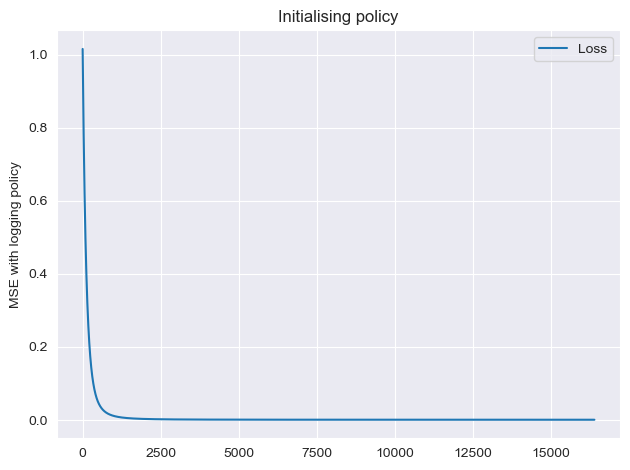

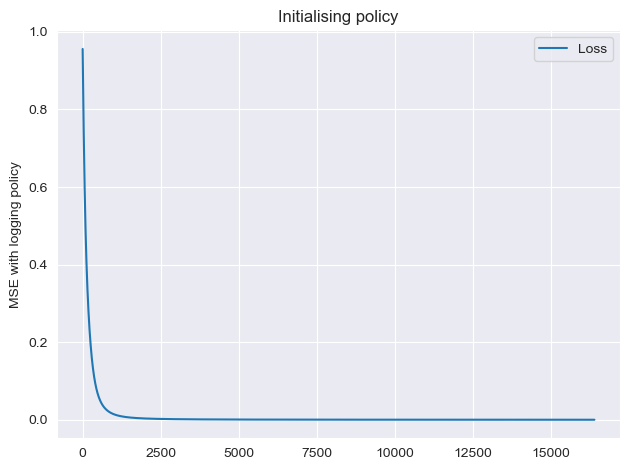

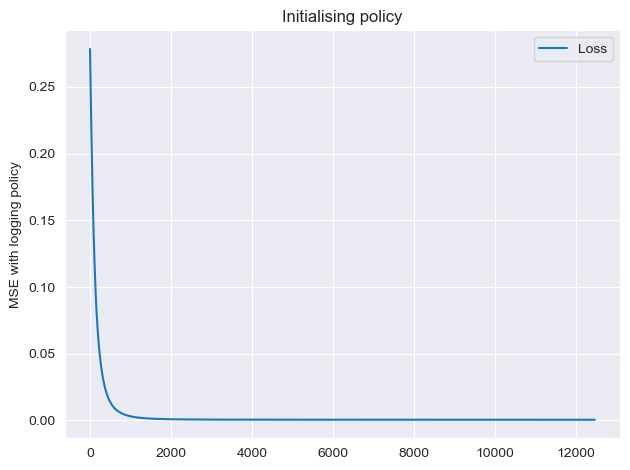

In [122]:
agents_sec = instantiate_agents(rng_sec, agent_configs, agents2item_values_sec, agents2items_sec)
# bid = value * estimated_CTR * gamma
# Instantiate Auction object
auction_sec, num_iter, rounds_per_iter, output_dir =\
    instantiate_auction(rng_sec,
                        config,
                        agents2items_sec,
                        agents2item_values_sec,
                        agents_sec,
                        max_slots,
                        embedding_size,
                        embedding_var,
                        obs_embedding_size)
# Placeholders for output
auction_revenue_sec = []
social_welfare_sec = []
social_surplus_sec = []
# Run repeated auctions
# This logic is encoded in the `simulation_run()` method in main.py
for i in tqdm(range(num_iter)):
    print( f'number of iteration: {i}\n')
    # Simulate impression opportunities
    for _ in range(rounds_per_iter):
        auction_sec.simulate_opportunity()

    # Log 'Gross utility' or welfare
    social_welfare_sec.append(sum([agent.gross_utility for agent in auction_sec.agents]))

    # Log 'Net utility' or surplus
    social_surplus_sec.append(sum([agent.net_utility for agent in auction_sec.agents]))

    # Update agents (does nothing in this example, as we have truthful oracles)
    # Clear running metrics
    for agent_id, agent in enumerate(auction_sec.agents):
        print(f'agent: {agent_id}\n' )
        agent.update(iteration=i)
        agent.clear_utility()
        agent.clear_logs()

    # Log revenue
    auction_revenue_sec.append(auction_sec.revenue)
    auction_sec.clear_revenue()

# Rescale metrics per auction round
auction_revenue_sec = np.array(auction_revenue_sec) / rounds_per_iter
social_welfare_sec = np.array(social_welfare_sec) / rounds_per_iter
social_surplus_sec = np.array(social_surplus_sec) / rounds_per_iter

In [390]:
auction_revenue_sec

array([1.37763411, 0.40354785, 0.45719139, 0.40565898, 0.38996603,
       0.37134414, 0.38249318, 0.37175243, 0.36800332, 0.34011111,
       0.35155862, 0.35378598, 0.35503819, 0.35303054, 0.3504024 ,
       0.33821451, 0.3577291 , 0.37036899, 0.36657277, 0.3674972 ,
       0.37432211, 0.36629772, 0.35633197, 0.36529618, 0.33563527])

In [391]:
social_welfare_sec

array([0.09540306, 0.32757642, 0.48307331, 0.51326406, 0.52446039,
       0.52702472, 0.52950274, 0.52047457, 0.52656542, 0.53663268,
       0.53445359, 0.512606  , 0.52284938, 0.51834615, 0.52772919,
       0.52950679, 0.54168294, 0.54359405, 0.53171537, 0.52285341,
       0.52749405, 0.53159726, 0.52794523, 0.51974704, 0.5346084 ])

In [392]:
social_surplus_sec

array([-1.28223105, -0.07597143,  0.02588192,  0.10760508,  0.13449435,
        0.15568058,  0.14700956,  0.14872214,  0.15856209,  0.19652157,
        0.18289497,  0.15882002,  0.16781119,  0.16531561,  0.17732679,
        0.19129228,  0.18395384,  0.17322507,  0.1651426 ,  0.15535621,
        0.15317194,  0.16529954,  0.17161327,  0.15445086,  0.19897313])

In [123]:
pickle.dump(auction_sec, open('DR_L_auction_adaptiveTest.pickle', 'wb'))

In [134]:
agents2items_sec['DR 4'] = agents2items_sec.pop('DR 1')
agents2items_sec['DR 5'] = agents2items_sec.pop('DR 2')
agents2items_sec['DR 6'] = agents2items_sec.pop('DR 3')

In [137]:
agents2item_values_sec['DR 4'] = agents2item_values_sec.pop('DR 1')
agents2item_values_sec['DR 5'] = agents2item_values_sec.pop('DR 2')
agents2item_values_sec['DR 6'] = agents2item_values_sec.pop('DR 3')

In [422]:
original_auction.agent2items

{'DR 1': array([[ 0.12573022, -0.13210486,  0.64042265,  0.10490012, -0.53566937,
         -3.12740301],
        [ 0.36159505,  1.30400005,  0.94708096, -0.70373524, -1.26542147,
         -3.07356291],
        [-0.62327446,  0.04132598, -2.32503077, -0.21879166, -1.24591095,
         -3.07032625],
        [-0.73226735, -0.54425898, -0.31630016,  0.41163054,  1.04251337,
         -3.86885429],
        [-0.12853466,  1.36646347, -0.66519467,  0.35151007,  0.90347018,
         -3.63406998],
        [ 0.0940123 , -0.74349925, -0.92172538, -0.45772583,  0.22019512,
         -3.49657169],
        [-1.00961818, -0.20917557, -0.15922501,  0.54084558,  0.21465912,
         -3.16354342],
        [ 0.35537271, -0.65382861, -0.12961363,  0.78397547,  1.49343115,
         -3.67373344],
        [-1.25906553,  1.51392377,  1.34587542,  0.7813114 ,  0.26445563,
         -3.31801739],
        [-0.31392281,  1.45802068,  1.96025832,  1.80163487,  1.31510376,
         -3.71087986],
        [ 0.35738041, 

In [431]:
extra = 3
rng_new, config_total, agent_configs_total, agents2items_total, agents2item_values_total,\
num_runs, max_slots, embedding_size, embedding_var,\
obs_embedding_size = parse_config('../config/FP_DR_TS_H.json')

In [432]:
agents_total = instantiate_agents(rng_new, agent_configs_total, agents2item_values_total, agents2items_total)

In [433]:
agents_new = agents_total[6-extra:]

In [435]:
agents2items_new = {}
agents2item_values_new = {}
for n in range(extra):
    agents2items_new[f'DR {n+4}'] = agents2items_total.pop(f'DR {n+4}')
    agents2item_values_new[f'DR {n+4}'] = agents2item_values_total.pop(f'DR {n+4}')

In [438]:
auction_first = deepcopy(original_auction)

In [439]:
check_data_adaptive = {}
check_data_adaptive_wUpdate = {}
auction_revenue_adaptiveTest = []
social_welfare_adaptiveTest = []
social_surplus_adaptiveTest = []
rounds_per_iter = 10000

auction_first.agents.extend(agents_new)
auction_first.agent2items.update(agents2items_new)
auction_first.agents2item_values.update(agents2item_values_new)
auction_first.num_participants_per_round = 4

  0%|          | 0/10000 [00:00<?, ?it/s]

The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


agent: 0

updated


DR 1:   9%|▉         | 1446/16384 [00:00<00:02, 6246.38it/s]


Stopping at Epoch 1446
AUC predicting P(win):				 0.823900725294651
Estimated Utility	 Mean Error:			 0.07721998947410495
Estimated Utility	 Mean Absolute Error:	 0.07926566896574073


DR 1:  33%|███▎      | 10652/32768 [00:02<00:05, 4252.85it/s]

Epoch 10210: reducing learning rate of group 0 to 6.0000e-04.
Epoch 10475: reducing learning rate of group 0 to 1.2000e-04.
Epoch 10732: reducing learning rate of group 0 to 2.4000e-05.
Epoch 10989: reducing learning rate of group 0 to 4.8000e-06.


DR 1:  34%|███▍      | 11270/32768 [00:02<00:05, 4243.74it/s]


Epoch 11246: reducing learning rate of group 0 to 9.6000e-07.
Stopping at Epoch 11270
AUC predicting P(win):				 0.8309723481414325
Estimated Utility	 Mean Error:			 0.0009114822119112077
Estimated Utility	 Mean Absolute Error:	 0.0046561768131201655


DR 1:   3%|▎         | 1119/32768 [00:01<00:39, 805.49it/s]
The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


Stopping at Epoch 1119
DR 1 Number of samples:  torch.Size([6658, 2])
DR 1 Predicted Gammas:  0.78894097 1.0 0.93589157
agent: 1

updated


DR 2:   8%|▊         | 1240/16384 [00:00<00:02, 6859.24it/s]


Stopping at Epoch 1240
AUC predicting P(win):				 0.8857385934819897
Estimated Utility	 Mean Error:			 0.05371350765707293
Estimated Utility	 Mean Absolute Error:	 0.058433089749995344


DR 2:  82%|████████▏ | 26758/32768 [00:06<00:01, 4245.34it/s]

Epoch 26218: reducing learning rate of group 0 to 6.0000e-04.
Epoch 26503: reducing learning rate of group 0 to 1.2000e-04.
Epoch 26760: reducing learning rate of group 0 to 2.4000e-05.
Epoch 27017: reducing learning rate of group 0 to 4.8000e-06.


DR 2:  83%|████████▎ | 27282/32768 [00:06<00:01, 4217.38it/s]


Epoch 27274: reducing learning rate of group 0 to 9.6000e-07.
Stopping at Epoch 27282
AUC predicting P(win):				 0.883120411663808
Estimated Utility	 Mean Error:			 -0.0006936483671225873
Estimated Utility	 Mean Absolute Error:	 0.006488531531885889


DR 2:   2%|▏         | 702/32768 [00:00<00:39, 813.16it/s]
The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


Stopping at Epoch 702
DR 2 Number of samples:  torch.Size([6680, 2])
DR 2 Predicted Gammas:  0.6198442 0.9167841 0.7590992
agent: 2

updated


DR 3:   7%|▋         | 1073/16384 [00:00<00:02, 6867.37it/s]

Stopping at Epoch 1073
AUC predicting P(win):				 0.7127283990913996
Estimated Utility	 Mean Error:			 0.08545215287701904
Estimated Utility	 Mean Absolute Error:	 0.09308458183771563



DR 3: 100%|██████████| 32768/32768 [00:07<00:00, 4230.28it/s]


AUC predicting P(win):				 0.7020836525203002
Estimated Utility	 Mean Error:			 -6.464750677863547e-05
Estimated Utility	 Mean Absolute Error:	 0.010735413274478096


DR 3:  10%|█         | 3339/32768 [00:04<00:38, 760.52it/s]


Stopping at Epoch 3339
DR 3 Number of samples:  torch.Size([6619, 2])
DR 3 Predicted Gammas:  0.41645467 0.9951833 0.80387324
agent: 3

updated


DR 4:  33%|███▎      | 5401/16384 [00:01<00:03, 3658.87it/s]


Stopping at Epoch 5401


DR 4: 100%|██████████| 32768/32768 [00:08<00:00, 4047.72it/s]


AUC predicting P(win):				 0.7733580697759576
Estimated Utility	 Mean Error:			 0.4252996372326636
Estimated Utility	 Mean Absolute Error:	 0.454172242049313


Initialising Policy:  15%|█▌        | 2472/16384 [00:02<00:11, 1235.17it/s]


Stopping at Epoch 2472
Predicted mu Gammas:  tensor(0.9956, grad_fn=<MinBackward1>) tensor(1.0029, grad_fn=<MaxBackward1>) tensor(1.0003, grad_fn=<MeanBackward0>)
Predicted sigma Gammas:  tensor(0.0453, grad_fn=<MinBackward1>) tensor(0.0635, grad_fn=<MaxBackward1>) tensor(0.0506, grad_fn=<MeanBackward0>)


DR 4:  29%|██▉       | 9515/32768 [00:11<00:28, 829.25it/s]


Stopping at Epoch 9515
DR 4 Number of samples:  torch.Size([6666, 2])
DR 4 Predicted Gammas:  0.69116735 0.8868709 0.75986046
agent: 4

updated


DR 5:  27%|██▋       | 4375/16384 [00:01<00:02, 4359.66it/s]


Stopping at Epoch 4375


DR 5: 100%|██████████| 32768/32768 [00:07<00:00, 4238.93it/s]


AUC predicting P(win):				 0.6476929629628392
Estimated Utility	 Mean Error:			 0.2455142305641337
Estimated Utility	 Mean Absolute Error:	 0.26305196953048265


Initialising Policy: 100%|██████████| 16384/16384 [00:13<00:00, 1250.59it/s]


Predicted mu Gammas:  tensor(0.9271, grad_fn=<MinBackward1>) tensor(1.0346, grad_fn=<MaxBackward1>) tensor(0.9987, grad_fn=<MeanBackward0>)
Predicted sigma Gammas:  tensor(0.0405, grad_fn=<MinBackward1>) tensor(0.0889, grad_fn=<MaxBackward1>) tensor(0.0523, grad_fn=<MeanBackward0>)


DR 5:   0%|          | 81/32768 [00:00<00:40, 806.04it/s]

Epoch 00118: reducing learning rate of group 0 to 1.4000e-03.


DR 5:   1%|          | 247/32768 [00:00<00:39, 819.04it/s]

Epoch 00219: reducing learning rate of group 0 to 2.8000e-04.


DR 5:   1%|          | 329/32768 [00:00<00:39, 816.83it/s]

Epoch 00320: reducing learning rate of group 0 to 5.6000e-05.


DR 5:   1%|▏         | 411/32768 [00:00<00:40, 802.18it/s]

Epoch 00421: reducing learning rate of group 0 to 1.1200e-05.


DR 5:   2%|▏         | 531/32768 [00:00<00:40, 804.62it/s]


Epoch 00522: reducing learning rate of group 0 to 2.2400e-06.
Stopping at Epoch 531
DR 5 Number of samples:  torch.Size([6686, 2])
DR 5 Predicted Gammas:  1.0 1.0 1.0
agent: 5

updated


DR 6:  32%|███▏      | 5254/16384 [00:01<00:04, 2727.06it/s]


Stopping at Epoch 5254


DR 6: 100%|██████████| 32768/32768 [00:07<00:00, 4189.47it/s]


AUC predicting P(win):				 0.8152245008990282
Estimated Utility	 Mean Error:			 0.8320621399722035
Estimated Utility	 Mean Absolute Error:	 0.8757158277887985


Initialising Policy: 100%|██████████| 16384/16384 [00:13<00:00, 1191.09it/s]


Predicted mu Gammas:  tensor(0.9678, grad_fn=<MinBackward1>) tensor(1.0092, grad_fn=<MaxBackward1>) tensor(1.0001, grad_fn=<MeanBackward0>)
Predicted sigma Gammas:  tensor(0.0459, grad_fn=<MinBackward1>) tensor(0.0817, grad_fn=<MaxBackward1>) tensor(0.0507, grad_fn=<MeanBackward0>)


DR 6:   0%|          | 79/32768 [00:00<00:41, 786.93it/s]

Epoch 00118: reducing learning rate of group 0 to 1.4000e-03.


DR 6:   1%|          | 243/32768 [00:00<00:40, 808.69it/s]

Epoch 00219: reducing learning rate of group 0 to 2.8000e-04.


DR 6:   1%|          | 324/32768 [00:00<00:40, 792.05it/s]

Epoch 00320: reducing learning rate of group 0 to 5.6000e-05.


DR 6:   1%|          | 404/32768 [00:00<00:40, 794.34it/s]

Epoch 00421: reducing learning rate of group 0 to 1.1200e-05.


DR 6:   2%|▏         | 531/32768 [00:00<00:40, 794.71it/s]

Epoch 00522: reducing learning rate of group 0 to 2.2400e-06.
Stopping at Epoch 531
DR 6 Number of samples:  torch.Size([6691, 2])
DR 6 Predicted Gammas:  1.0 1.0 1.0


  0%|          | 0/10000 [00:00<?, ?it/s]

The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


agent: 0

agent: 1

agent: 2

agent: 3

agent: 4

agent: 5

[1.22810292 0.5972901 ]
[0.22608557 0.50777039]
[-1.00201735 -0.08951971]


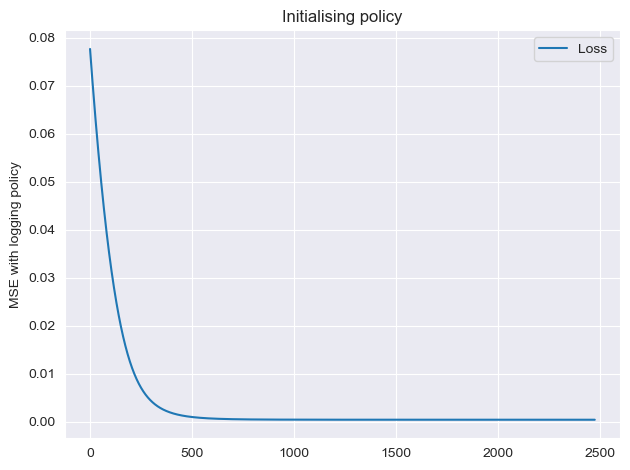

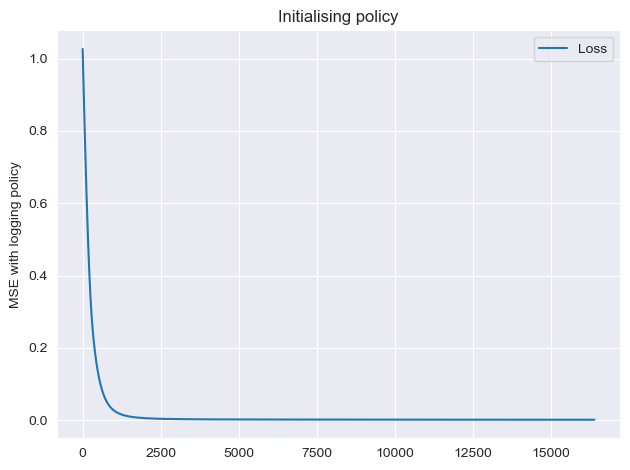

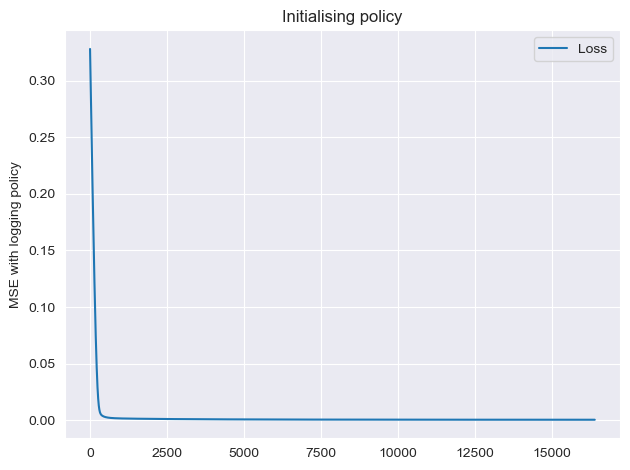

In [440]:
# Auction with new competition

# Placeholders for output
for i in range(2):
    for _ in tqdm(range(rounds_per_iter)):
        # Simulate impression opportunities
        auction_first.simulate_opportunity()
    # Log 'Gross utility' or welfare
    social_welfare_adaptiveTest.append(sum([agent.gross_utility for agent in auction_first.agents]))

    # Log 'Net utility' or surplus
    social_surplus_adaptiveTest.append(sum([agent.net_utility for agent in auction_first.agents]))

    # Clear running metrics
    for agent_id, agent in enumerate(auction_first.agents):
        contexts = np.array(list(opp.context for opp in agent.logs))
        bids = np.array(list(opp.bid for opp in agent.logs))
        prices = np.array(list(opp.price for opp in agent.logs))
        second_prices = np.array(list(opp.second_price for opp in agent.logs))
        values = np.array(list(opp.value for opp in agent.logs))
        outcomes = np.array(list(opp.outcome for opp in agent.logs))
        won_mask = np.array(list(opp.won for opp in agent.logs))
        estimated_CTRs = np.array(list(opp.estimated_CTR for opp in agent.logs))
        true_CTRs = np.array(list(opp.true_CTR for opp in agent.logs))
        gammas = np.array(list(opp for opp in agent.bidder.gammas))
        utilities = np.zeros_like(values)
        utilities[won_mask] = (values[won_mask] * outcomes[won_mask]) - prices[won_mask]

        if i == 0:
            check_data_adaptive[agent_id] = np.hstack((contexts, estimated_CTRs.reshape(-1, 1),values.reshape(-1, 1), bids.reshape(-1, 1), gammas.reshape(-1,1), true_CTRs.reshape(-1,1), prices.reshape(-1, 1),second_prices.reshape(-1,1), won_mask.reshape(-1, 1),outcomes.reshape(-1, 1),utilities.reshape(-1, 1)))

            print(f'agent: {agent_id}\n' )
            print("updated")
            agent.update(iteration=24+i)
        elif i ==1:
            check_data_adaptive_wUpdate[agent_id] = np.hstack((contexts, estimated_CTRs.reshape(-1, 1),values.reshape(-1, 1), bids.reshape(-1, 1), gammas.reshape(-1,1), true_CTRs.reshape(-1,1), prices.reshape(-1, 1),second_prices.reshape(-1,1), won_mask.reshape(-1, 1),outcomes.reshape(-1, 1),utilities.reshape(-1, 1)))

            print(f'agent: {agent_id}\n' )
        agent.clear_utility()
        agent.clear_logs()

    # Log revenue
    auction_revenue_adaptiveTest.append(auction_first.revenue)
    auction_first.clear_revenue()

# Rescale metrics per auction round
auction_revenue_adaptiveTest = np.array(auction_revenue_adaptiveTest) / rounds_per_iter
social_welfare_adaptiveTest = np.array(social_welfare_adaptiveTest) / rounds_per_iter
social_surplus_adaptiveTest = np.array(social_surplus_adaptiveTest) / rounds_per_iter
print(auction_revenue_adaptiveTest)
print(social_welfare_adaptiveTest)
print(social_surplus_adaptiveTest)

In [454]:
pickle.dump(auction_first, open('DR_L_auction_adaptiveTest_changed.pickle', 'wb'))

In [455]:
for agent_id in range(agent_num):
    for j, data_set in enumerate(check_data_adaptive_wUpdate.keys()):
        check_data_adaptive_wUpdate[agent_id][:, 8] = check_data_adaptive_wUpdate[agent_id][:, 8].astype(float)

In [511]:
for agent_id in range(3):
    np.savetxt(f'Train_{agent_id}.csv', check_data_adaptive[agent_id])

In [513]:
from split_data import split_data
for agent_id in range(3):
    split_data(estimator=estimator, competition=competition, data_set='train', agent_num=str(agent_id), row_num=1000, data_dir=f'/Users/keithwu/Documents/GitHub/auction-gym/data_{estimator}_{competition}_new_comp/', special='_'+"new_comp")

In [460]:
test_avg_r2_rTree_adaptive = []
test_avg_mse_rTree_adaptive = []
for agent_id in range(3):
    print("Agent", agent_id)
    best_estimator = context_bid_estimators_rTree[agent_id]
    input_test_data = check_data_adaptive_wUpdate[agent_id][:, :5].astype('float64')
    label_test_data = check_data_adaptive_wUpdate[agent_id][:, 7].astype('float64')

    print("Test R2 score:", best_estimator.score(input_test_data, label_test_data))
    test_avg_r2_rTree_adaptive.append(best_estimator.score(input_test_data, label_test_data))
    test_preds = best_estimator.predict(input_test_data)

    print("Test MSE: ", mean_squared_error(label_test_data, test_preds))
    test_avg_mse_rTree_adaptive.append(mean_squared_error(label_test_data, test_preds))

Agent 0
Test R2 score: 0.6641395957491923
Test MSE:  0.016295889788195864
Agent 1
Test R2 score: 0.5522582833122914
Test MSE:  0.011789072925955466
Agent 2
Test R2 score: 0.5594366675932381
Test MSE:  0.007696743062585273


In [461]:
print(statistics.mean(test_avg_r2_rTree_adaptive))
print(statistics.mean(test_avg_mse_rTree_adaptive))

0.5919448488849073
0.0119272352589122


In [462]:
test_avg_r2_m5_adaptive = []
test_avg_mse_m5_adaptive = []
for agent_id in range(3):
    print("Agent", agent_id)
    best_estimator = context_bid_estimators_M5Tree[agent_id]
    input_test_data = check_data_adaptive_wUpdate[agent_id][:, :5].astype('float64')
    label_test_data = check_data_adaptive_wUpdate[agent_id][:, 7].astype('float64')

    print("Test R2 score:", best_estimator.score(input_test_data, label_test_data))
    test_avg_r2_m5_adaptive.append(best_estimator.score(input_test_data, label_test_data))
    test_preds = best_estimator.predict(input_test_data)

    print("Test MSE: ", mean_squared_error(label_test_data, test_preds))
    test_avg_mse_m5_adaptive.append(mean_squared_error(label_test_data, test_preds))

Agent 0
Test R2 score: 0.6886538526555895
Test MSE:  0.015106462205396165
Agent 1
Test R2 score: 0.5877314136345664
Test MSE:  0.010855062748447471
Agent 2
Test R2 score: 0.6309398482552925
Test MSE:  0.00644756599942167


In [463]:
print(statistics.mean(test_avg_r2_m5_adaptive))
print(statistics.mean(test_avg_mse_m5_adaptive))

0.6357750381818161
0.010803030317755102


In [467]:
train_avg_r2_utree_adaptive = []
train_avg_mse_utree_adaptive = []

test_avg_r2_utree_adaptive = []
test_avg_mse_utree_adaptive = []

In [465]:
best_params_utree

{0: 35, 1: 35, 2: 35}

In [470]:
agent_id = 2
input_test_data = check_data_adaptive_wUpdate[agent_id][:, :5].astype('float64')
label_test_data = check_data_adaptive_wUpdate[agent_id][:, 7].astype('float64')


test_preds = utree_wrapper_predict_flex(input_test_data, agent_id, 35)

print("Test R2 score:", r2_score(label_test_data, test_preds))
print("Test MSE: ", mean_squared_error(label_test_data, test_preds))
test_avg_r2_utree_adaptive.append(r2_score(label_test_data, test_preds))
test_avg_mse_utree_adaptive.append(mean_squared_error(label_test_data, test_preds))

Test R2 score: 0.5557499937005842
Test MSE:  0.007761150106068182


In [471]:
print(statistics.mean(test_avg_r2_utree_adaptive))
print(statistics.mean(test_avg_mse_utree_adaptive))

0.602281881576668
0.011545688461169585


In [516]:
test_avg_r2_utree_adaptive_changed = []
test_avg_mse_utree_adaptive_changed = []

In [540]:
check_data_adaptive_wUpdate[5][:, -1].sum()

-438.3108834359091

In [519]:
agent_id = 2
input_test_data = check_data_adaptive_wUpdate[agent_id][:, :5].astype('float64')
label_test_data = check_data_adaptive_wUpdate[agent_id][:, 7].astype('float64')


test_preds = utree_wrapper_predict_flex_changed(input_test_data, agent_id, 35)

print("Test R2 score:", r2_score(label_test_data, test_preds))
print("Test MSE: ", mean_squared_error(label_test_data, test_preds))
test_avg_r2_utree_adaptive_changed.append(r2_score(label_test_data, test_preds))
test_avg_mse_utree_adaptive_changed.append(mean_squared_error(label_test_data, test_preds))

Test R2 score: 0.5573340426773499
Test MSE:  0.007733476404977098


In [520]:
print(statistics.mean(test_avg_r2_utree_adaptive_changed))
print(statistics.mean(test_avg_mse_utree_adaptive_changed))

0.6031373993494693
0.01152627506770931


In [472]:
def get_surrogate_utilities_adaptive(context_bid_estimators, offline_data, offline_data_key ,context_num=5, rng=rng):
    surrogate_utilities = {}
    avg_r2 = []
    for agent_id in range(3):
        surrogate_logs = {'outcomes':[], 'won_mask':[], 'prices':[]}
        surrogate_agent_id = agent_id
        surrogate_bid = context_bid_estimators[surrogate_agent_id].predict(offline_data[surrogate_agent_id][:, :context_num])
        for i in range(len(offline_data[surrogate_agent_id])):
            # win_mask
            if offline_data[surrogate_agent_id][i, offline_data_key['won_mask']] == 1:
                if (surrogate_bid[i] >= offline_data[surrogate_agent_id][i, offline_data_key['bid']]) or (surrogate_bid[i] >= offline_data[surrogate_agent_id][i, offline_data_key['second_price']]):
                    surrogate_logs['won_mask'].append(True)
                    surrogate_logs['outcomes'].append(offline_data[surrogate_agent_id][i, offline_data_key['outcome']])
                    surrogate_logs['prices'].append(surrogate_bid[i])
                else:
                    surrogate_logs['won_mask'].append(False)
                    surrogate_logs['outcomes'].append(0)
                    surrogate_logs['prices'].append(offline_data[surrogate_agent_id][i, offline_data_key['price']])
            else:
                if (surrogate_bid[i] >= offline_data[surrogate_agent_id][i, offline_data_key['price']]):
                    surrogate_logs['won_mask'].append(True)
                    # This creates randomness in the surrogate model
                    outcome = rng.binomial(1, offline_data[surrogate_agent_id][i, offline_data_key['true_CTR']])
                    surrogate_logs['outcomes'].append(outcome)
                    surrogate_logs['prices'].append(surrogate_bid[i])
                else:
                    surrogate_logs['won_mask'].append(False)
                    surrogate_logs['outcomes'].append(0)
                    surrogate_logs['prices'].append(offline_data[surrogate_agent_id][i, offline_data_key['price']])

        surrogate_won_mask = np.array(surrogate_logs['won_mask'])
        surrogate_outcomes = np.array(surrogate_logs['outcomes'])
        surrogate_prices = np.array(surrogate_logs['prices'])
        surrogate_utilities[agent_id] = np.zeros_like(offline_data[surrogate_agent_id][:, offline_data_key['value']])
        surrogate_utilities[agent_id][surrogate_won_mask] = (offline_data[surrogate_agent_id][:, offline_data_key['value']][surrogate_won_mask] * surrogate_outcomes[surrogate_won_mask]) - surrogate_prices[surrogate_won_mask]
        print(f"Agent: {agent_id}")
        print(f"Original utility: {offline_data[surrogate_agent_id][:, offline_data_key['utility']].mean()}")
        print(f"Surrogate utility: {surrogate_utilities[agent_id].mean()}" )
        print(f"R2 score: {r2_score(offline_data[surrogate_agent_id][:, offline_data_key['utility']], surrogate_utilities[agent_id])}")
        avg_r2.append(r2_score(offline_data[surrogate_agent_id][:, offline_data_key['utility']], surrogate_utilities[agent_id]))
    return surrogate_utilities, statistics.mean(avg_r2)

In [473]:
def get_surrogate_utilities_utree_adaptive(offline_data, offline_data_key ,context_num=5, rng=rng):
    surrogate_utilities = {}
    avg_r2 = []
    for agent_id in range(3):
        surrogate_logs = {'outcomes':[], 'won_mask':[], 'prices':[]}
        surrogate_agent_id = agent_id
        surrogate_bid = utree_wrapper_predict_flex(offline_data[surrogate_agent_id][:, :context_num], agent_id, best_params_utree[agent_id])
        for i in range(len(offline_data[surrogate_agent_id])):
            # win_mask
            if offline_data[surrogate_agent_id][i, offline_data_key['won_mask']] == 1:
                if (surrogate_bid[i] >= offline_data[surrogate_agent_id][i, offline_data_key['bid']]) or (surrogate_bid[i] >= offline_data[surrogate_agent_id][i, offline_data_key['second_price']]):
                    surrogate_logs['won_mask'].append(True)
                    surrogate_logs['outcomes'].append(offline_data[surrogate_agent_id][i, offline_data_key['outcome']])
                    surrogate_logs['prices'].append(surrogate_bid[i])
                else:
                    surrogate_logs['won_mask'].append(False)
                    surrogate_logs['outcomes'].append(0)
                    surrogate_logs['prices'].append(offline_data[surrogate_agent_id][i, offline_data_key['price']])
            else:
                if (surrogate_bid[i] >= offline_data[surrogate_agent_id][i, offline_data_key['price']]):
                    surrogate_logs['won_mask'].append(True)
                    # This creates randomness in the surrogate model
                    outcome = rng.binomial(1, offline_data[surrogate_agent_id][i, offline_data_key['true_CTR']])
                    surrogate_logs['outcomes'].append(outcome)
                    surrogate_logs['prices'].append(surrogate_bid[i])
                else:
                    surrogate_logs['won_mask'].append(False)
                    surrogate_logs['outcomes'].append(0)
                    surrogate_logs['prices'].append(offline_data[surrogate_agent_id][i, offline_data_key['price']])

        surrogate_won_mask = np.array(surrogate_logs['won_mask'])
        surrogate_outcomes = np.array(surrogate_logs['outcomes'])
        surrogate_prices = np.array(surrogate_logs['prices'])
        surrogate_utilities[agent_id] = np.zeros_like(offline_data[surrogate_agent_id][:, offline_data_key['value']])
        surrogate_utilities[agent_id][surrogate_won_mask] = (offline_data[surrogate_agent_id][:, offline_data_key['value']][surrogate_won_mask] * surrogate_outcomes[surrogate_won_mask]) - surrogate_prices[surrogate_won_mask]
        print(f"Agent: {agent_id}")
        print(f"Original utility: {offline_data[surrogate_agent_id][:, offline_data_key['utility']].mean()}")
        print(f"Surrogate utility: {surrogate_utilities[agent_id].mean()}" )
        print(f"R2 score: {r2_score(offline_data[surrogate_agent_id][:, offline_data_key['utility']], surrogate_utilities[agent_id])}")
        avg_r2.append(r2_score(offline_data[surrogate_agent_id][:, offline_data_key['utility']], surrogate_utilities[agent_id]))
    return surrogate_utilities, statistics.mean(avg_r2)

In [521]:
def get_surrogate_utilities_utree_adaptive_changed(offline_data, offline_data_key ,context_num=5, rng=rng):
    surrogate_utilities = {}
    avg_r2 = []
    for agent_id in range(3):
        surrogate_logs = {'outcomes':[], 'won_mask':[], 'prices':[]}
        surrogate_agent_id = agent_id
        surrogate_bid = utree_wrapper_predict_flex_changed(offline_data[surrogate_agent_id][:, :context_num], agent_id, best_params_utree[agent_id])
        for i in range(len(offline_data[surrogate_agent_id])):
            # win_mask
            if offline_data[surrogate_agent_id][i, offline_data_key['won_mask']] == 1:
                if (surrogate_bid[i] >= offline_data[surrogate_agent_id][i, offline_data_key['bid']]) or (surrogate_bid[i] >= offline_data[surrogate_agent_id][i, offline_data_key['second_price']]):
                    surrogate_logs['won_mask'].append(True)
                    surrogate_logs['outcomes'].append(offline_data[surrogate_agent_id][i, offline_data_key['outcome']])
                    surrogate_logs['prices'].append(surrogate_bid[i])
                else:
                    surrogate_logs['won_mask'].append(False)
                    surrogate_logs['outcomes'].append(0)
                    surrogate_logs['prices'].append(offline_data[surrogate_agent_id][i, offline_data_key['price']])
            else:
                if (surrogate_bid[i] >= offline_data[surrogate_agent_id][i, offline_data_key['price']]):
                    surrogate_logs['won_mask'].append(True)
                    # This creates randomness in the surrogate model
                    outcome = rng.binomial(1, offline_data[surrogate_agent_id][i, offline_data_key['true_CTR']])
                    surrogate_logs['outcomes'].append(outcome)
                    surrogate_logs['prices'].append(surrogate_bid[i])
                else:
                    surrogate_logs['won_mask'].append(False)
                    surrogate_logs['outcomes'].append(0)
                    surrogate_logs['prices'].append(offline_data[surrogate_agent_id][i, offline_data_key['price']])

        surrogate_won_mask = np.array(surrogate_logs['won_mask'])
        surrogate_outcomes = np.array(surrogate_logs['outcomes'])
        surrogate_prices = np.array(surrogate_logs['prices'])
        surrogate_utilities[agent_id] = np.zeros_like(offline_data[surrogate_agent_id][:, offline_data_key['value']])
        surrogate_utilities[agent_id][surrogate_won_mask] = (offline_data[surrogate_agent_id][:, offline_data_key['value']][surrogate_won_mask] * surrogate_outcomes[surrogate_won_mask]) - surrogate_prices[surrogate_won_mask]
        print(f"Agent: {agent_id}")
        print(f"Original utility: {offline_data[surrogate_agent_id][:, offline_data_key['utility']].mean()}")
        print(f"Surrogate utility: {surrogate_utilities[agent_id].mean()}" )
        print(f"R2 score: {r2_score(offline_data[surrogate_agent_id][:, offline_data_key['utility']], surrogate_utilities[agent_id])}")
        avg_r2.append(r2_score(offline_data[surrogate_agent_id][:, offline_data_key['utility']], surrogate_utilities[agent_id]))
    return surrogate_utilities, statistics.mean(avg_r2)

In [496]:
def print_agent_replace_metric_adaptive(surrogate_avg_r2, surrogate_utilities, offline_data):
    print("R2")
    print(surrogate_avg_r2)
    surrogate_sum_utilities = 0
    perc_chg_utilities = []

    for agent_id in range(3):
        surrogate_sum_utilities += surrogate_utilities[agent_id].sum()
    print("surrogate")
    print(surrogate_sum_utilities/10000)
    sum_utilities_DR = 0
    for agent_id in range(3):
        sum_utilities_DR += offline_data[agent_id][:, offline_data_key['utility']].sum()
        perc_chg_utilities.append((surrogate_utilities[agent_id].sum() - offline_data[agent_id][:, offline_data_key['utility']].sum())/ abs(offline_data[agent_id][:, offline_data_key['utility']].sum()))
    print("DR")
    print(sum_utilities_DR/10000)
    print("% change in social surplus")
    print((surrogate_sum_utilities-sum_utilities_DR)/abs(sum_utilities_DR)*100)
    print("Avg % change in net utility")
    print(statistics.mean(perc_chg_utilities)*100)

In [491]:
surrogate_utilities_adaptive_rtree, surrogate_avg_r2_adaptive_rtree =get_surrogate_utilities_adaptive(context_bid_estimators_rTree, offline_data=check_data_adaptive_wUpdate,offline_data_key=offline_data_key,context_num=5, rng=auction_first.rng)

Agent: 0
Original utility: 0.019674546888748815
Surrogate utility: 0.020953523276811454
R2 score: 0.08035775970961301
Agent: 1
Original utility: -0.014611344099334456
Surrogate utility: 0.0027346750927134734
R2 score: 0.45244778386784146
Agent: 2
Original utility: -0.0057139509659725
Surrogate utility: 0.010439499544939428
R2 score: 0.6287857349581254


In [492]:
surrogate_utilities_adaptive_rtree[2].sum()

69.70453846156056

In [497]:
print_agent_replace_metric_adaptive(surrogate_avg_r2_adaptive_rtree, surrogate_utilities_adaptive_rtree, check_data_adaptive_wUpdate)

R2
0.38719709284519327
surrogate
0.022801088345286387
DR
-0.00036464512038244195
% change in social surplus
6352.9530962521785
Avg % change in net utility
135.97290631542114


In [498]:
surrogate_utilities_adaptive_m5tree, surrogate_avg_r2_adaptive_m5tree = get_surrogate_utilities_adaptive(context_bid_estimators_M5Tree, offline_data=check_data_adaptive_wUpdate,offline_data_key=offline_data_key,context_num=5, rng=auction_first.rng)

Agent: 0
Original utility: 0.019674546888748815
Surrogate utility: 0.022103192113125253
R2 score: 0.12033103438377812
Agent: 1
Original utility: -0.014611344099334456
Surrogate utility: 0.0006612711409009362
R2 score: 0.44542564101663873
Agent: 2
Original utility: -0.0057139509659725
Surrogate utility: 0.012869902360311731
R2 score: 0.6365801541755829


In [499]:
print_agent_replace_metric_adaptive(surrogate_avg_r2_adaptive_m5tree, surrogate_utilities_adaptive_m5tree, check_data_adaptive_wUpdate)

R2
0.4007789431919999
surrogate
0.023815197237252894
DR
-0.00036464512038244195
% change in social surplus
6631.061546161752
Avg % change in net utility
147.36877372099545


In [500]:
surrogate_utilities_adaptive_utree, surrogate_avg_r2_adaptive_utree =get_surrogate_utilities_utree_adaptive(offline_data=check_data_adaptive_wUpdate,offline_data_key=offline_data_key,context_num=5, rng=auction_first.rng)

Agent: 0
Original utility: 0.019674546888748815
Surrogate utility: 0.021061780740655824
R2 score: 0.0957063028117966
Agent: 1
Original utility: -0.014611344099334456
Surrogate utility: 0.001878120128107897
R2 score: 0.456105348918862
Agent: 2
Original utility: -0.0057139509659725
Surrogate utility: 0.00873579427095429
R2 score: 0.6272619666140207


In [501]:
print_agent_replace_metric_adaptive(surrogate_avg_r2_adaptive_utree, surrogate_utilities_adaptive_utree, check_data_adaptive_wUpdate)

R2
0.3930245394482264
surrogate
0.021166831807181683
DR
-0.00036464512038244195
% change in social surplus
5904.775828340109
Avg % change in net utility
124.26337042718194


In [522]:
surrogate_utilities_adaptive_utree_changed, surrogate_avg_r2_adaptive_utree_changed =get_surrogate_utilities_utree_adaptive_changed(offline_data=check_data_adaptive_wUpdate,offline_data_key=offline_data_key,context_num=5, rng=auction_first.rng)

Agent: 0
Original utility: 0.019674546888748815
Surrogate utility: 0.01982733677999144
R2 score: 0.1171951042430236
Agent: 1
Original utility: -0.014611344099334456
Surrogate utility: 0.002714769247996384
R2 score: 0.45145701998656784
Agent: 2
Original utility: -0.0057139509659725
Surrogate utility: 0.009062327274196199
R2 score: 0.62008411258278


In [523]:
print_agent_replace_metric_adaptive(surrogate_avg_r2_adaptive_utree_changed, surrogate_utilities_adaptive_utree_changed,check_data_adaptive_wUpdate)

R2
0.39624541227079046
surrogate
0.021115131447807873
DR
-0.00036464512038244195
% change in social surplus
5890.597561174603
Avg % change in net utility
125.98549276843576


In [502]:
def surrogate_agent_6agents_utree(auction, agents, rounds_per_iter=10000, rng=None):
    auction_surrogate = deepcopy(auction)
    utilities_dict = {
    'Agent 0 Replaced': {key: 0 for key in range(6)},
    'Agent 1 Replaced': {key: 0 for key in range(6)},
    'Agent 2 Replaced': {key: 0 for key in range(6)}
    }
    avg_auction_revenue_surrogate = []
    avg_social_welfare_surrogate = []
    avg_social_surplus_surrogate = []
    for replacing_agent_id in range(3):
        print(f'replacing agent: {replacing_agent_id}\n')
        check_data = {}
        agents_surrogate = deepcopy(agents)
        #agents are still the trained agents from black box
        utree_model, utree = utree_wrapper_model(replacing_agent_id, best_params_utree[replacing_agent_id])
        agents_surrogate[replacing_agent_id].bidder = SurrogateBidder_utree(rng=rng, model=utree_model, utree=utree)
        for agent_id in range(6):
            print(agents_surrogate[agent_id].bidder)

        auction_surrogate.agents = agents_surrogate

        # Placeholders for output
        auction_revenue_surrogate = []
        social_welfare_surrogate = []
        social_surplus_surrogate = []
        # Run repeated auctions
        # This logic is encoded in the `simulation_run()` method in main.py

        for i in tqdm(range(3)):
            for _ in range(rounds_per_iter):
                # Simulate impression opportunities
                auction_surrogate.simulate_opportunity()

            # Log 'Gross utility' or welfare
            social_welfare_surrogate.append(sum([agent.gross_utility for agent in auction_surrogate.agents]))

            # Log 'Net utility' or surplus
            social_surplus_surrogate.append(sum([agent.net_utility for agent in auction_surrogate.agents]))

            # Update agents (does nothing in this example, as we have truthful oracles)
            # Clear running metrics
            for agent_id, agent in enumerate(auction_surrogate.agents):
                contexts = np.array(list(opp.context for opp in agent.logs))
                bids = np.array(list(opp.bid for opp in agent.logs))
                prices = np.array(list(opp.price for opp in agent.logs))
                second_prices = np.array(list(opp.second_price for opp in agent.logs))
                values = np.array(list(opp.value for opp in agent.logs))
                outcomes = np.array(list(opp.outcome for opp in agent.logs))
                won_mask = np.array(list(opp.won for opp in agent.logs))
                estimated_CTRs = np.array(list(opp.estimated_CTR for opp in agent.logs))
                true_CTRs = np.array(list(opp.true_CTR for opp in agent.logs))
                #gammas = np.array(list(opp.detach().numpy() for opp in agent.bidder.gammas))
                utilities = np.zeros_like(values)
                utilities[won_mask] = (values[won_mask] * outcomes[won_mask]) - prices[won_mask]
                check_data[agent_id] = np.hstack((contexts, estimated_CTRs.reshape(-1, 1),values.reshape(-1, 1), bids.reshape(-1, 1), bids.reshape(-1, 1), true_CTRs.reshape(-1,1), prices.reshape(-1, 1),second_prices.reshape(-1,1), won_mask.reshape(-1, 1),outcomes.reshape(-1, 1),utilities.reshape(-1, 1)))
                utilities_dict[f'Agent {replacing_agent_id} Replaced'][agent_id]+= agent.net_utility
                agent.clear_utility()
                agent.clear_logs()

            # Log revenue
            auction_revenue_surrogate.append(auction_surrogate.revenue)
            auction_surrogate.clear_revenue()

        # Rescale metrics per auction round
        auction_revenue_surrogate = np.array(auction_revenue_surrogate) / rounds_per_iter
        social_welfare_surrogate = np.array(social_welfare_surrogate) / rounds_per_iter
        social_surplus_surrogate = np.array(social_surplus_surrogate) / rounds_per_iter

        print(auction_revenue_surrogate.mean())
        print(social_welfare_surrogate.mean())
        print(social_surplus_surrogate.mean())
        avg_auction_revenue_surrogate.append(auction_revenue_surrogate.mean())
        avg_social_welfare_surrogate.append(social_welfare_surrogate.mean())
        avg_social_surplus_surrogate.append(social_surplus_surrogate.mean())

    print('**********************************')
    print(f'Avg. Auction Revenue over 3 replacements {np.array(avg_auction_revenue_surrogate).mean()}')
    print(f'Avg. Social Welfare over 3 replacements {np.array(avg_social_welfare_surrogate).mean()}')
    print(f'Avg. Social Surplus over 3 replacements {np.array(avg_social_surplus_surrogate).mean()}')

    return check_data, utilities_dict

In [524]:
def surrogate_agent_6agents_utree_changed(auction, agents, rounds_per_iter=10000, rng=None):
    auction_surrogate = deepcopy(auction)
    utilities_dict = {
    'Agent 0 Replaced': {key: 0 for key in range(6)},
    'Agent 1 Replaced': {key: 0 for key in range(6)},
    'Agent 2 Replaced': {key: 0 for key in range(6)}
    }
    avg_auction_revenue_surrogate = []
    avg_social_welfare_surrogate = []
    avg_social_surplus_surrogate = []
    for replacing_agent_id in range(3):
        print(f'replacing agent: {replacing_agent_id}\n')
        check_data = {}
        agents_surrogate = deepcopy(agents)
        #agents are still the trained agents from black box
        utree_model, utree = utree_wrapper_model_changed(replacing_agent_id, best_params_utree[replacing_agent_id])
        agents_surrogate[replacing_agent_id].bidder = SurrogateBidder_utree(rng=rng, model=utree_model, utree=utree)
        for agent_id in range(6):
            print(agents_surrogate[agent_id].bidder)

        auction_surrogate.agents = agents_surrogate

        # Placeholders for output
        auction_revenue_surrogate = []
        social_welfare_surrogate = []
        social_surplus_surrogate = []
        # Run repeated auctions
        # This logic is encoded in the `simulation_run()` method in main.py

        for i in tqdm(range(3)):
            for _ in range(rounds_per_iter):
                # Simulate impression opportunities
                auction_surrogate.simulate_opportunity()

            # Log 'Gross utility' or welfare
            social_welfare_surrogate.append(sum([agent.gross_utility for agent in auction_surrogate.agents]))

            # Log 'Net utility' or surplus
            social_surplus_surrogate.append(sum([agent.net_utility for agent in auction_surrogate.agents]))

            # Update agents (does nothing in this example, as we have truthful oracles)
            # Clear running metrics
            for agent_id, agent in enumerate(auction_surrogate.agents):
                contexts = np.array(list(opp.context for opp in agent.logs))
                bids = np.array(list(opp.bid for opp in agent.logs))
                prices = np.array(list(opp.price for opp in agent.logs))
                second_prices = np.array(list(opp.second_price for opp in agent.logs))
                values = np.array(list(opp.value for opp in agent.logs))
                outcomes = np.array(list(opp.outcome for opp in agent.logs))
                won_mask = np.array(list(opp.won for opp in agent.logs))
                estimated_CTRs = np.array(list(opp.estimated_CTR for opp in agent.logs))
                true_CTRs = np.array(list(opp.true_CTR for opp in agent.logs))
                #gammas = np.array(list(opp.detach().numpy() for opp in agent.bidder.gammas))
                utilities = np.zeros_like(values)
                utilities[won_mask] = (values[won_mask] * outcomes[won_mask]) - prices[won_mask]
                check_data[agent_id] = np.hstack((contexts, estimated_CTRs.reshape(-1, 1),values.reshape(-1, 1), bids.reshape(-1, 1), bids.reshape(-1, 1), true_CTRs.reshape(-1,1), prices.reshape(-1, 1),second_prices.reshape(-1,1), won_mask.reshape(-1, 1),outcomes.reshape(-1, 1),utilities.reshape(-1, 1)))
                utilities_dict[f'Agent {replacing_agent_id} Replaced'][agent_id]+= agent.net_utility
                agent.clear_utility()
                agent.clear_logs()

            # Log revenue
            auction_revenue_surrogate.append(auction_surrogate.revenue)
            auction_surrogate.clear_revenue()

        # Rescale metrics per auction round
        auction_revenue_surrogate = np.array(auction_revenue_surrogate) / rounds_per_iter
        social_welfare_surrogate = np.array(social_welfare_surrogate) / rounds_per_iter
        social_surplus_surrogate = np.array(social_surplus_surrogate) / rounds_per_iter

        print(auction_revenue_surrogate.mean())
        print(social_welfare_surrogate.mean())
        print(social_surplus_surrogate.mean())
        avg_auction_revenue_surrogate.append(auction_revenue_surrogate.mean())
        avg_social_welfare_surrogate.append(social_welfare_surrogate.mean())
        avg_social_surplus_surrogate.append(social_surplus_surrogate.mean())

    print('**********************************')
    print(f'Avg. Auction Revenue over 3 replacements {np.array(avg_auction_revenue_surrogate).mean()}')
    print(f'Avg. Social Welfare over 3 replacements {np.array(avg_social_welfare_surrogate).mean()}')
    print(f'Avg. Social Surplus over 3 replacements {np.array(avg_social_surplus_surrogate).mean()}')

    return check_data, utilities_dict

In [503]:
def surrogate_agent_6agents(auction, agents, context_bid_estimators, rounds_per_iter=10000, rng=None):
    auction_surrogate = deepcopy(auction)
    utilities_dict = {
    'Agent 0 Replaced': {key: 0 for key in range(6)},
    'Agent 1 Replaced': {key: 0 for key in range(6)},
    'Agent 2 Replaced': {key: 0 for key in range(6)}
    }
    avg_auction_revenue_surrogate = []
    avg_social_welfare_surrogate = []
    avg_social_surplus_surrogate = []
    for replacing_agent_id in range(3):
        print(f'replacing agent: {replacing_agent_id}\n')
        check_data = {}
        agents_surrogate = deepcopy(agents)
        #agents are still the trained agents from black box
        agents_surrogate[replacing_agent_id].bidder = SurrogateBidder(rng=rng, model=context_bid_estimators[replacing_agent_id])
        for agent_id in range(6):
            print(agents_surrogate[agent_id].bidder)

        auction_surrogate.agents = agents_surrogate

        # Placeholders for output
        auction_revenue_surrogate = []
        social_welfare_surrogate = []
        social_surplus_surrogate = []
        # Run repeated auctions
        # This logic is encoded in the `simulation_run()` method in main.py

        for i in tqdm(range(3)):
            for _ in range(rounds_per_iter):
                # Simulate impression opportunities
                auction_surrogate.simulate_opportunity()

            # Log 'Gross utility' or welfare
            social_welfare_surrogate.append(sum([agent.gross_utility for agent in auction_surrogate.agents]))

            # Log 'Net utility' or surplus
            social_surplus_surrogate.append(sum([agent.net_utility for agent in auction_surrogate.agents]))

            # Update agents (does nothing in this example, as we have truthful oracles)
            # Clear running metrics
            for agent_id, agent in enumerate(auction_surrogate.agents):
                contexts = np.array(list(opp.context for opp in agent.logs))
                bids = np.array(list(opp.bid for opp in agent.logs))
                prices = np.array(list(opp.price for opp in agent.logs))
                second_prices = np.array(list(opp.second_price for opp in agent.logs))
                values = np.array(list(opp.value for opp in agent.logs))
                outcomes = np.array(list(opp.outcome for opp in agent.logs))
                won_mask = np.array(list(opp.won for opp in agent.logs))
                estimated_CTRs = np.array(list(opp.estimated_CTR for opp in agent.logs))
                true_CTRs = np.array(list(opp.true_CTR for opp in agent.logs))
                #gammas = np.array(list(opp.detach().numpy() for opp in agent.bidder.gammas))
                utilities = np.zeros_like(values)
                utilities[won_mask] = (values[won_mask] * outcomes[won_mask]) - prices[won_mask]
                check_data[agent_id] = np.hstack((contexts, estimated_CTRs.reshape(-1, 1),values.reshape(-1, 1), bids.reshape(-1, 1), bids.reshape(-1, 1), true_CTRs.reshape(-1,1), prices.reshape(-1, 1),second_prices.reshape(-1,1), won_mask.reshape(-1, 1),outcomes.reshape(-1, 1),utilities.reshape(-1, 1)))
                utilities_dict[f'Agent {replacing_agent_id} Replaced'][agent_id]+= agent.net_utility
                agent.clear_utility()
                agent.clear_logs()

            # Log revenue
            auction_revenue_surrogate.append(auction_surrogate.revenue)
            auction_surrogate.clear_revenue()

        # Rescale metrics per auction round
        auction_revenue_surrogate = np.array(auction_revenue_surrogate) / rounds_per_iter
        social_welfare_surrogate = np.array(social_welfare_surrogate) / rounds_per_iter
        social_surplus_surrogate = np.array(social_surplus_surrogate) / rounds_per_iter

        print(auction_revenue_surrogate.mean())
        print(social_welfare_surrogate.mean())
        print(social_surplus_surrogate.mean())
        avg_auction_revenue_surrogate.append(auction_revenue_surrogate.mean())
        avg_social_welfare_surrogate.append(social_welfare_surrogate.mean())
        avg_social_surplus_surrogate.append(social_surplus_surrogate.mean())

    print('**********************************')
    print(f'Avg. Auction Revenue over 3 replacements {np.array(avg_auction_revenue_surrogate).mean()}')
    print(f'Avg. Social Welfare over 3 replacements {np.array(avg_social_welfare_surrogate).mean()}')
    print(f'Avg. Social Surplus over 3 replacements {np.array(avg_social_surplus_surrogate).mean()}')

    return check_data, utilities_dict

In [504]:
surrogate_agent_data_adaptive_rTree,  utilities_dict_adaptive_rTree= surrogate_agent_6agents(auction_first, auction_first.agents, context_bid_estimators_rTree, rng=auction_first.rng)

replacing agent: 0



  0%|          | 0/3 [00:00<?, ?it/s]

0.5880510469469291
0.49478819077150726
-0.09326285617542
replacing agent: 1



  0%|          | 0/3 [00:00<?, ?it/s]

0.5842959808158494
0.5053166640675443
-0.07897931674830151
replacing agent: 2



  0%|          | 0/3 [00:00<?, ?it/s]

0.5900192339070139
0.5092930986746093
-0.08072613523240536
**********************************
Avg. Auction Revenue over 3 replacements 0.5874554205565975
Avg. Social Welfare over 3 replacements 0.5031326511712203
Avg. Social Surplus over 3 replacements -0.08432276938537563


In [505]:
utilities_dict_adaptive_rTree

{'Agent 0 Replaced': {0: 306.3329679349482,
  1: -270.0578618568338,
  2: -14.627117040022622,
  3: 1053.1016309673746,
  4: -2388.3956763944702,
  5: -1484.2396288735958},
 'Agent 1 Replaced': {0: 512.1019530704831,
  1: 99.54924598413794,
  2: -92.32435381924705,
  3: 1064.7052722029307,
  4: -2563.0803444615435,
  5: -1390.3312754258068},
 'Agent 2 Replaced': {0: 456.0609054702037,
  1: -378.1725166833472,
  2: 253.93259744307505,
  3: 1115.646308563947,
  4: -2411.538194239421,
  5: -1457.7131575266185}}

In [506]:
df_utilities_dict_adaptive_rTree = pd.DataFrame(utilities_dict_adaptive_rTree)
df_utilities_dict_adaptive_rTree.index = [f"Agent{i}" for i in df_utilities_dict_adaptive_rTree.index]
df_utilities_dict_adaptive_rTree /= 3
print(df_utilities_dict_adaptive_rTree)

        Agent 0 Replaced  Agent 1 Replaced  Agent 2 Replaced
Agent0        102.110989        170.700651        152.020302
Agent1        -90.019287         33.183082       -126.057506
Agent2         -4.875706        -30.774785         84.644199
Agent3        351.033877        354.901757        371.882103
Agent4       -796.131892       -854.360115       -803.846065
Agent5       -494.746543       -463.443758       -485.904386


In [507]:
surrogate_agent_data_adaptive_m5, utilities_dict_adaptive_m5 = surrogate_agent_6agents(auction_first, auction_first.agents, context_bid_estimators_M5Tree, rng=auction_first.rng)

replacing agent: 0



  0%|          | 0/3 [00:00<?, ?it/s]

0.5877576037256705
0.49497082102393736
-0.09278678270173076
replacing agent: 1



  0%|          | 0/3 [00:00<?, ?it/s]

0.5837827761772538
0.5048917099832172
-0.07889106619403607
replacing agent: 2



  0%|          | 0/3 [00:00<?, ?it/s]

0.5902363965000205
0.5046480188990955
-0.08558837760092569
**********************************
Avg. Auction Revenue over 3 replacements 0.5872589254676482
Avg. Social Welfare over 3 replacements 0.5015035166354167
Avg. Social Surplus over 3 replacements -0.08575540883223083


In [508]:
df_utilities_dict_adaptive_m5 = pd.DataFrame(utilities_dict_adaptive_m5)
df_utilities_dict_adaptive_m5.index = [f"Agent{i}" for i in df_utilities_dict_adaptive_m5.index]
df_utilities_dict_adaptive_m5 /= 3
print(df_utilities_dict_adaptive_m5)

        Agent 0 Replaced  Agent 1 Replaced  Agent 2 Replaced
Agent0        107.133888        170.484722        145.216918
Agent1       -105.980255         35.750249       -123.162734
Agent2          9.234882        -27.740480         90.230441
Agent3        351.441081        346.340318        364.221039
Agent4       -819.202720       -850.263077       -835.430817
Agent5       -470.494703       -463.482394       -496.958622


In [509]:
surrogate_agent_data_adaptive_utree, utilities_dict_adaptive_utree = surrogate_agent_6agents_utree(auction_first, auction_first.agents, rng=auction_first.rng)

replacing agent: 0



  0%|          | 0/3 [00:00<?, ?it/s]

0.5877178053031741
0.4943249738803954
-0.09339283142277671
replacing agent: 1



  0%|          | 0/3 [00:00<?, ?it/s]

0.5839663957359726
0.5048489245316895
-0.07911747120428071
replacing agent: 2



  0%|          | 0/3 [00:00<?, ?it/s]

0.5902221647324742
0.507159535567379
-0.08306262916509442
**********************************
Avg. Auction Revenue over 3 replacements 0.5873021219238735
Avg. Social Welfare over 3 replacements 0.5021111446598213
Avg. Social Surplus over 3 replacements -0.08519097726405062


In [ ]:
df_utilities_dict_adaptive_utree = pd.DataFrame(utilities_dict_adaptive_utree)
df_utilities_dict_adaptive_utree.index = [f"Agent{i}" for i in df_utilities_dict_adaptive_utree.index]
df_utilities_dict_adaptive_utree /= 3
print(df_utilities_dict_adaptive_utree)

In [525]:
surrogate_agent_data_adaptive_utree_changed, utilities_dict_adaptive_utree_changed = surrogate_agent_6agents_utree_changed(auction_first, auction_first.agents, rng=auction_first.rng)

replacing agent: 0



  0%|          | 0/3 [00:00<?, ?it/s]

0.5879271370088476
0.4949800162567018
-0.09294712075214355
replacing agent: 1



  0%|          | 0/3 [00:00<?, ?it/s]

0.5843128674834696
0.5067981689975017
-0.07751469848596527
replacing agent: 2



  0%|          | 0/3 [00:00<?, ?it/s]

0.5899035956157835
0.5060735516036415
-0.08383004401214252
**********************************
Avg. Auction Revenue over 3 replacements 0.5873812000360336
Avg. Social Welfare over 3 replacements 0.5026172456192817
Avg. Social Surplus over 3 replacements -0.08476395441675044


# SHAP

In [316]:
# naturally, the constant/ bias term in context doesnt have any effect on the prediction

In [10]:
def utree_wrapper_predict(contexts):
    agent_id = 0
    max_depth = 35
    min_split_int = 50
    read_game_number = 54
    utree_save_path = f'/Users/keithwu/Documents/GitHub/auction-gym/src/UTree_model_numpy/{estimator}_{competition}/agent_{agent_id}/model_boost_linear_save_1000_max_hist_10000_max_depth_{max_depth}_min_split_instances_{min_split_int}/'
    problem = Problem.Problem(estimator_type=estimator, competition=competition, agent_num=agent_id, split_size=1000)
    CUTreeAgent = Agent.CUTreeAgent(problem=problem, max_hist=10000)
    utree = pickle.load(open(utree_save_path + 'pickle_Game_File_' + str(read_game_number) + '.p', 'rb'))

    return CUTreeAgent.predict(contexts, utree=utree)

In [17]:
def dr_wrapper_predict(context):
    return auction.predict(agent_id,context)

In [46]:
agent_id =0
num_samples = 500
random_indices = np.random.choice(offline_data['test'][agent_id].shape[0], num_samples, replace=False)
subset_data = offline_data['test'][agent_id][random_indices, :5]

In [ ]:
def utree_wrapper_predict_changed(contexts):
    agent_id = 0
    max_depth = 35
    min_split_int = 50
    read_game_number = 60
    utree_save_path = f'/Users/keithwu/Documents/GitHub/auction-gym/src/UTree_model_numpy/{estimator}_{competition}/agent_{agent_id}/model_boost_linear_save_1000_max_hist_10000_max_depth_{max_depth}_min_split_instances_{min_split_int}/'
    problem = Problem.Problem(estimator_type=estimator, competition=competition, agent_num=agent_id, split_size=1000)
    CUTreeAgent = Agent.CUTreeAgent(problem=problem, max_hist=10000)
    utree = pickle.load(open(utree_save_path + 'pickle_Game_File_' + str(read_game_number) + '.p', 'rb'))

    return CUTreeAgent.predict(contexts, utree=utree)

In [47]:
background = {}
explainer_DR = {}
shap_values_DR = {}
explainer_rTree = {}
shap_values_rTree = {}
explainer_m5Tree  = {}
shap_values_m5Tree = {}
explainer_utree = {}
shap_values_utree = {}

# Only do the worst performing agent by Avg R2 score
agent_id =0
background[agent_id] = shap.kmeans(offline_data['train'][agent_id][:, :5], 10)

# background[agent_id] = shap.kmeans(offline_data['train'][agent_id][:, :5], 5)
# explainer_rTree_treeSHAP[agent_id] = shap.TreeExplainer(context_bid_estimators_rTree[agent_id])
# shap_values_rTree_treeSHAP[agent_id] = explainer_rTree_treeSHAP[agent_id].shap_values(offline_data['test'][agent_id][:, :5])

explainer_utree[agent_id] = shap.KernelExplainer(utree_wrapper_predict, background[agent_id])
shap_values_utree[agent_id] = explainer_utree[agent_id].shap_values(subset_data)

explainer_DR[agent_id] = shap.KernelExplainer(dr_wrapper_predict, background[agent_id])
shap_values_DR[agent_id] = explainer_DR[agent_id].shap_values(subset_data)

explainer_rTree[agent_id] = shap.KernelExplainer(context_bid_estimators_rTree[agent_id].predict, background[agent_id])
shap_values_rTree[agent_id] = explainer_rTree[agent_id].shap_values(subset_data)

explainer_m5Tree[agent_id] = shap.KernelExplainer(context_bid_estimators_M5Tree[agent_id].predict, background[agent_id])
shap_values_m5Tree[agent_id] = explainer_m5Tree[agent_id].shap_values(subset_data)


  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

In [48]:
mean_abs_shap = np.abs(shap_values_DR[0]).mean(axis=0).tolist()
mean_abs_shap_rtree = np.abs(shap_values_rTree[0]).mean(axis=0).tolist()
mean_abs_shap_m5 = np.abs(shap_values_m5Tree[0]).mean(axis=0).tolist()
mean_abs_shap_utree = np.abs(shap_values_utree[0]).mean(axis=0).tolist()
mean_abs_shap.extend(mean_abs_shap_rtree)
mean_abs_shap.extend(mean_abs_shap_m5)
mean_abs_shap.extend(mean_abs_shap_utree)
df = pd.DataFrame({'Features': [str(i) for _ in range(4) for i in range(5)], 'Mean Absolute SHAP': mean_abs_shap, 'Model': ['DR']*5 + ['CART']*5 + ['M5Tree']*5 + ['LMUT']*5})

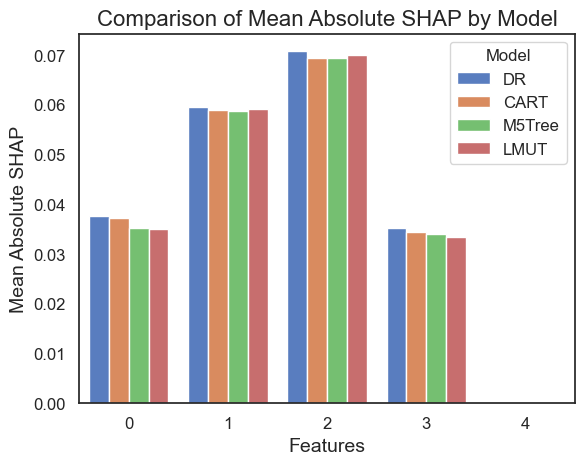

In [49]:
import seaborn as sns
sns.set(style='white')
palette = sns.color_palette("muted")

sns_plot = sns.barplot(x='Features', y='Mean Absolute SHAP', hue='Model', data=df, palette=palette)
sns_plot.set_title("Comparison of Mean Absolute SHAP by Model", fontsize=16)
sns_plot.set_xlabel('Features', fontsize=14)
sns_plot.set_ylabel('Mean Absolute SHAP', fontsize=14)
sns_plot.tick_params(axis='x', labelsize=12)
sns_plot.tick_params(axis='y', labelsize=12)
sns_plot.legend(title='Model', fontsize=12)
sns_plot.figure.savefig(f"{estimator}_{competition}.png")

# Gamma

In [10]:
min_split_int = 50 # default value in Linear Model U Tree
for agent_id in offline_data['train'].keys():
    best_params_ = None
    best_score_ = -100
    for max_depth in [10, 20, 35]:

        problem = Problem.Problem(estimator_type=estimator, competition=competition, agent_num=agent_id, split_size=1000)
        CUTreeAgent = Agent.CUTreeAgent(problem=problem, max_hist=10000)

        input_train_data = offline_data['train'][agent_id][:, :5]
        label_train_data = offline_data['train'][agent_id][:, 8]

        input_val_data = offline_data['val'][agent_id][:, :5]
        label_val_data = offline_data['val'][agent_id][:, 8]

        train_preds = CUTreeAgent.get_prediction(save_path=f'/Users/keithwu/Documents/GitHub/auction-gym/src/UTree_model_numpy/{estimator}_{competition}_gamma/agent_{agent_id}/model_boost_linear_save_1000_max_hist_10000_max_depth_{max_depth}_min_split_instances_{min_split_int}/', game_path= f'/Users/keithwu/Documents/GitHub/auction-gym/data_{estimator}_{competition}_gamma/', read_game_number=54, data_set='train')
        val_preds = CUTreeAgent.get_prediction(save_path=f'/Users/keithwu/Documents/GitHub/auction-gym/src/UTree_model_numpy/{estimator}_{competition}_gamma/agent_{agent_id}/model_boost_linear_save_1000_max_hist_10000_max_depth_{max_depth}_min_split_instances_{min_split_int}/', game_path= f'/Users/keithwu/Documents/GitHub/auction-gym/data_{estimator}_{competition}_gamma/', read_game_number=54, data_set='val')

        score = r2_score(label_val_data, val_preds)
        if score > best_score_:
            best_params_ = {'max_depth': max_depth}
            best_score_ = score
    print("Agent: ", agent_id)
    print("Param for GS", best_params_)
    print("R2 score for GS", best_score_)

    # print("Train R2 score:", r2_score(label_train_data, train_preds))
    # print("Val R2 score:", r2_score(label_val_data, val_preds))
    # print("Train MSE: ", mean_squared_error(label_train_data, train_preds))
    # print("Val MSE: ", mean_squared_error(label_val_data, val_preds))

<ipykernel.iostream.OutStream object at 0x10605bb50> starting from 54
<ipykernel.iostream.OutStream object at 0x10605bb50> finishing read tree
<ipykernel.iostream.OutStream object at 0x10605bb50> starting from 54
<ipykernel.iostream.OutStream object at 0x10605bb50> finishing read tree
<ipykernel.iostream.OutStream object at 0x10605bb50> starting from 54
<ipykernel.iostream.OutStream object at 0x10605bb50> finishing read tree
<ipykernel.iostream.OutStream object at 0x10605bb50> starting from 54
<ipykernel.iostream.OutStream object at 0x10605bb50> finishing read tree
<ipykernel.iostream.OutStream object at 0x10605bb50> starting from 54
<ipykernel.iostream.OutStream object at 0x10605bb50> finishing read tree
<ipykernel.iostream.OutStream object at 0x10605bb50> starting from 54
<ipykernel.iostream.OutStream object at 0x10605bb50> finishing read tree
Agent:  0
Param for GS {'max_depth': 35}
R2 score for GS 0.9427806455680773
<ipykernel.iostream.OutStream object at 0x10605bb50> starting from

In [12]:
agent_id = 2
max_depth = 35
min_split_int = 50

problem = Problem.Problem(estimator_type=estimator, competition=competition, agent_num=agent_id, split_size=1000)
CUTreeAgent = Agent.CUTreeAgent(problem=problem, max_hist=10000)

input_train_data = offline_data['train'][agent_id][:, :5]
label_train_data = offline_data['train'][agent_id][:, 8]

input_test_data = offline_data['test'][agent_id][:, :5]
label_test_data = offline_data['test'][agent_id][:, 8]

train_preds = CUTreeAgent.get_prediction(save_path=f'/Users/keithwu/Documents/GitHub/auction-gym/src/UTree_model_numpy/{estimator}_{competition}_gamma/agent_{agent_id}/model_boost_linear_save_1000_max_hist_10000_max_depth_{max_depth}_min_split_instances_{min_split_int}/', game_path= f'/Users/keithwu/Documents/GitHub/auction-gym/data_{estimator}_{competition}_gamma/', read_game_number=54, data_set='train')
test_preds = CUTreeAgent.get_prediction(save_path=f'/Users/keithwu/Documents/GitHub/auction-gym/src/UTree_model_numpy/{estimator}_{competition}_gamma/agent_{agent_id}/model_boost_linear_save_1000_max_hist_10000_max_depth_{max_depth}_min_split_instances_{min_split_int}/', game_path= f'/Users/keithwu/Documents/GitHub/auction-gym/data_{estimator}_{competition}_gamma/', read_game_number=54, data_set='test')

print("Train R2 score:", r2_score(label_train_data, train_preds))
print("Test R2 score:", r2_score(label_test_data, test_preds))
print("Train MSE: ", mean_squared_error(label_train_data, train_preds))
print("Test MSE: ", mean_squared_error(label_test_data, test_preds))

<ipykernel.iostream.OutStream object at 0x10605bb50> starting from 54
<ipykernel.iostream.OutStream object at 0x10605bb50> finishing read tree
<ipykernel.iostream.OutStream object at 0x10605bb50> starting from 54
<ipykernel.iostream.OutStream object at 0x10605bb50> finishing read tree
Train R2 score: 0.9205601388078524
Test R2 score: 0.8815029421140801
Train MSE:  0.0008077430876049952
Test MSE:  0.001183811322071977


In [13]:
from m5py import M5Prime, export_text_m5

In [14]:
param_grid = {
    'max_depth': [ 10, 20, 35]
}

In [15]:
def gridSearch_val(model_class, param_grid, input_train_data, label_train_data, input_val_data, label_val_data):
    best_params_ = None
    best_score_ = -100
    for max_depth in param_grid['max_depth']:
        #for min_samples_split in param_grid['min_samples_split']:
        model = model_class(max_depth= max_depth, random_state=0)
        model.fit(input_train_data, label_train_data)
        score = model.score(input_val_data, label_val_data)
        if score > best_score_:
            best_params_ = {'max_depth': max_depth}
            best_score_ = score


    print("Param for GS", best_params_)
    print("R2 score for GS", best_score_)
    best_model = model_class(**best_params_, random_state=0)
    return best_model

In [16]:
model_class = M5Prime
# without smoothing
context_bid_estimators_M5Tree_gamma = {}

train_avg_r2_m5_gamma = []
train_avg_mse_m5_gamma = []

test_avg_r2_m5_gamma = []
test_avg_mse_m5_gamma = []

# context with bid
for agent_id in offline_data['train'].keys():
    print("Agent", agent_id)
    input_train_data = offline_data['train'][agent_id][:, :5]
    label_train_data = offline_data['train'][agent_id][:, 8]
    input_val_data = offline_data['val'][agent_id][:, :5]
    label_val_data = offline_data['val'][agent_id][:, 8]
    input_test_data = offline_data['test'][agent_id][:, :5]
    label_test_data = offline_data['test'][agent_id][:, 8]

    best_estimator = gridSearch_val(model_class, param_grid, input_train_data, label_train_data, input_val_data, label_val_data)
    best_estimator.fit(input_train_data, label_train_data)
    print("Train R2 score:", best_estimator.score(input_train_data, label_train_data))
    train_avg_r2_m5_gamma.append(best_estimator.score(input_train_data, label_train_data))
    print("Test R2 score:", best_estimator.score(input_test_data, label_test_data))
    test_avg_r2_m5_gamma.append(best_estimator.score(input_test_data, label_test_data))

    train_preds = best_estimator.predict(input_train_data)
    test_preds = best_estimator.predict(input_test_data)
    print("Train MSE: ", mean_squared_error(label_train_data, train_preds))
    train_avg_mse_m5_gamma.append(mean_squared_error(label_train_data, train_preds))
    print("Test MSE: ", mean_squared_error(label_test_data, test_preds))
    test_avg_mse_m5_gamma.append(mean_squared_error(label_test_data, test_preds))
    context_bid_estimators_M5Tree_gamma[agent_id] = best_estimator

Agent 0
Param for GS {'max_depth': 35}
R2 score for GS 0.96260995362458
Train R2 score: 0.9777076025789797
Test R2 score: 0.9673162625012487
Train MSE:  0.0004703927531211212
Test MSE:  0.0006846139873730742
Agent 1
Param for GS {'max_depth': 20}
R2 score for GS 0.8139925928842928
Train R2 score: 0.8625551982658943
Test R2 score: 0.7925167589700289
Train MSE:  0.00026641919636154275
Test MSE:  0.0004004695527177319
Agent 2
Param for GS {'max_depth': 35}
R2 score for GS 0.9632221829911628
Train R2 score: 0.9701747177302323
Test R2 score: 0.9565326081284413
Train MSE:  0.0003032629366131618
Test MSE:  0.00043424867719525737


In [17]:
print(statistics.mean(train_avg_r2_m5_gamma))
print(statistics.mean(test_avg_r2_m5_gamma))

0.9368125061917021
0.905455209866573


In [153]:
# context with gamma
model_class = tree.DecisionTreeRegressor
context_bid_estimators_rTree = {}
train_avg_r2_rtree_gamma = []
train_avg_mse_rtree_gamma = []

test_avg_r2_rtree_gamma = []
test_avg_mse_rtree_gamma = []
for agent_id in offline_data['train'].keys():
    print("Agent", agent_id)
    input_train_data = offline_data['train'][agent_id][:, :5]
    label_train_data = offline_data['train'][agent_id][:, 8]
    input_val_data = offline_data['val'][agent_id][:, :5]
    label_val_data = offline_data['val'][agent_id][:, 8]
    input_test_data = offline_data['test'][agent_id][:, :5]
    label_test_data = offline_data['test'][agent_id][:, 8]

    best_estimator = gridSearch_val(model_class, param_grid, input_train_data, label_train_data, input_val_data, label_val_data)
    best_estimator.fit(input_train_data, label_train_data)
    print("Train R2 score:", best_estimator.score(input_train_data, label_train_data))
    train_avg_r2_rtree_gamma.append(best_estimator.score(input_train_data, label_train_data))
    print("Test R2 score:", best_estimator.score(input_test_data, label_test_data))
    test_avg_r2_rtree_gamma.append(best_estimator.score(input_test_data, label_test_data))

    train_preds = best_estimator.predict(input_train_data)
    test_preds = best_estimator.predict(input_test_data)
    print("Train MSE: ", mean_squared_error(label_train_data, train_preds))
    train_avg_mse_rtree_gamma.append(mean_squared_error(label_train_data, train_preds))
    print("Test MSE: ", mean_squared_error(label_test_data, test_preds))
    test_avg_mse_rtree_gamma.append(mean_squared_error(label_test_data, test_preds))
    context_bid_estimators_rTree[agent_id] = best_estimator

Agent 0
Param for GS {'max_depth': 20}
R2 score for GS 0.9380454965304573
Train R2 score: 0.9976150042700637
Test R2 score: 0.9403907716149419
Train MSE:  5.0325888525970156e-05
Test MSE:  0.0012486121432864288
Agent 1
Param for GS {'max_depth': 10}
R2 score for GS 0.706698435694062
Train R2 score: 0.7631020733607048
Test R2 score: 0.6942907282658498
Train MSE:  0.0004591963787546834
Test MSE:  0.0005900585257165613
Agent 2
Param for GS {'max_depth': 20}
R2 score for GS 0.9380554122138656
Train R2 score: 0.9888245138807592
Test R2 score: 0.9310139266051334
Train MSE:  0.00011363214295664732
Test MSE:  0.0006891858431519361


In [154]:
train_preds

array([0.80758607, 0.82795387, 0.78030866, ..., 0.86979209, 0.69841872,
       0.88904266])

In [152]:
print(statistics.mean(train_avg_r2_rtree_gamma))
print(statistics.mean(test_avg_r2_rtree_gamma))
print(statistics.mean(train_avg_mse_rtree_gamma))
print(statistics.mean(test_avg_mse_rtree_gamma))

0.9165138638371759
0.8552318088286417
0.00020771813674576696
0.0008426188373849754
